# Genetic Disease Prediction
The given notebook contains the code implementation for prediction of genetic diseases. It can predicted in three types, namely **Genetic Disorder**, **Disorder Subclass** and **Combined Disorder** in accordance with the dataset used. The analysis is therefore done sepeartely for these features

### Loading Data 
To begin with firstly, the dataset is imported and insights are drawn for basic understanding

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [276]:
train_data=pd.read_csv("train_genetic_disorders.csv")
test_data=pd.read_csv("test_genetic_disorders.csv")
df_train=train_data.copy()
df_test=test_data.copy()

In [277]:
df_train.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

In [278]:
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [279]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [280]:
df_train.describe(include="object")

Patient Id Genes in mother's side Inherited from father Maternal gene  \
count       21011                  21011                 20724         18317   
unique      21011                      2                     2             2   
top     PID0x6418                    Yes                    No           Yes   
freq            1                  12509                 12508         10125   

       Paternal gene Patient First Name Family Name Father's name  \
count          21011              21011       11771         21011   
unique             2               2480        6051         15777   
top               No              James       Smith         Sager   
freq           11887                394         151             6   

        Institute Name Location of Institute  ...  \
count            16151                 21011  ...   
unique              27                    26  ...   
top     Not applicable                     -  ...   
freq              8011                 10386  ...   

       Folic acid details (peri-conceptional) H/O serious maternal illness  \
count                                   18998                        18959   
unique                                      2                            2   
top                                       Yes                           No   
freq                                     9625                         9500   

       H/O radiation exposure (x-ray) H/O substance abuse  \
count                           18964               18921   
unique                              4                   4   
top                    Not applicable                   -   
freq                             4807                4797   

       Assisted conception IVF/ART  \
count                        19007   
unique                           2   
top                            Yes   
freq                          9555   

       History of anomalies in previous pregnancies Birth defects  \
count                                         18945         18959   
unique                                            2             2   
top                                             Yes      Singular   
freq                                           9605          9509   

        Blood test result                             Genetic Disorder  \
count               18977                                        18962   
unique                  4                                            3   
top     slightly abnormal  Mitochondrial genetic inheritance disorders   
freq                 4855                                         9686   

       Disorder Subclass  
count              18943  
unique                 9  
top       Leigh syndrome  
freq                4893  

[4 rows x 29 columns]

#### Duplicated and Missing values are observed

In [281]:
df_train.duplicated().count()

22083

In [282]:
df_train.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

#### Missing values in terms of percentage are calculated

In [283]:
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
missing_percentage

Patient Id                                           4.854413
Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Patient First Name                                   4.854413
Family Name                                         46.696554
Father's name                                        4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Institute Name                                      26.862292
Location of Institute                                4.854413
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Ra

#### Bifurcation of columns

In [284]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

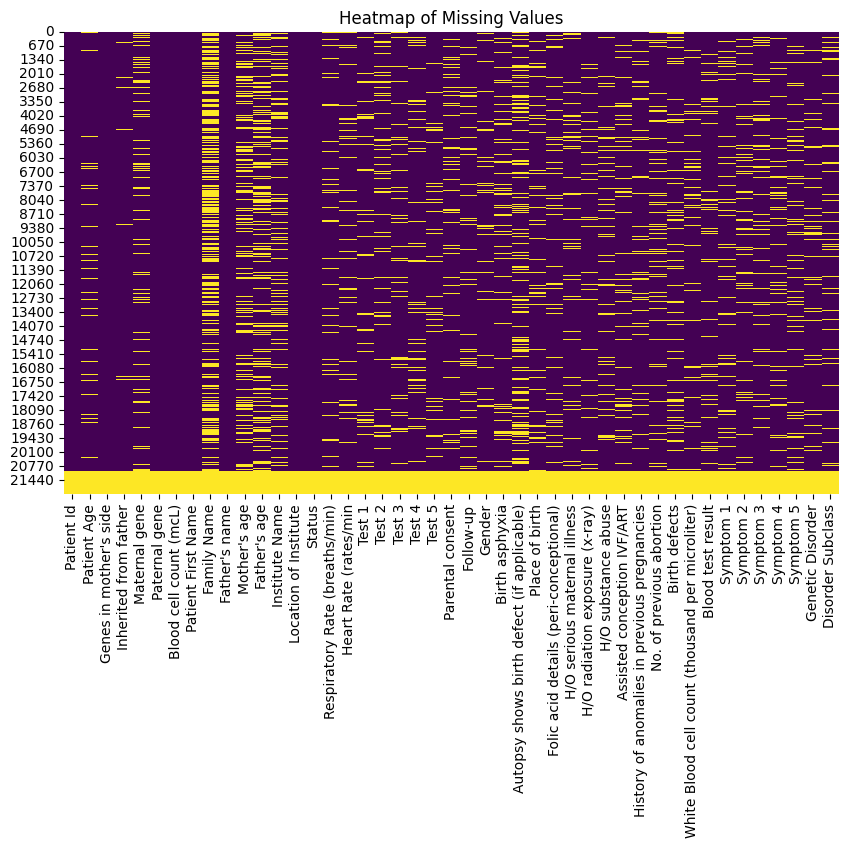

In [285]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()
plt.close()

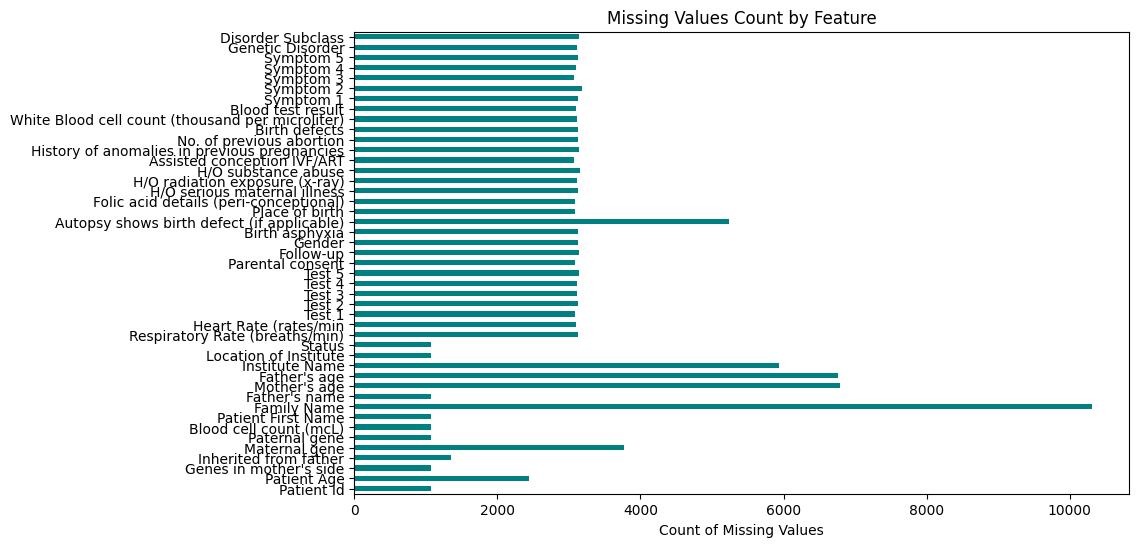

In [286]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,6))
missing_values.plot(kind='barh', color='teal')
plt.title('Missing Values Count by Feature')
plt.xlabel('Count of Missing Values')
plt.show()
plt.close()

In [287]:
df_train["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [288]:
df_train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

## Data Preprocessing

In [289]:
def preprocess_data(df):
    # Drop rows where all values are NaN
    df = df.dropna(how='all')
    columns_to_drop = [
        "Patient Id",
        "Family Name",
        "Institute Name",
        "Patient First Name",
        "Father's name",
        "Location of Institute",
        "Parental consent",
        "Test 1",
        "Test 2",
        "Test 3",
        "Test 4",
        "Test 5",
        "Mother's age",
        "Father's age"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    cat_columns = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
    # Convert the specified columns to categorical
    for col in cat_columns:
        df[col] = df[col].astype('object')
    # Disorder mapping
    disorder_mapping = {
        "Leber's hereditary optic neuropathy": "Mitochondrial genetic inheritance disorders",
        "Leigh syndrome": "Mitochondrial genetic inheritance disorders",
        "Mitochondrial myopathy": "Mitochondrial genetic inheritance disorders",
        "Alzheimer's": "Multifactorial genetic inheritance disorders",
        "Cancer": "Multifactorial genetic inheritance disorders",
        "Diabetes": "Multifactorial genetic inheritance disorders",
        "Cystic fibrosis": "Single-gene inheritance diseases",
        "Hemochromatosis": "Single-gene inheritance diseases",
        "Tay-Sachs": "Single-gene inheritance diseases",
    }

    # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
    def fill_genetic_disorder(row):
        if pd.isnull(row["Genetic Disorder"]) and row["Disorder Subclass"] in disorder_mapping:
            return disorder_mapping[row["Disorder Subclass"]]
        else:
            return row["Genetic Disorder"]

    df["Genetic Disorder"] = df.apply(fill_genetic_disorder, axis=1)

    # Fill missing values in 'Genetic Disorder' and 'Disorder Subclass'
    def fill_missing_values(df):
        # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
        for subclass in df['Disorder Subclass'].dropna().unique():
            mode_genetic_disorder = df[df['Disorder Subclass'] == subclass]['Genetic Disorder'].mode()
            if not mode_genetic_disorder.empty:
                df.loc[
                    (df['Disorder Subclass'] == subclass) & (df['Genetic Disorder'].isnull()),
                    'Genetic Disorder'
                ] = mode_genetic_disorder[0]

        # Fill missing 'Disorder Subclass' based on 'Genetic Disorder'
        for disorder in df['Genetic Disorder'].dropna().unique():
            mode_disorder_subclass = df[df['Genetic Disorder'] == disorder]['Disorder Subclass'].mode()
            if not mode_disorder_subclass.empty:
                df.loc[
                    (df['Genetic Disorder'] == disorder) & (df['Disorder Subclass'].isnull()),
                    'Disorder Subclass'
                ] = mode_disorder_subclass[0]

        return df

    df = fill_missing_values(df)

    # Drop rows where either 'Genetic Disorder' or 'Disorder Subclass' is NaN
    df = df.dropna(subset=["Genetic Disorder", "Disorder Subclass"])

    # Fill null values in each group
    grouped = df.groupby(["Genetic Disorder", "Disorder Subclass"])

    def fill_nulls(group):
        for column in group.columns:
            if group[column].isnull().any():
                if group[column].dtype == 'object':
                    mode_value = group[column].mode()
                    if not mode_value.empty:
                        group[column] = group[column].fillna(mode_value[0])
                else:
                    median_value = group[column].median()
                    group[column] = group[column].fillna(median_value)
        return group

    df_filled = grouped.apply(fill_nulls).reset_index(drop=True)

    # Define values to replace with 'Missing'
    missing_values = ["No record", "Not available", "Not applicable", "-", "Ambiguous"]

    # Replace specified values with 'Missing' in categorical columns
    categorical_cols = df_filled.select_dtypes(include='object').columns
    for col in categorical_cols:
        df_filled[col] = df_filled[col].replace(missing_values, 'Missing')
    df_filled['Symptom Count'] = df_filled[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].sum(axis=1)
    df_filled.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True)
    df_filled['Total Blood Cell Count'] = df_filled['Blood cell count (mcL)'] + df_filled['White Blood cell count (thousand per microliter)']
    df_filled.drop(columns=['Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)'], inplace=True)
    df_filled['Combined_disorder'] = df_filled.apply(lambda row: f"{row['Genetic Disorder'].replace(' ', '_')}_"f"{row['Disorder Subclass'].replace(' ', '_')}",
    axis=1)
    return df_filled

# Example usage:
df_train = preprocess_data(df_train)

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2276\4148235966.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2276\4148235966.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2276\4148235966.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fals

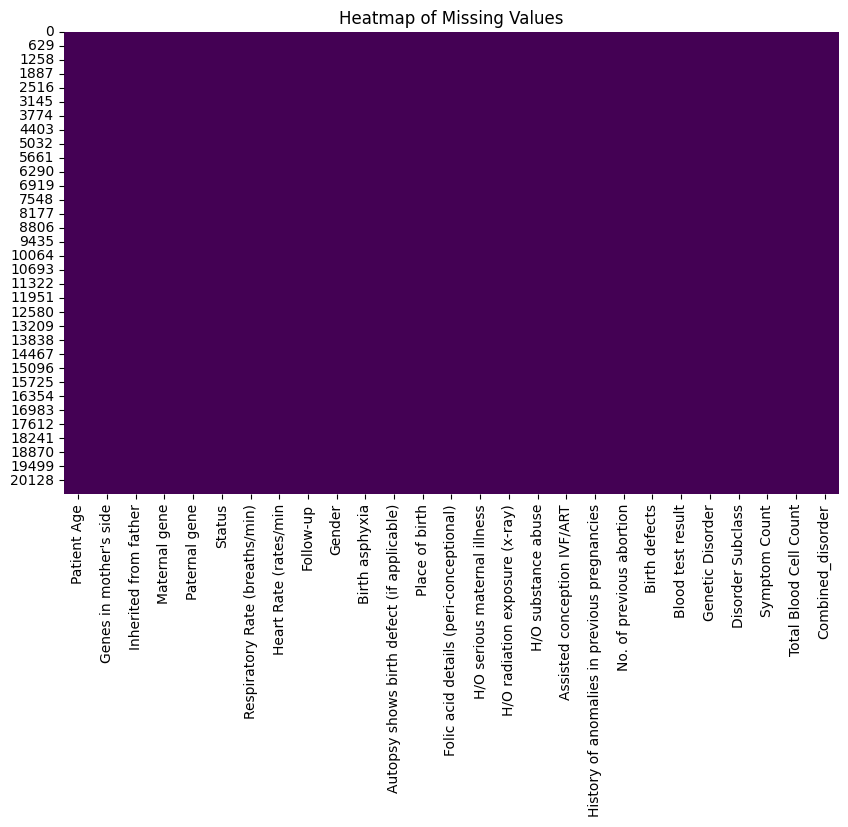

In [290]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Exploratory Data Analysis (EDA)

In [291]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

Firstly , Let's Visualize our taget variables i.e. **Genetic Disorder** and **Disorder Subclass**

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2276\2276620830.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Genetic Disorder', data=df_train, palette=custom_colors, order=category_order)


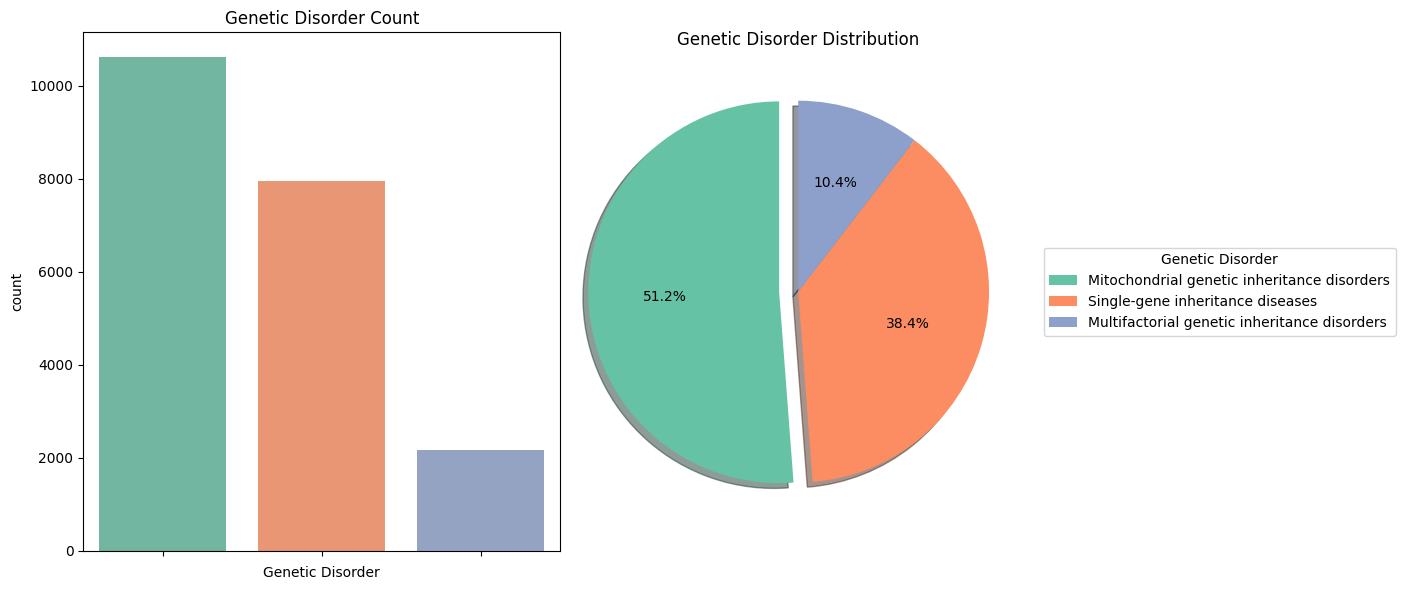

In [292]:
# Custom color palette
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Added a color for the third slice

# Define the order based on value_counts() so both plots have the same order
category_order = df_train['Genetic Disorder'].value_counts().index

# Attrition Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Genetic Disorder (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Genetic Disorder', data=df_train, palette=custom_colors, order=category_order)
plt.title('Genetic Disorder Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Genetic Disorder Distribution (now in the same order)
plt.subplot(1, 2, 2)
satisfaction_counts = df_train['Genetic Disorder'].value_counts()
plt.pie(satisfaction_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0), shadow=True, colors=custom_colors)
plt.title('Genetic Disorder Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Genetic Disorder")

plt.tight_layout()
plt.show()

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2276\4052136618.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disorder Subclass', data=df_train, palette=custom_colors, order=category_order)


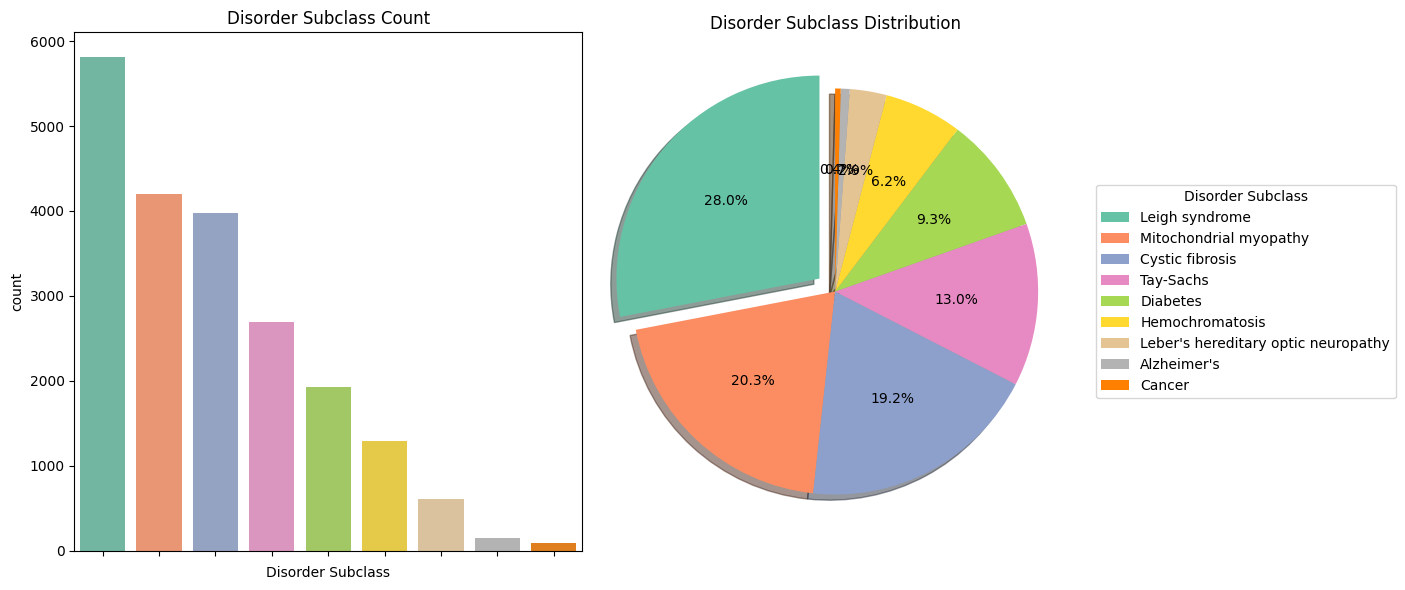

In [293]:
# Custom color palette with 9 colors
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff7f00']

# Define the order based on value_counts() so both plots have the same order
category_order = df_train['Disorder Subclass'].value_counts().index

# Plot Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Disorder Subclass (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Disorder Subclass', data=df_train, palette=custom_colors, order=category_order)
plt.title('Disorder Subclass Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Disorder Subclass Distribution (with the same order)
plt.subplot(1, 2, 2)
disorder_counts = df_train['Disorder Subclass'].value_counts()
plt.pie(disorder_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True, colors=custom_colors)
plt.title('Disorder Subclass Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Disorder Subclass")

plt.tight_layout()
plt.show()

Now, Let's see the visualization of features

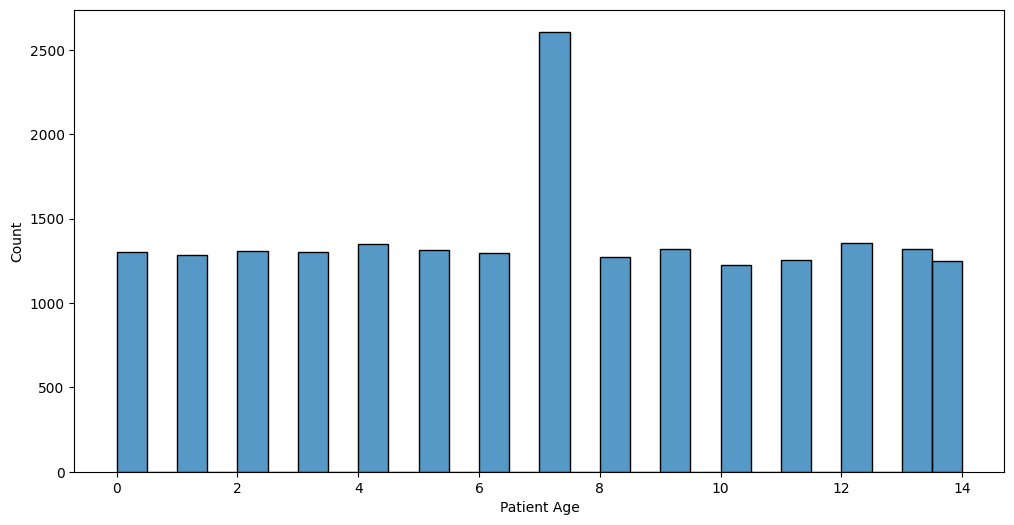

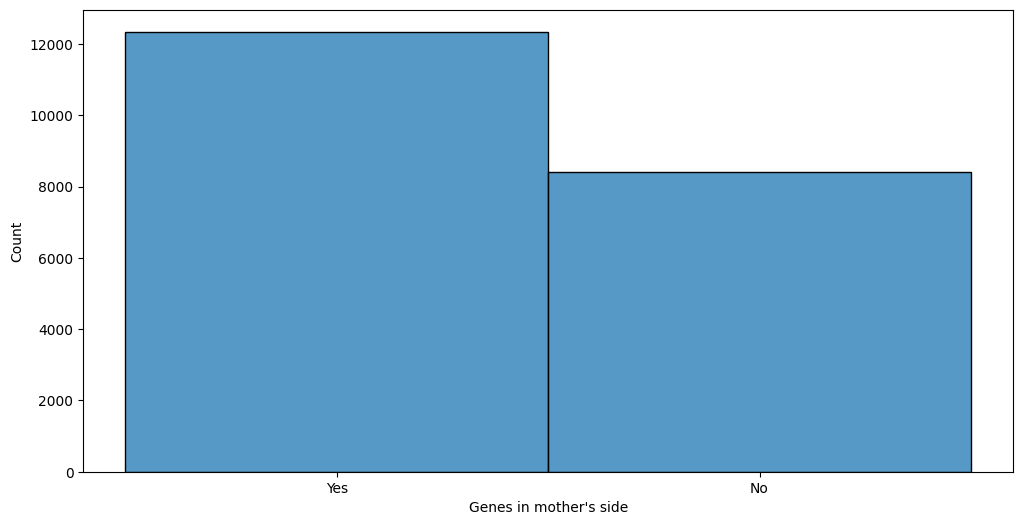

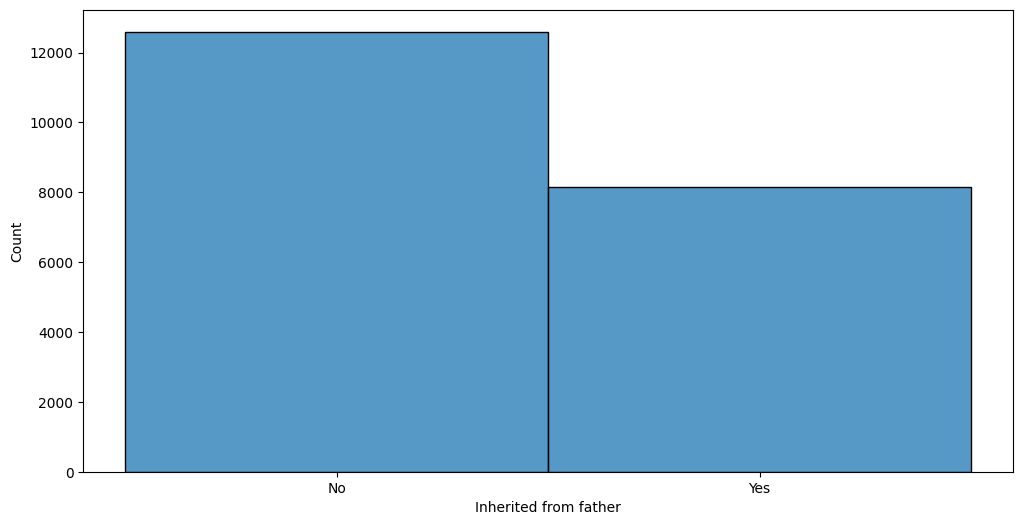

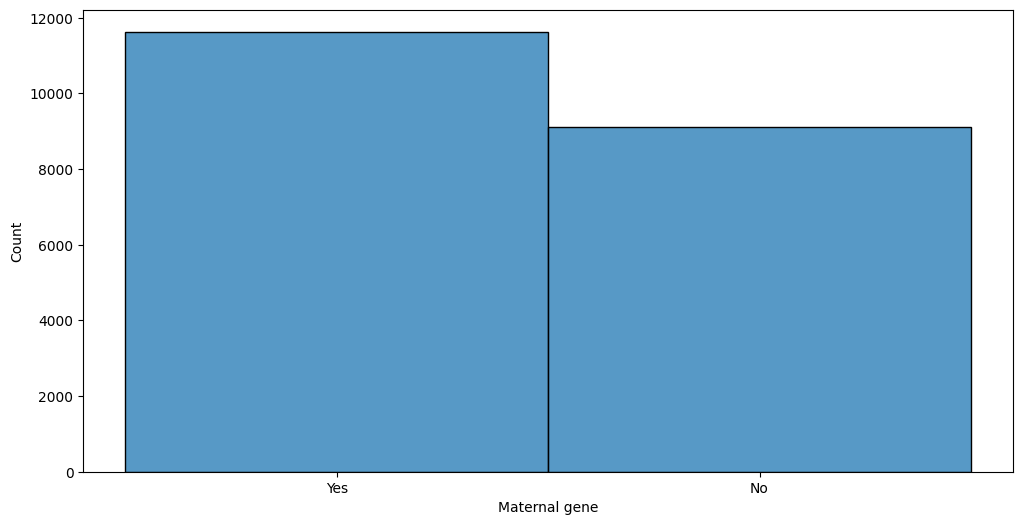

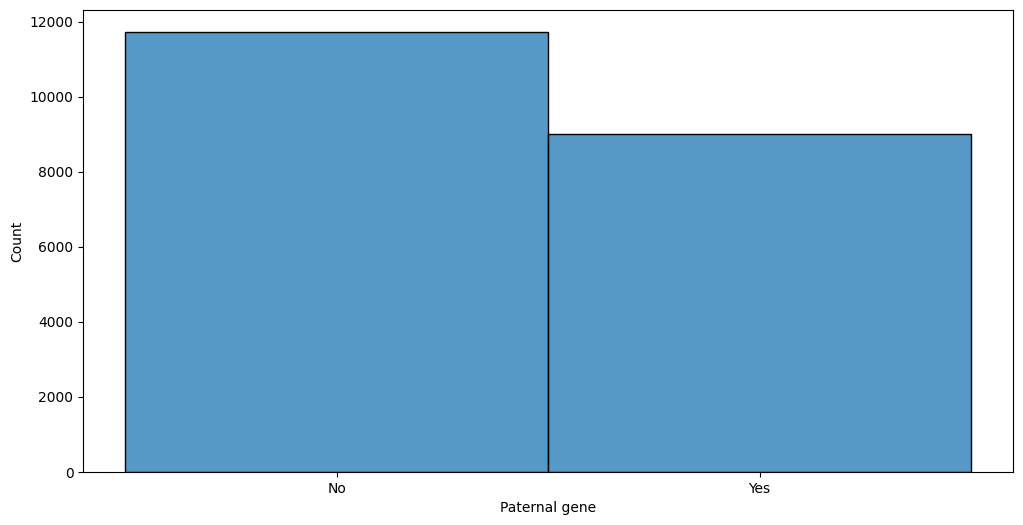

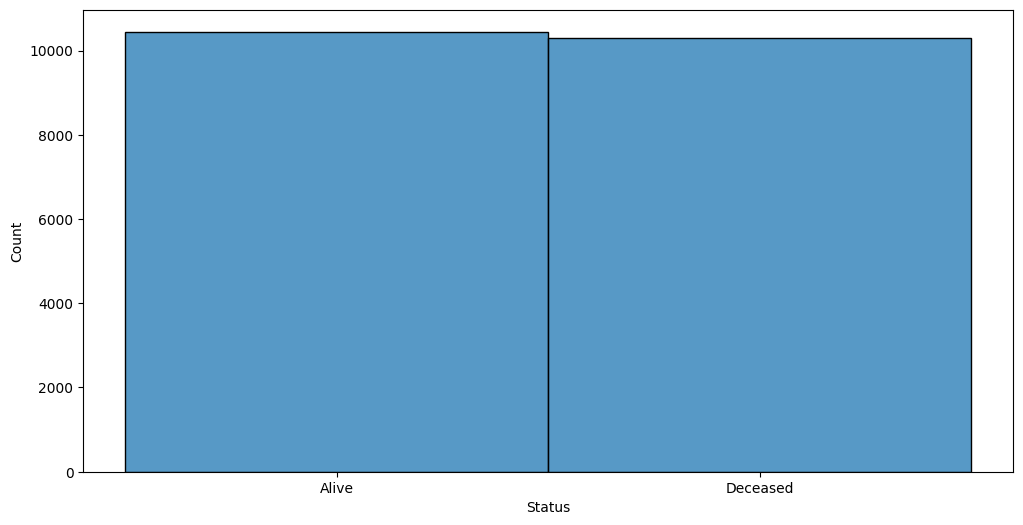

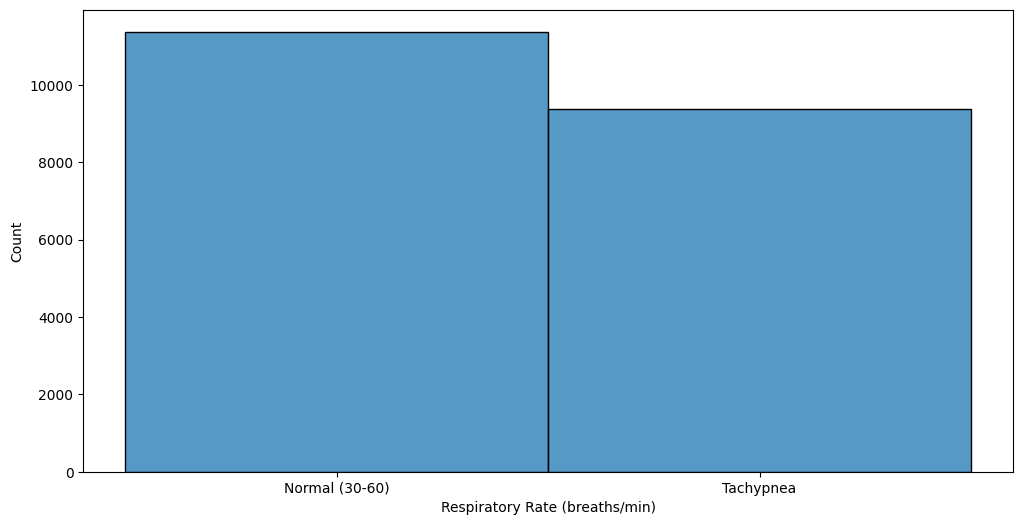

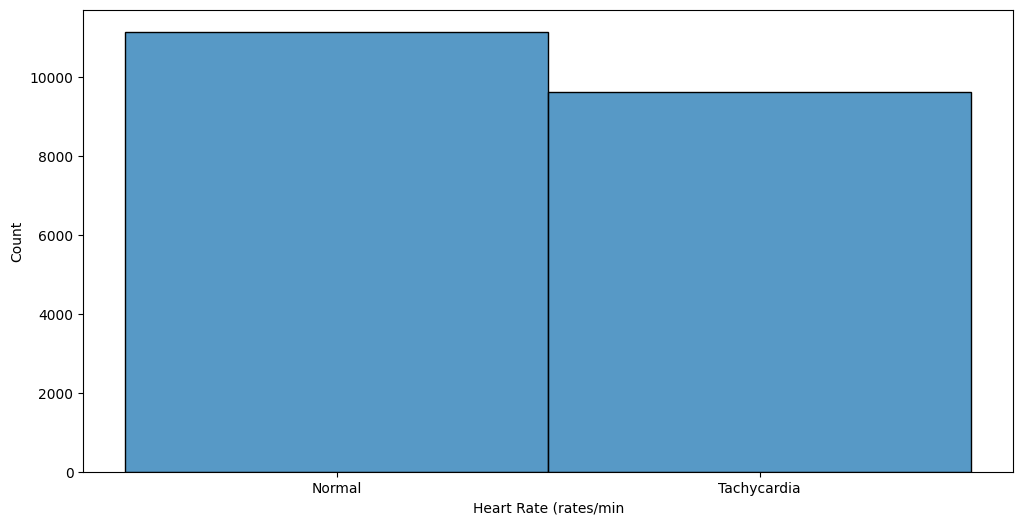

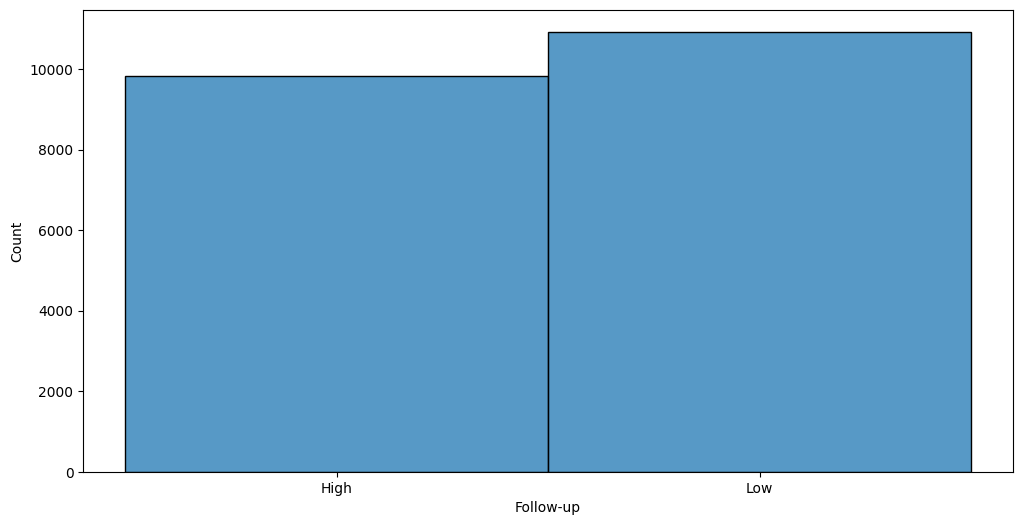

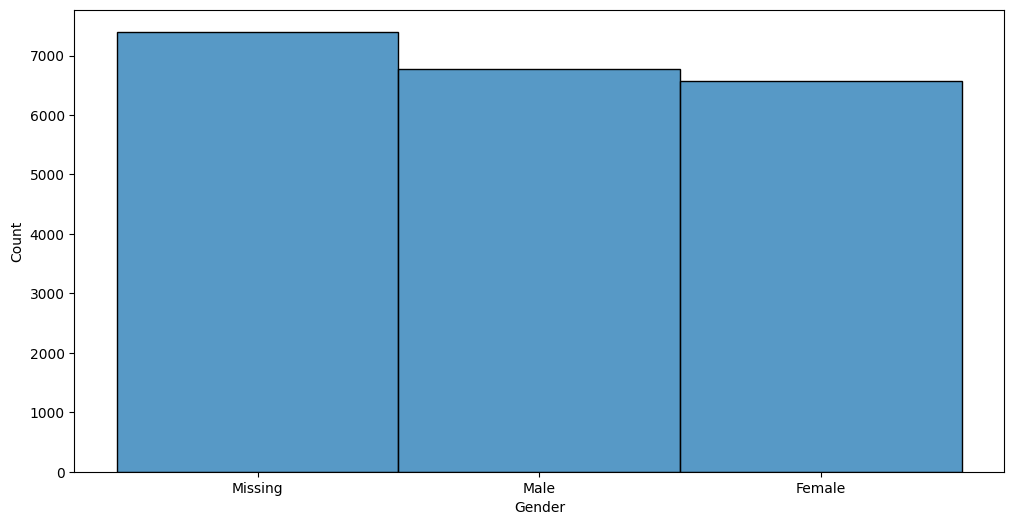

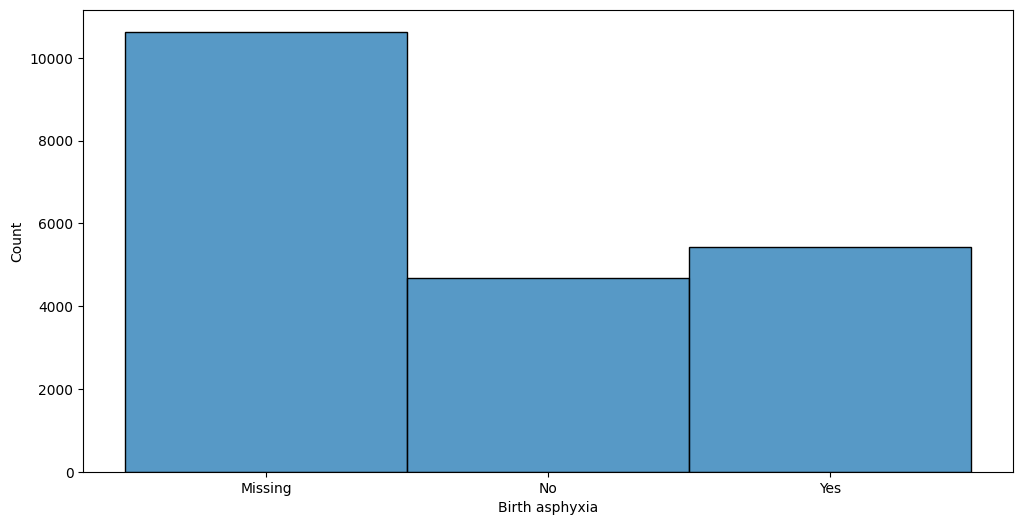

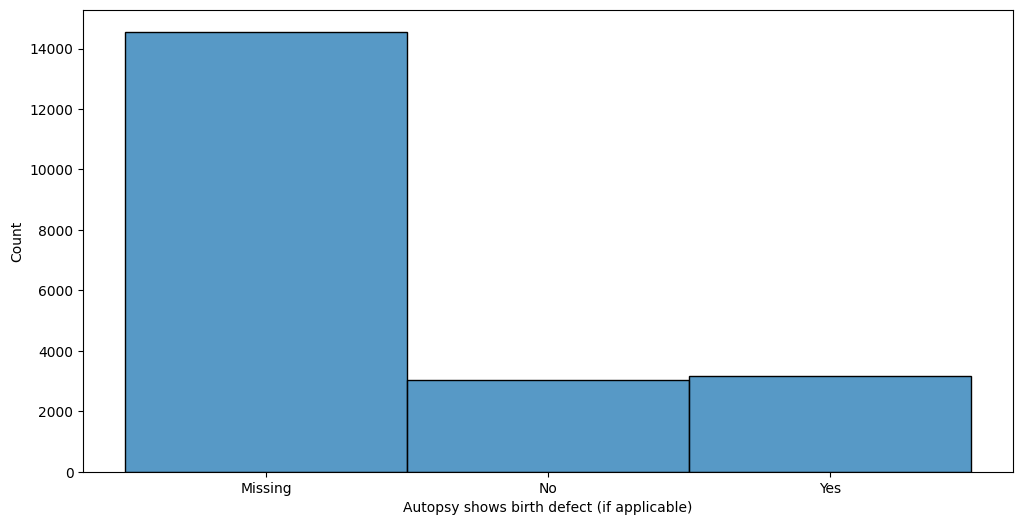

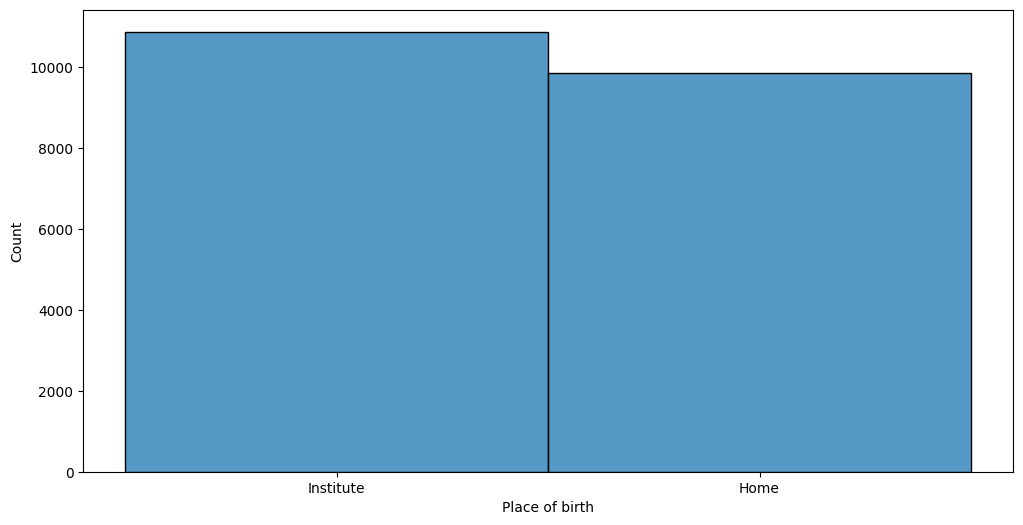

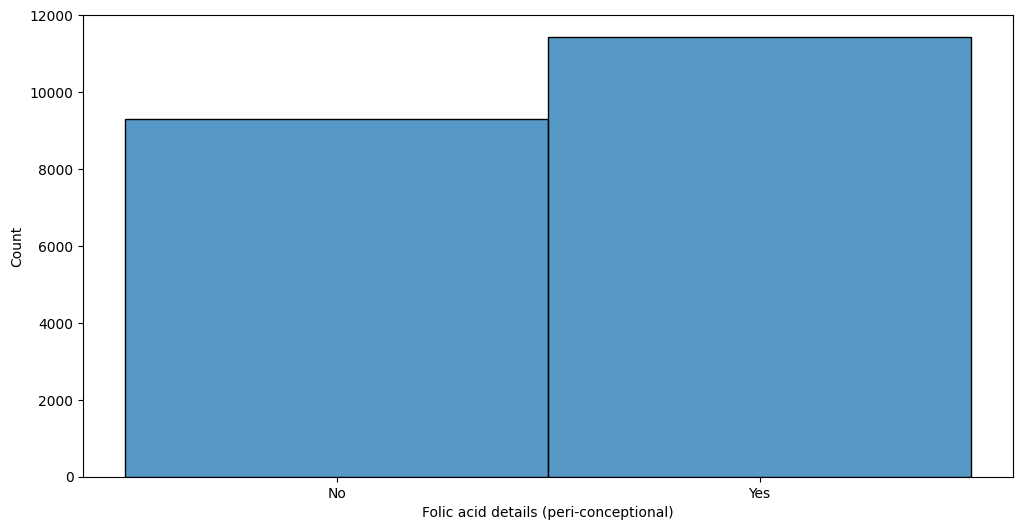

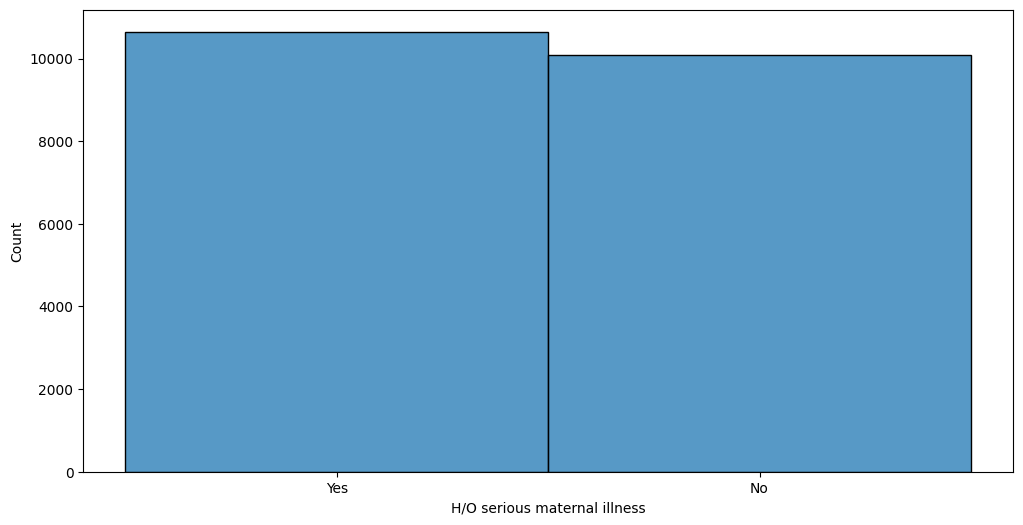

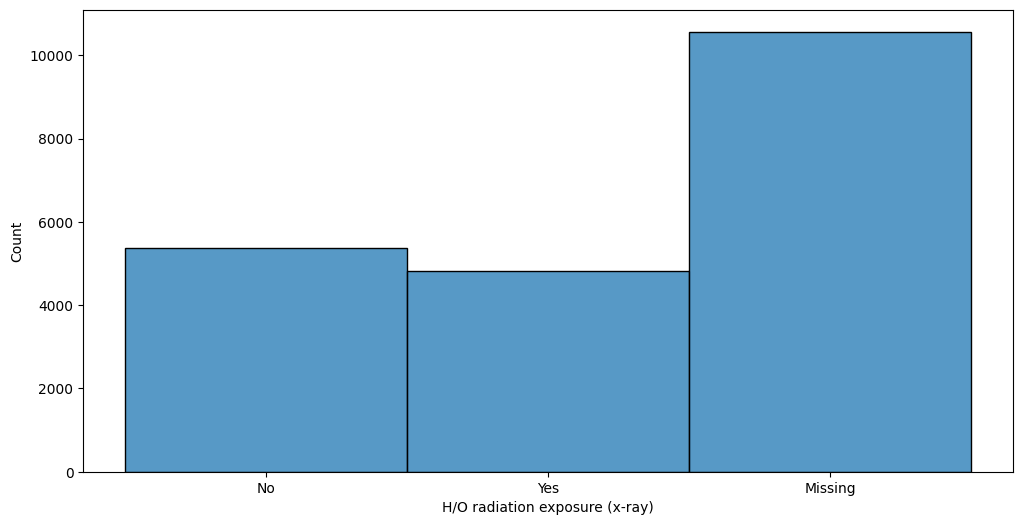

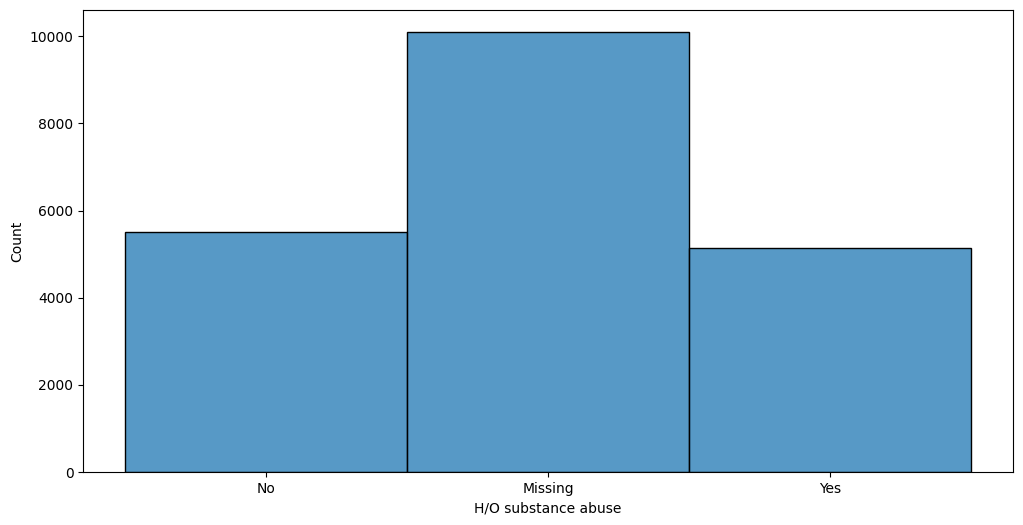

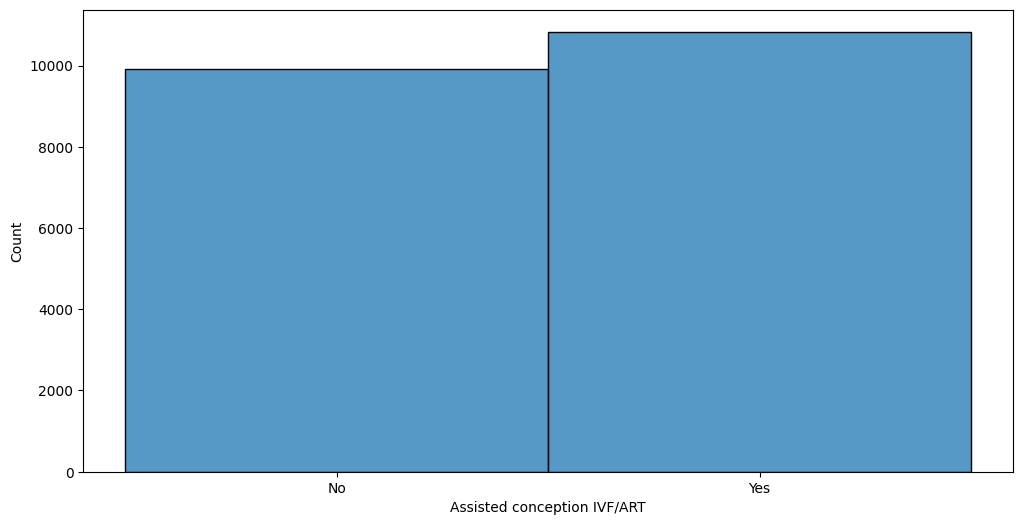

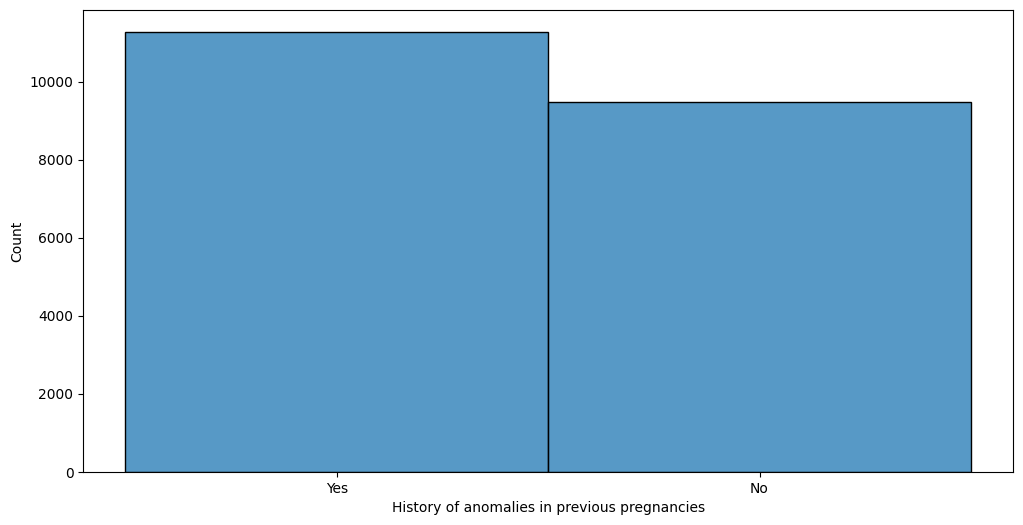

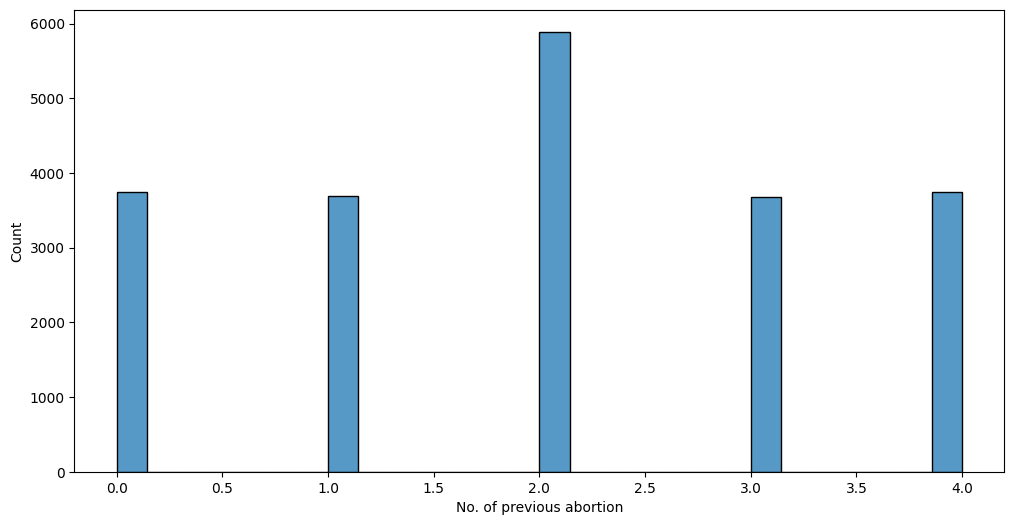

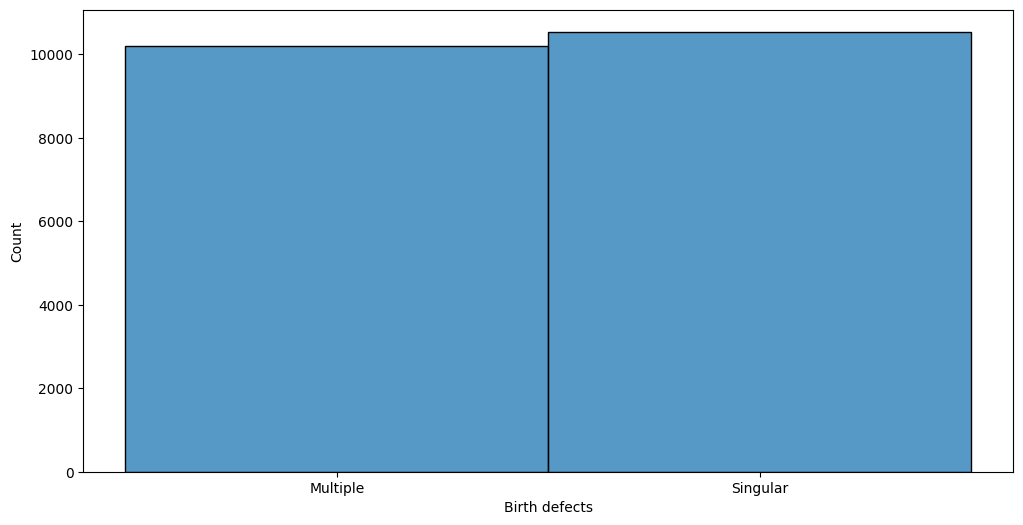

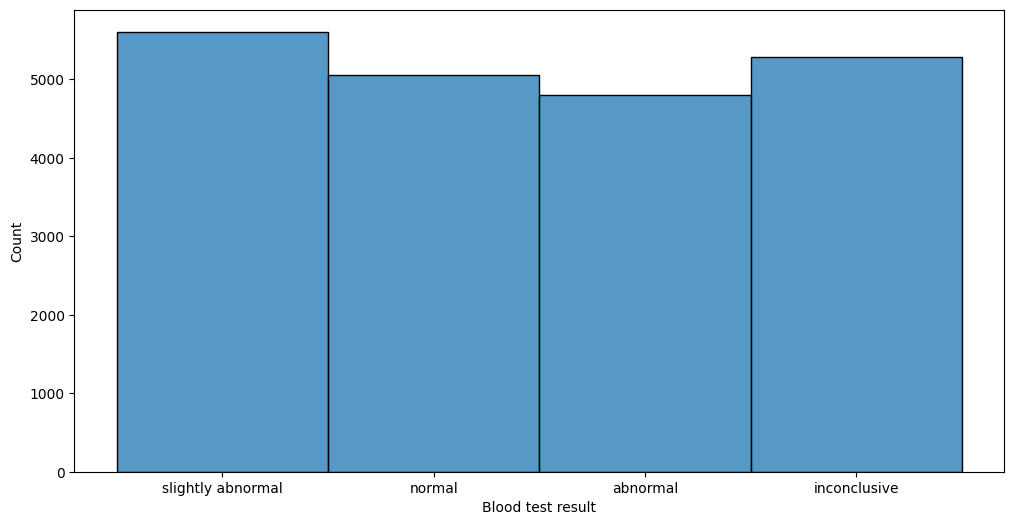

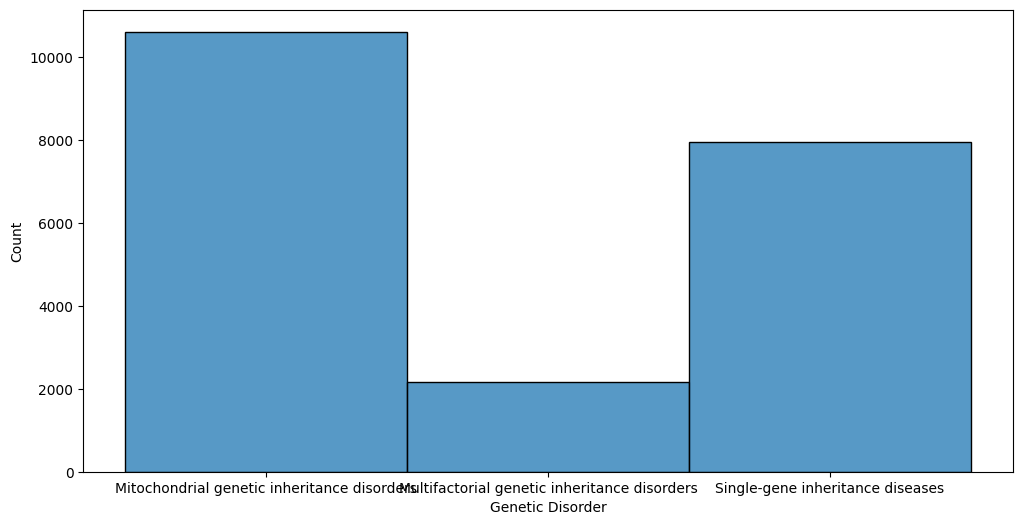

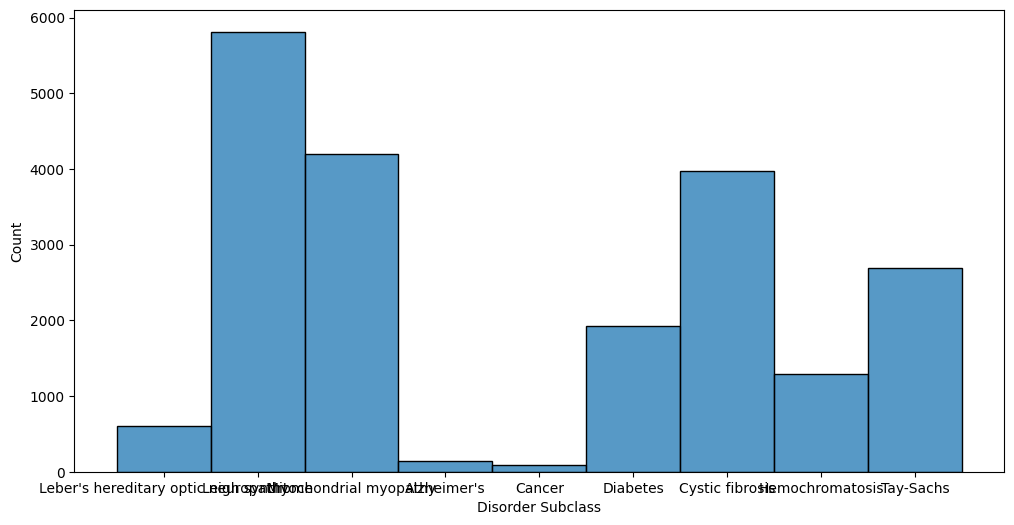

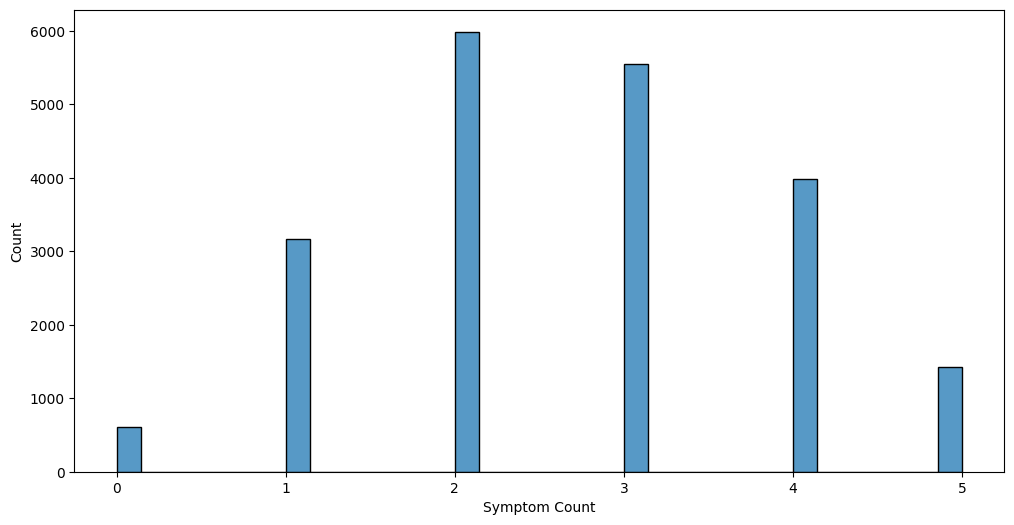

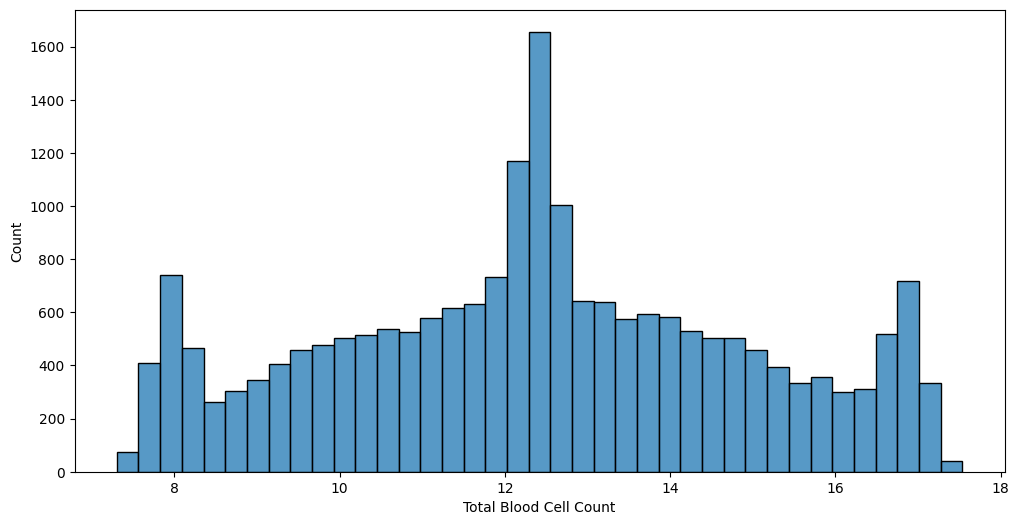

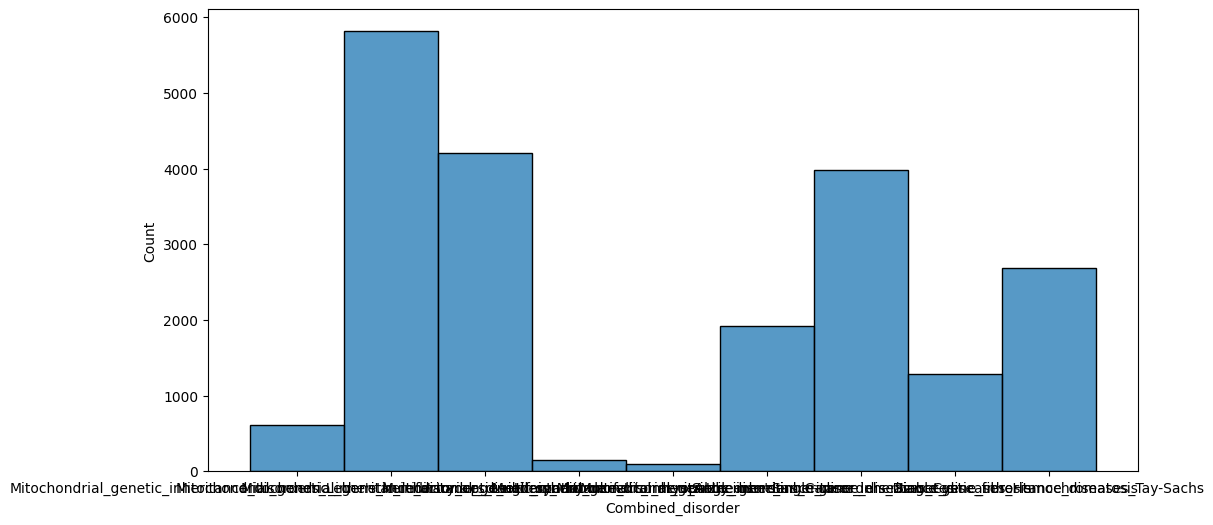

In [294]:
for col in df_train.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_train[col])
    plt.show()

Visualise Data and its Effect on Target (Genetic Disorder & Disorder Subclass)

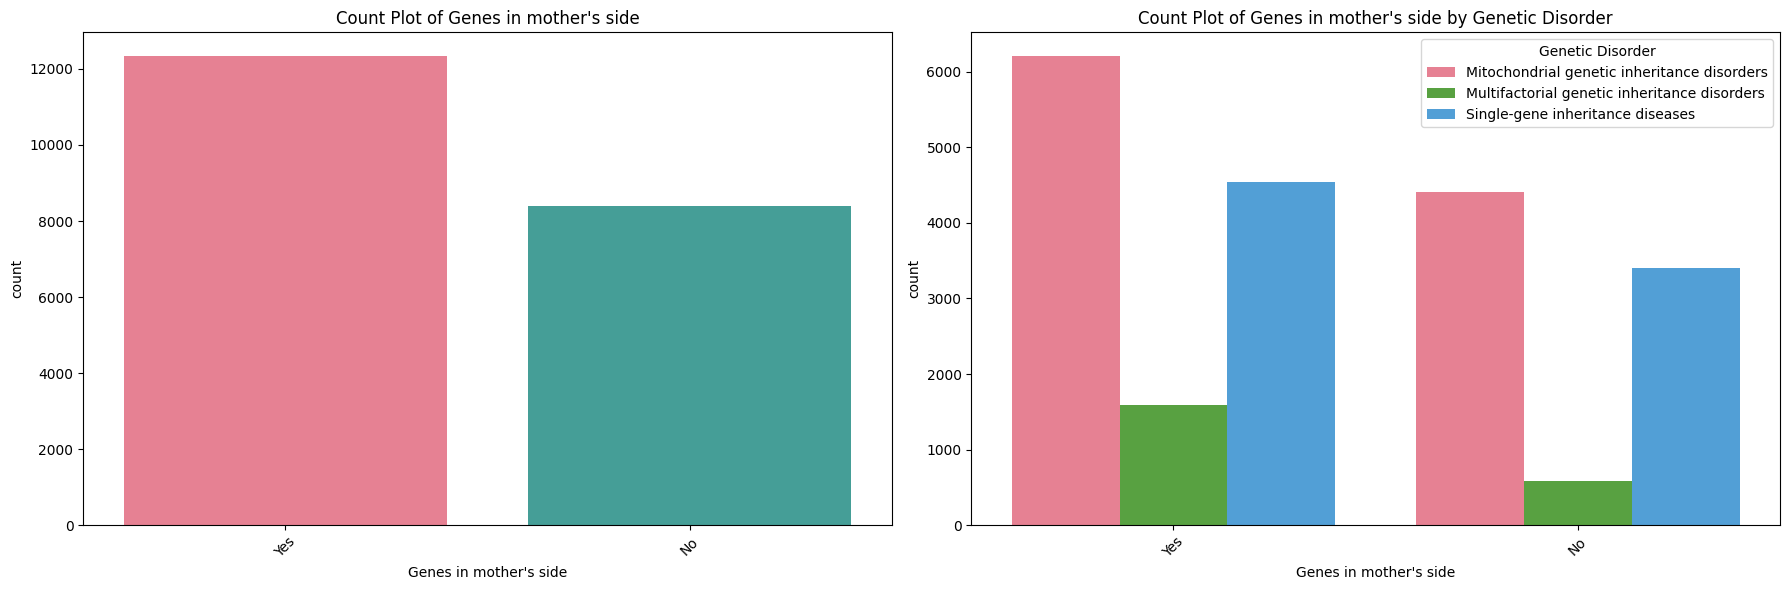

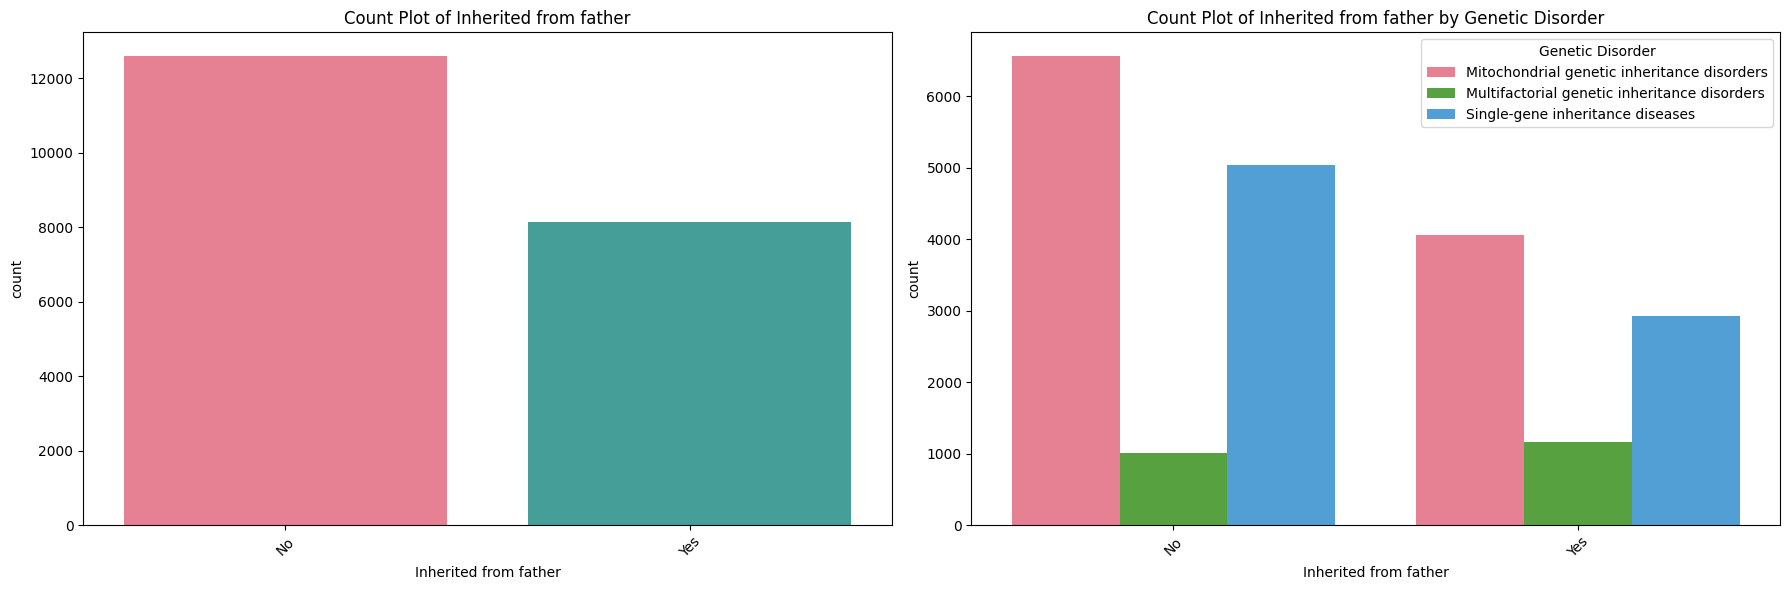

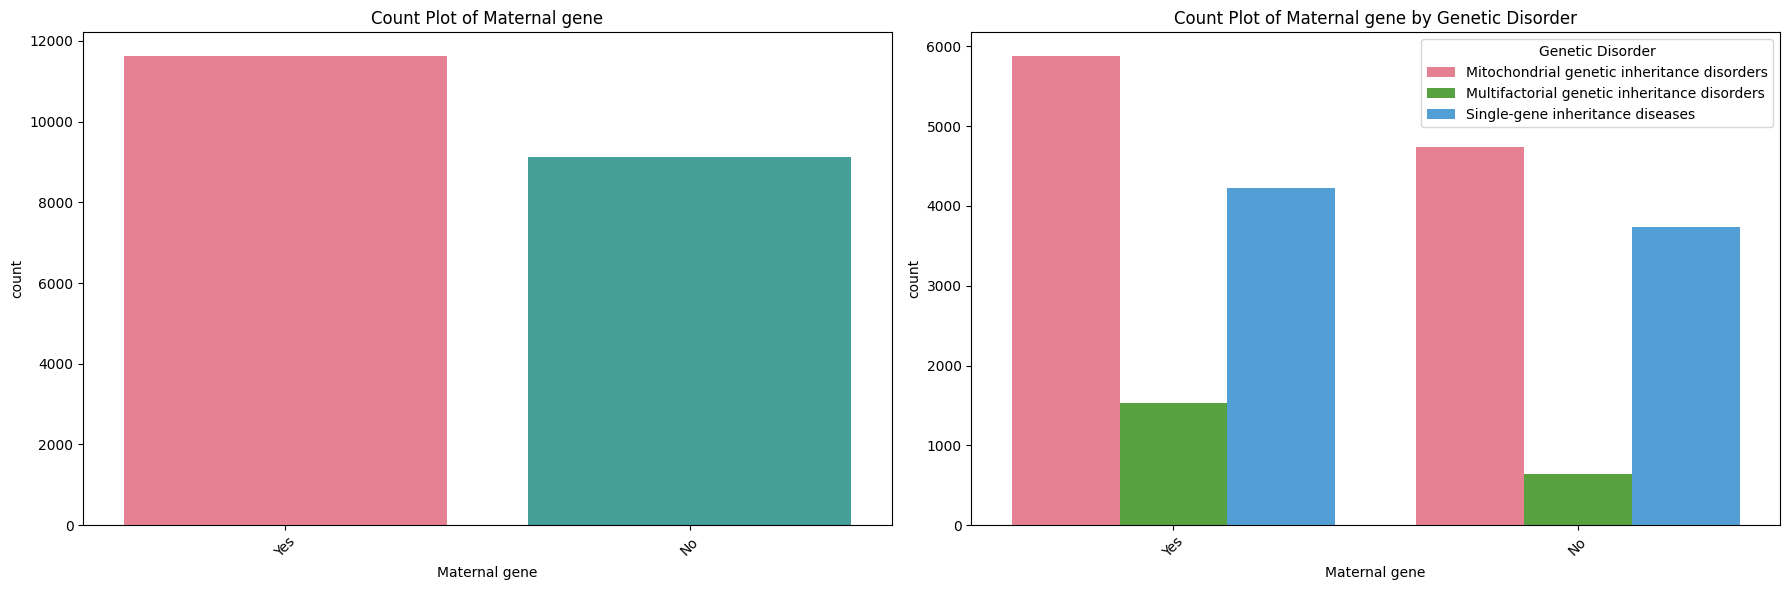

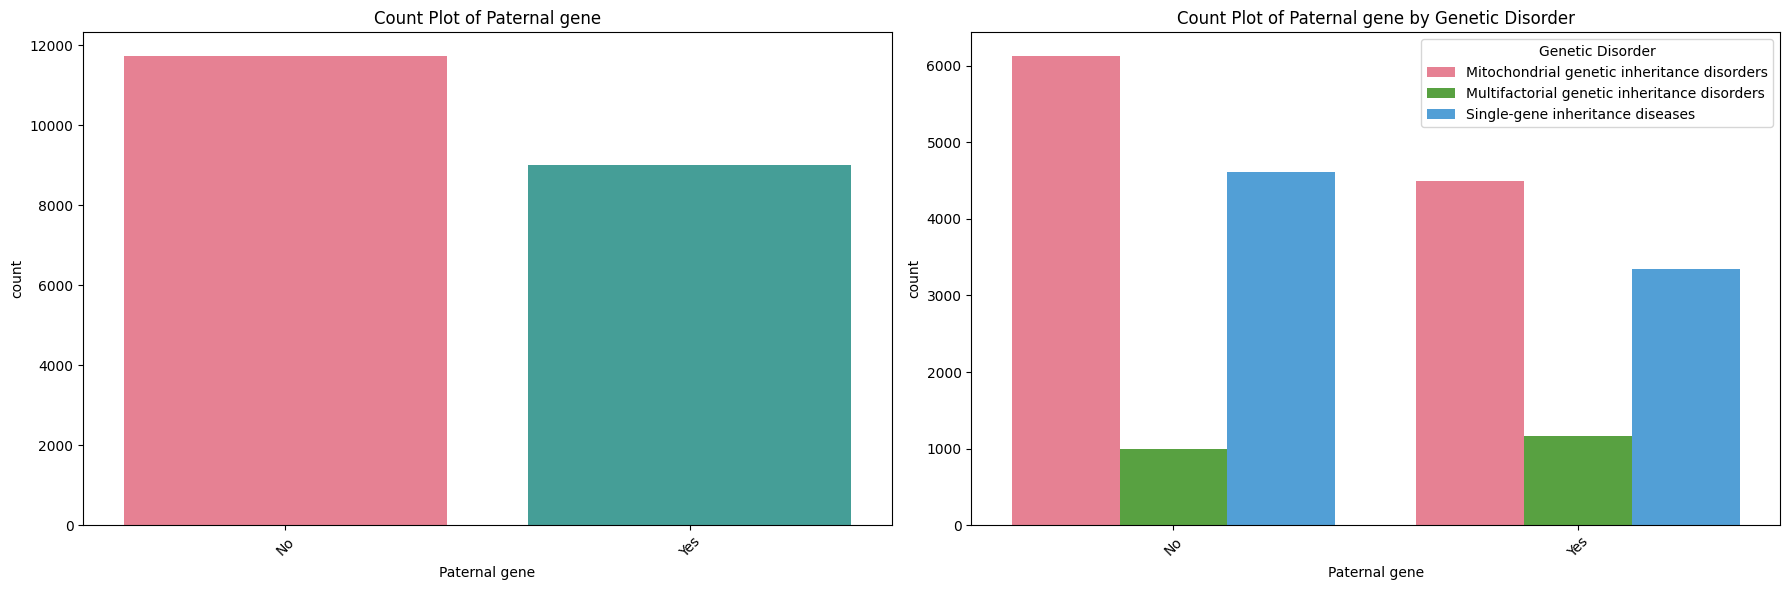

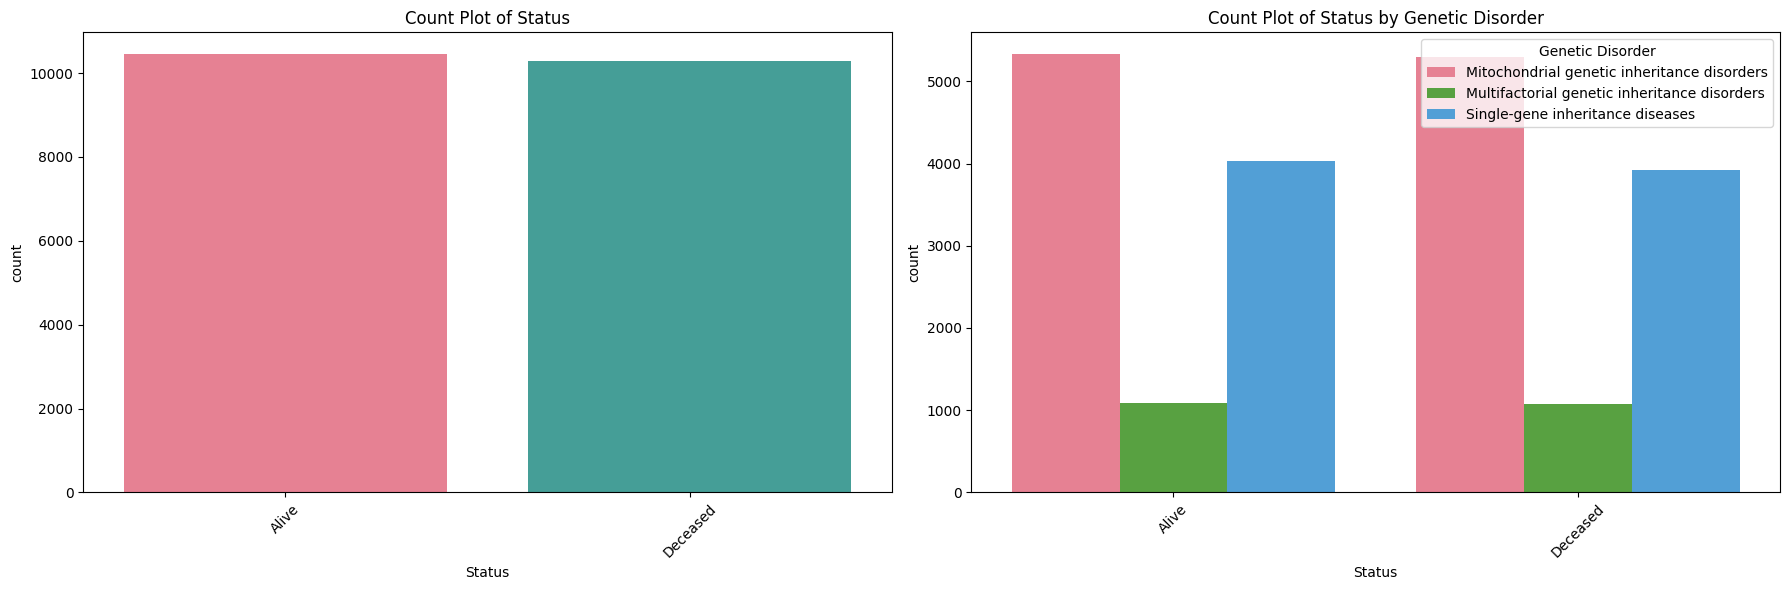

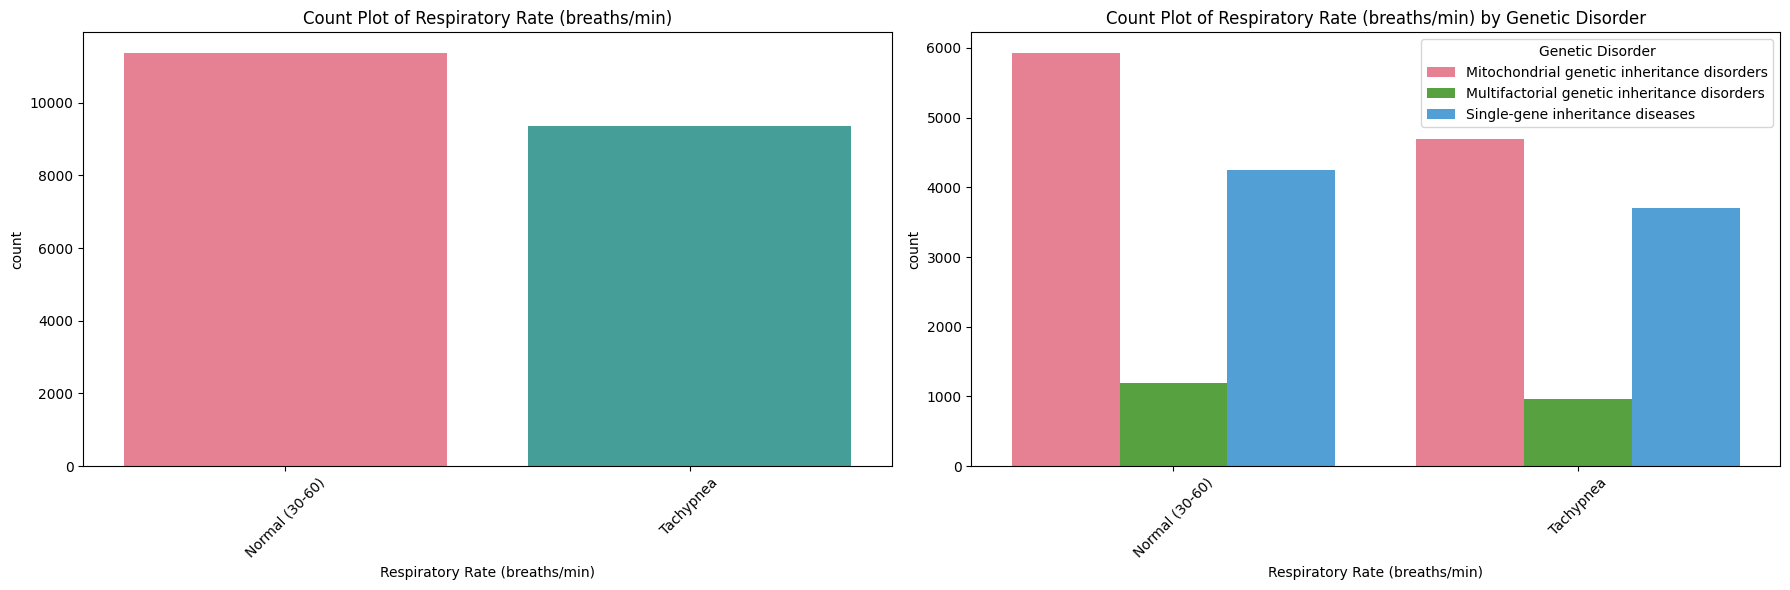

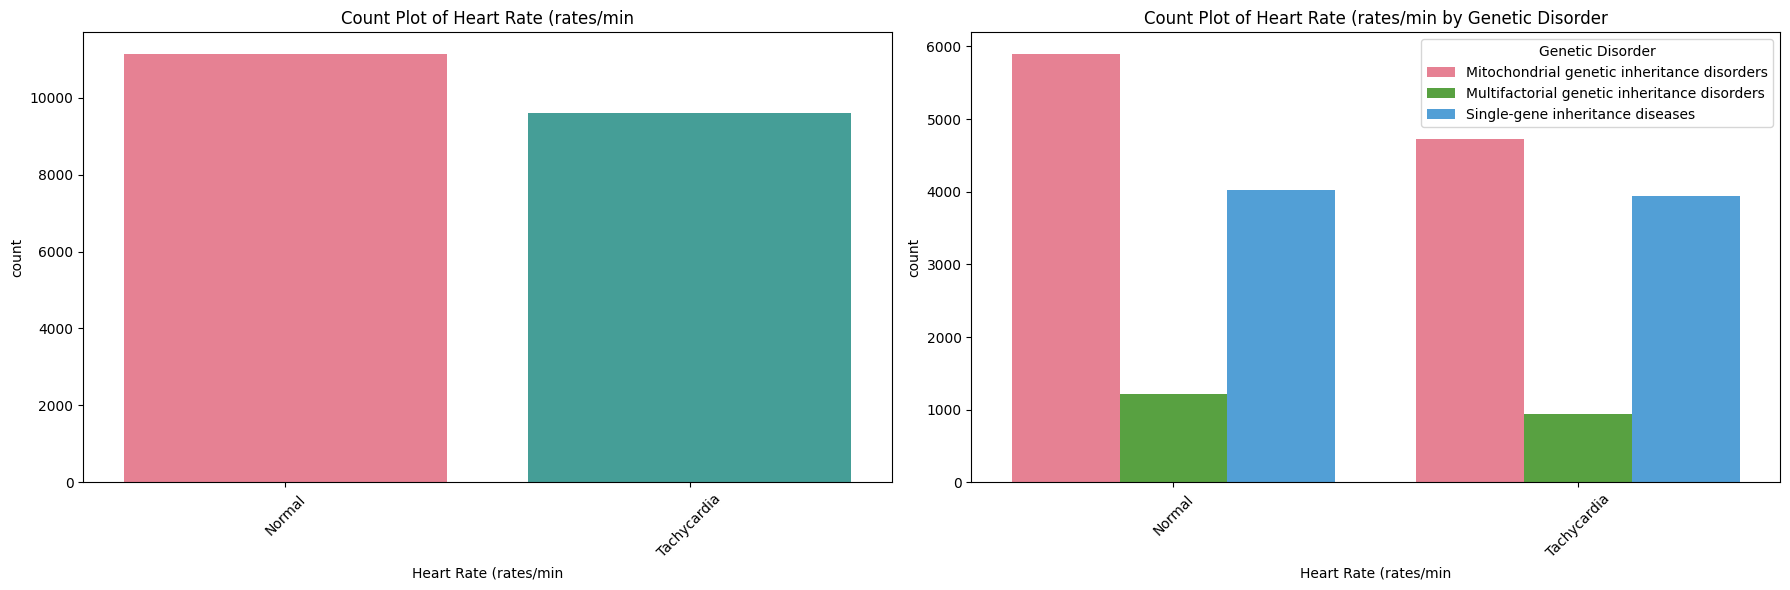

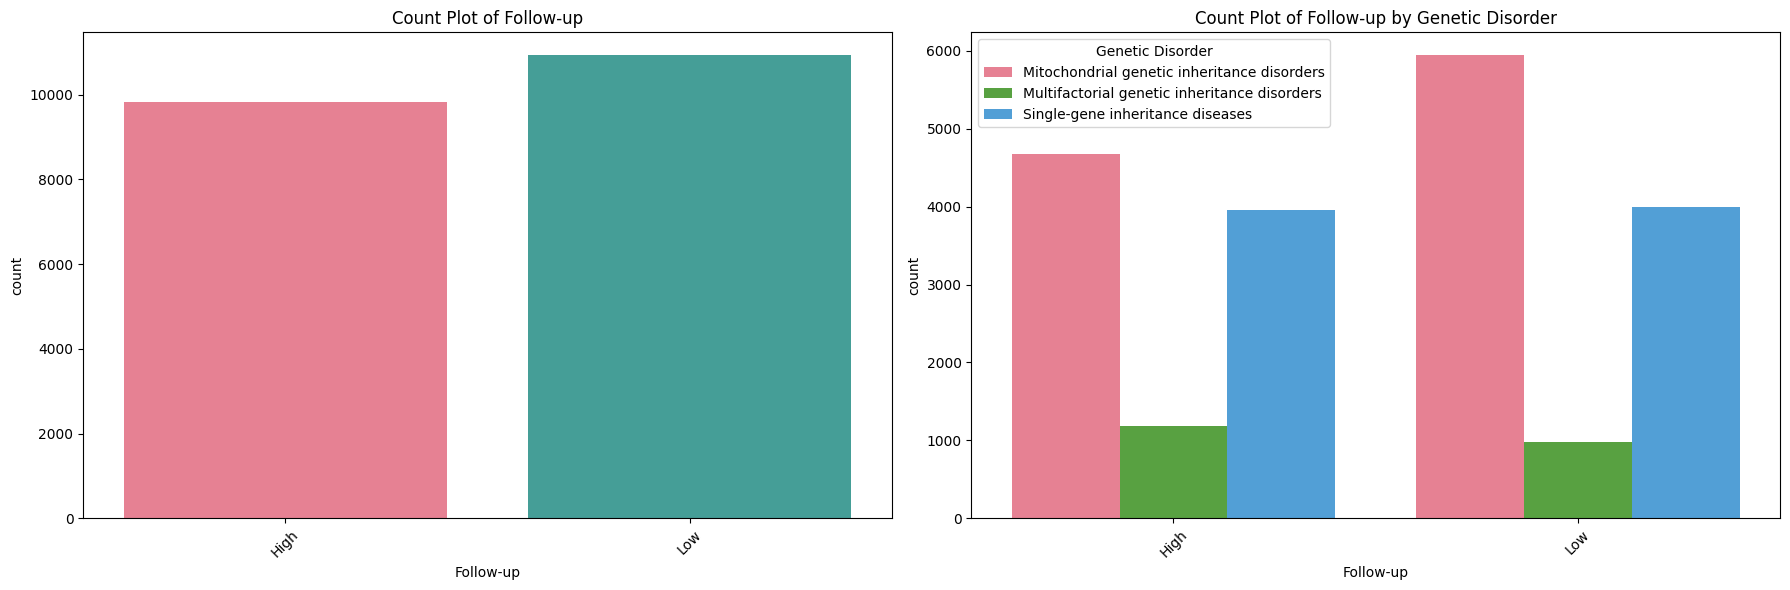

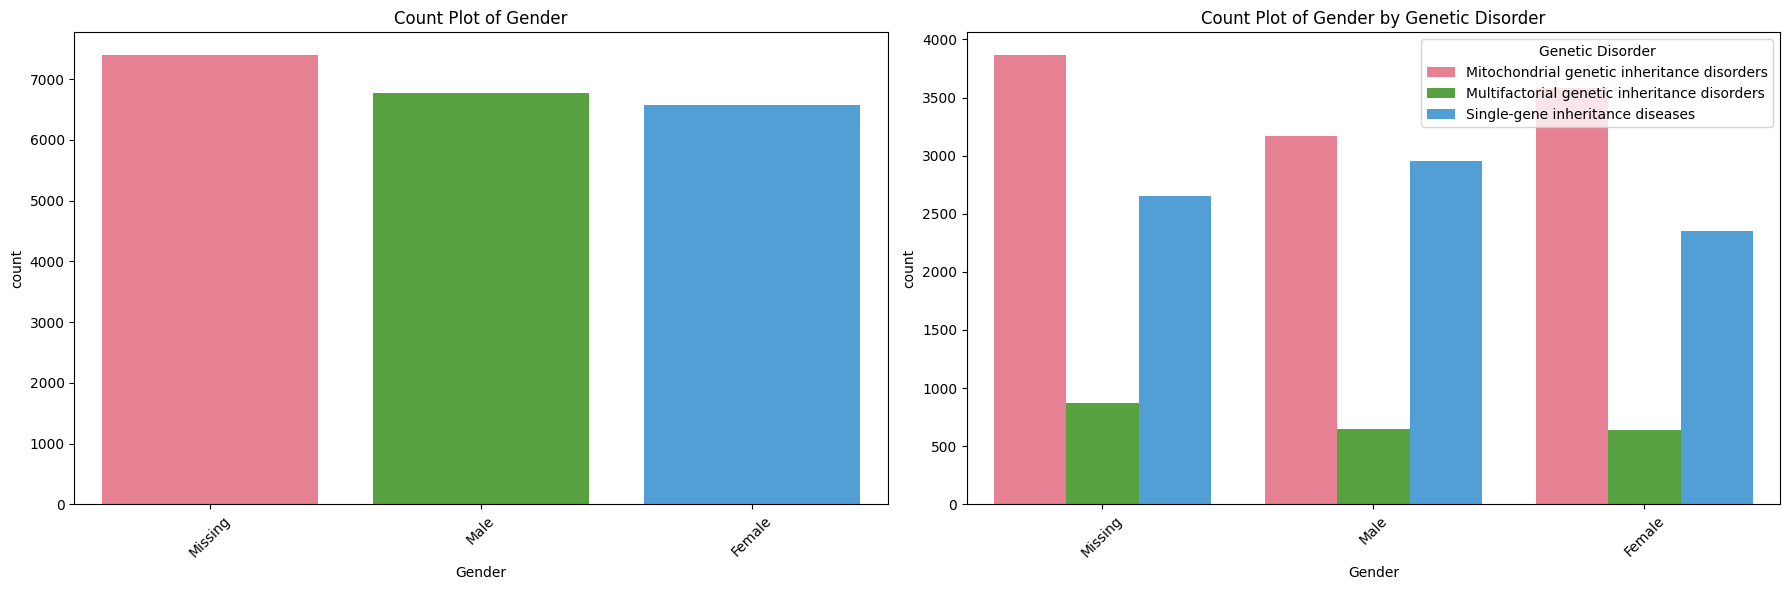

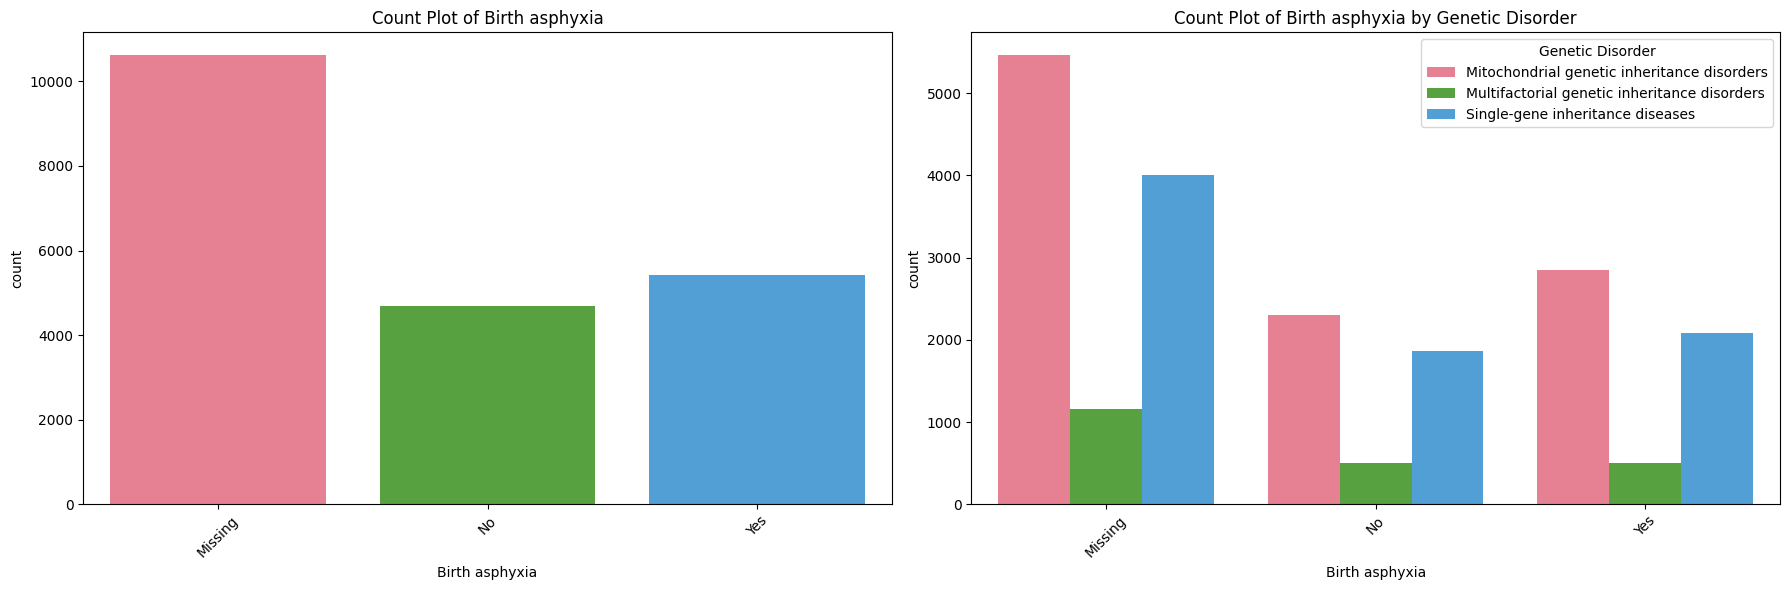

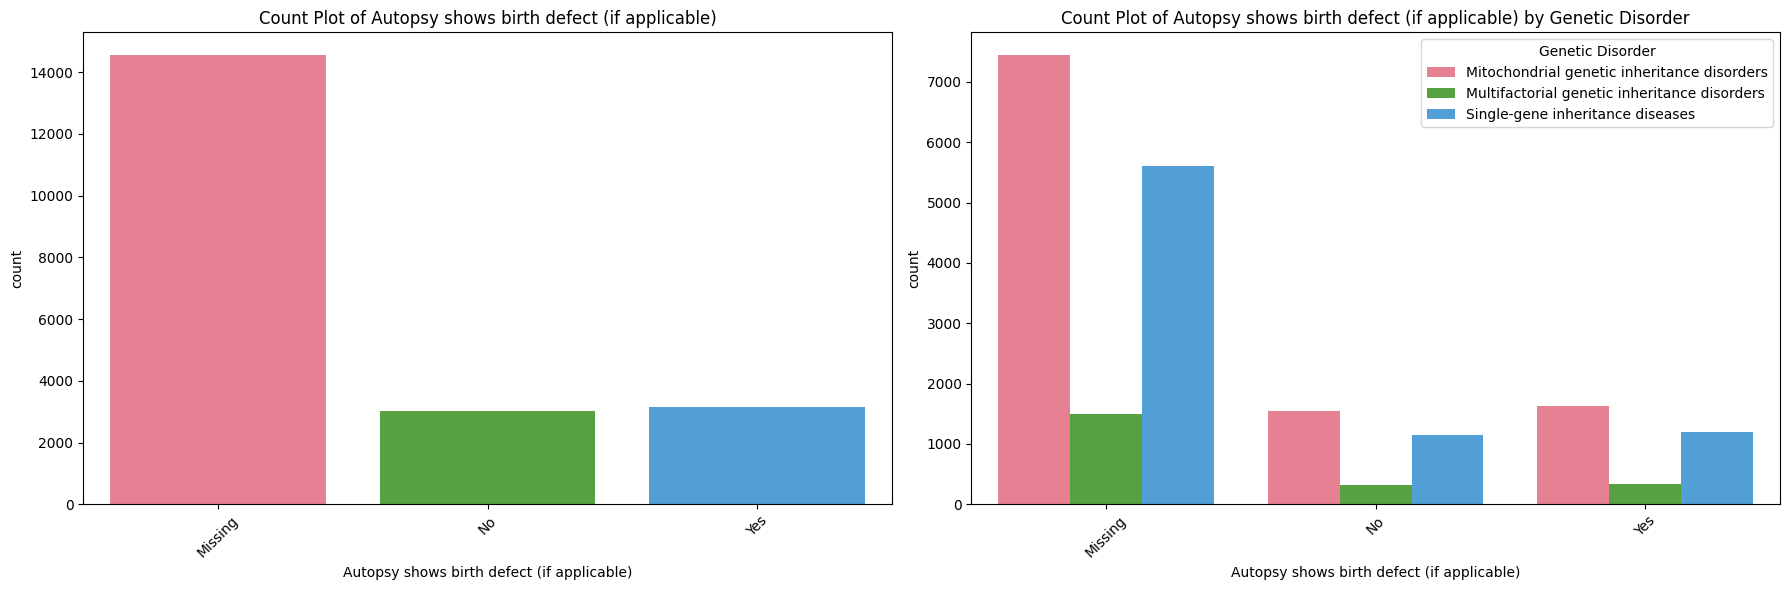

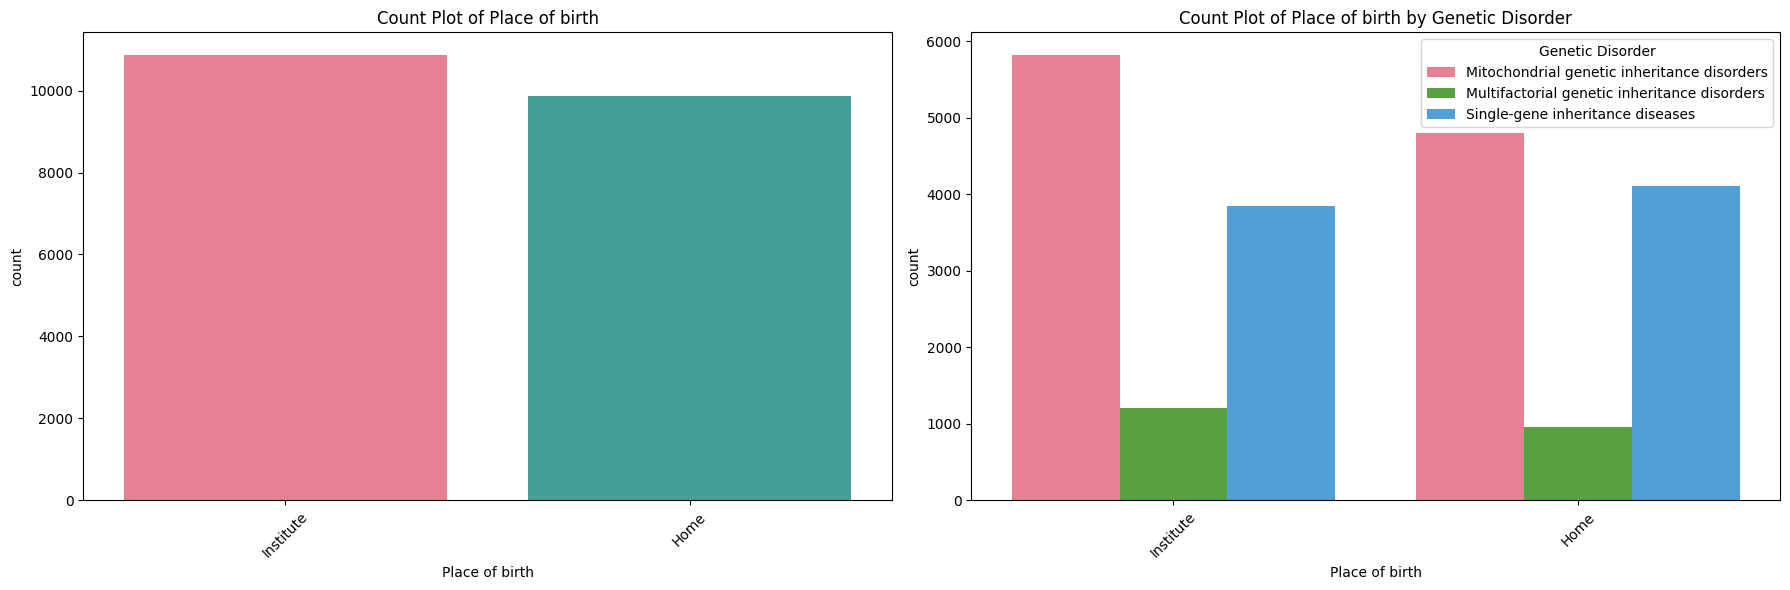

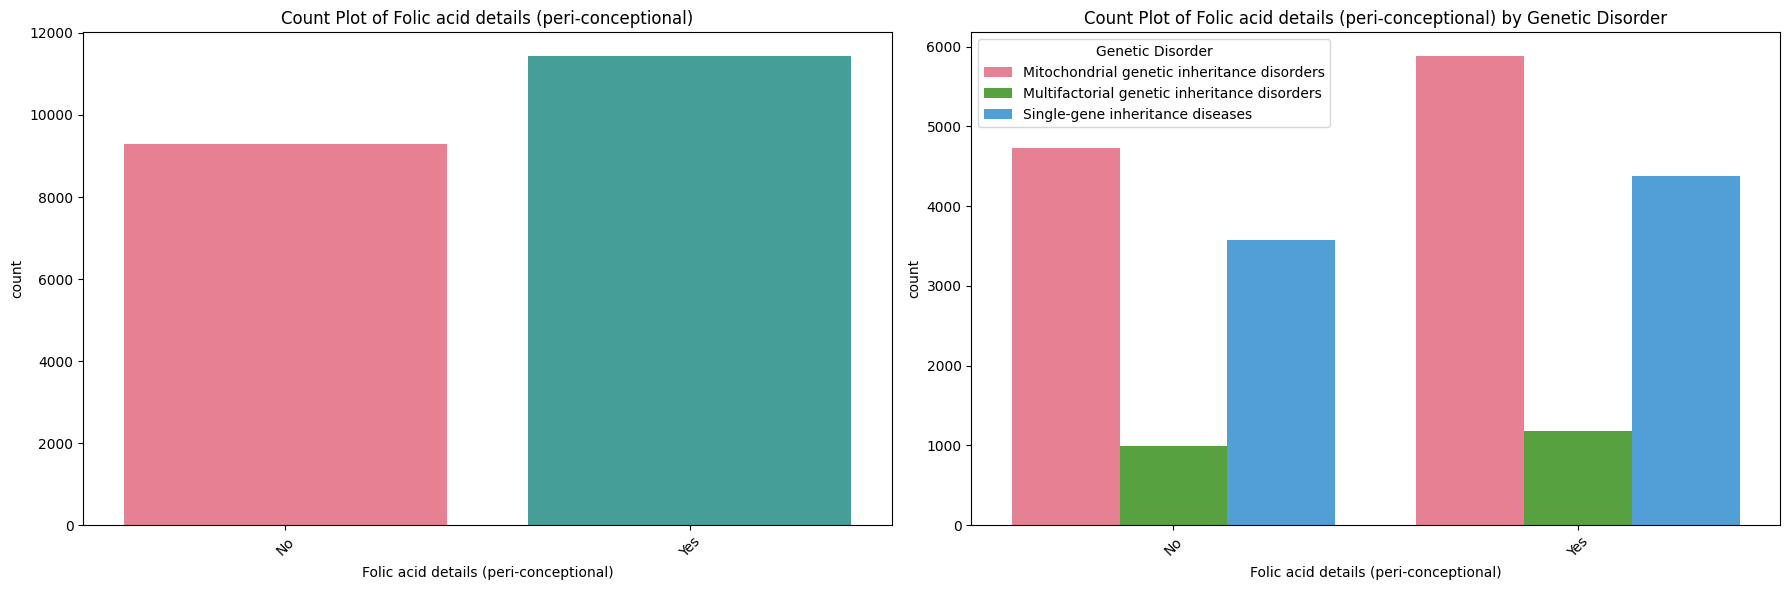

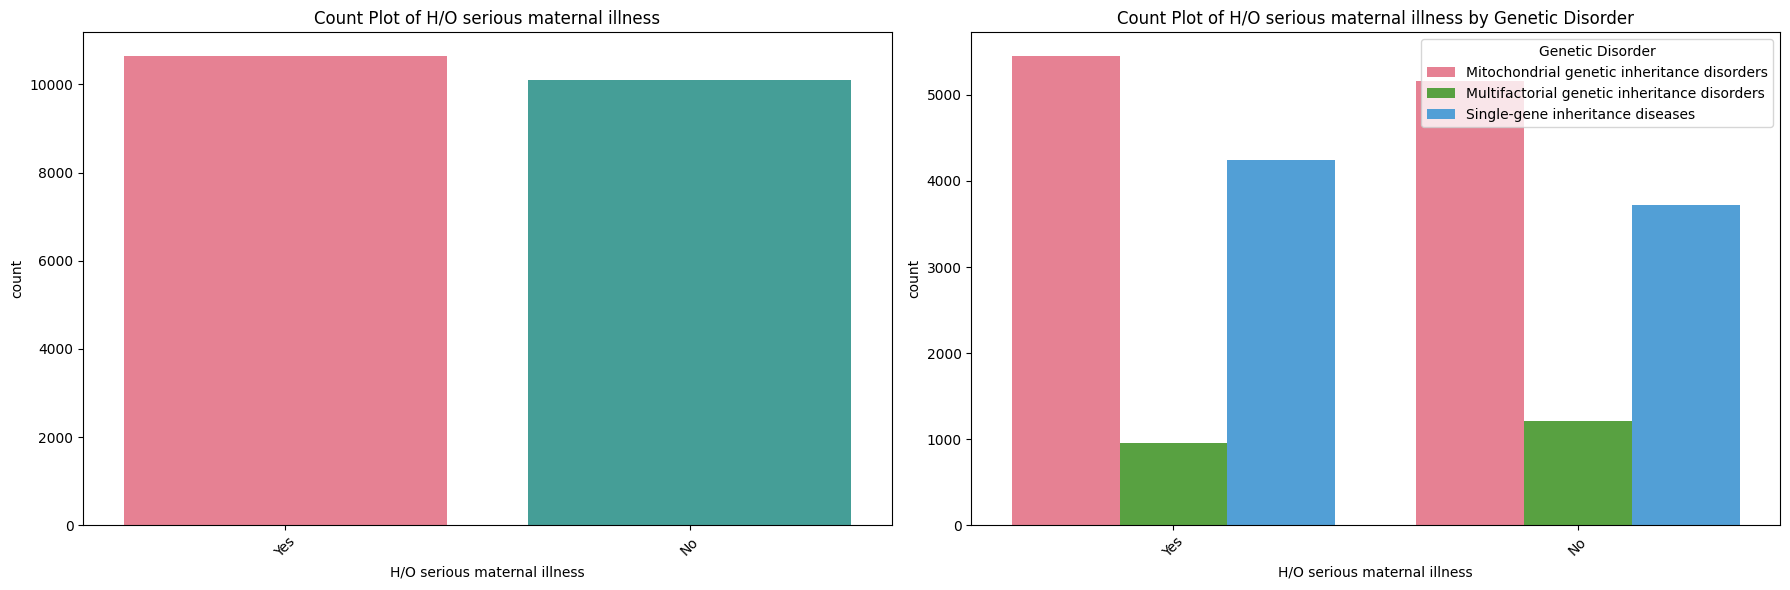

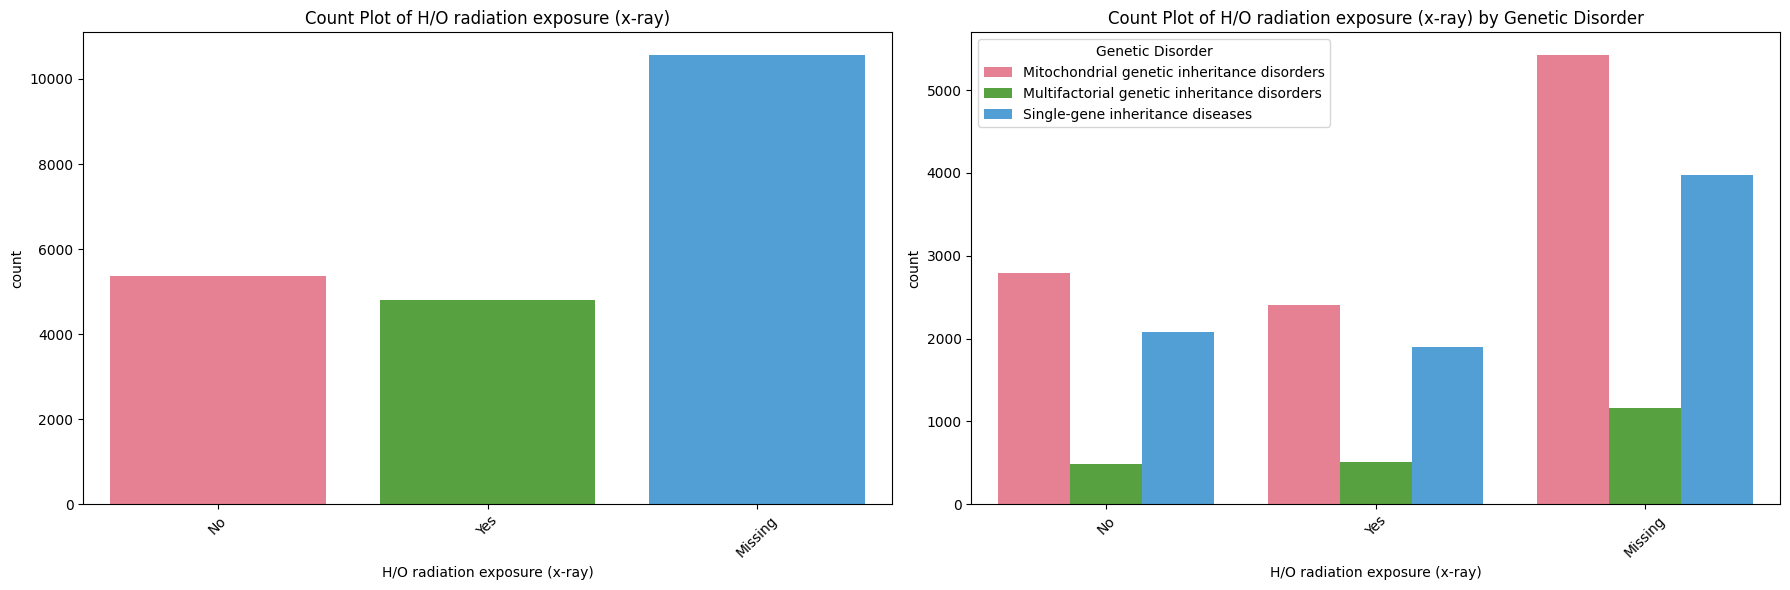

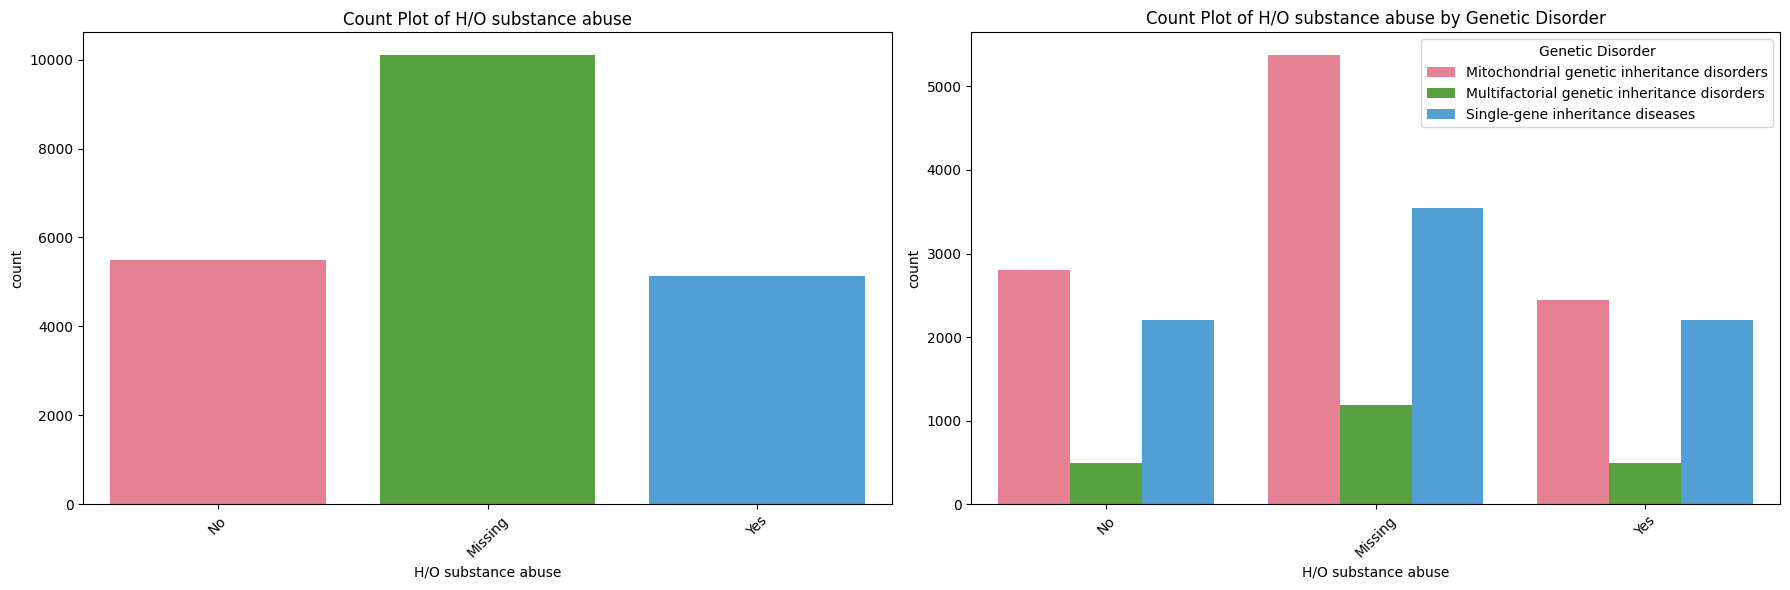

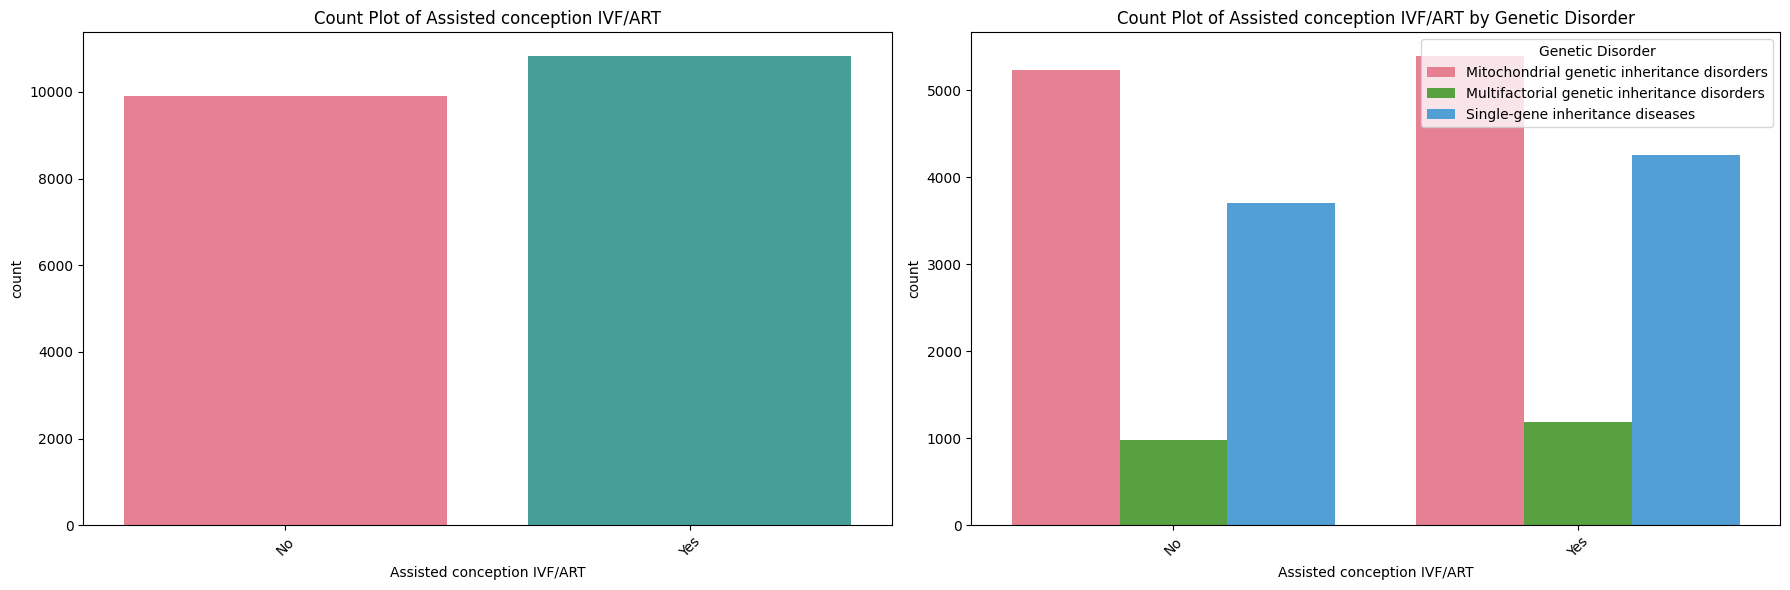

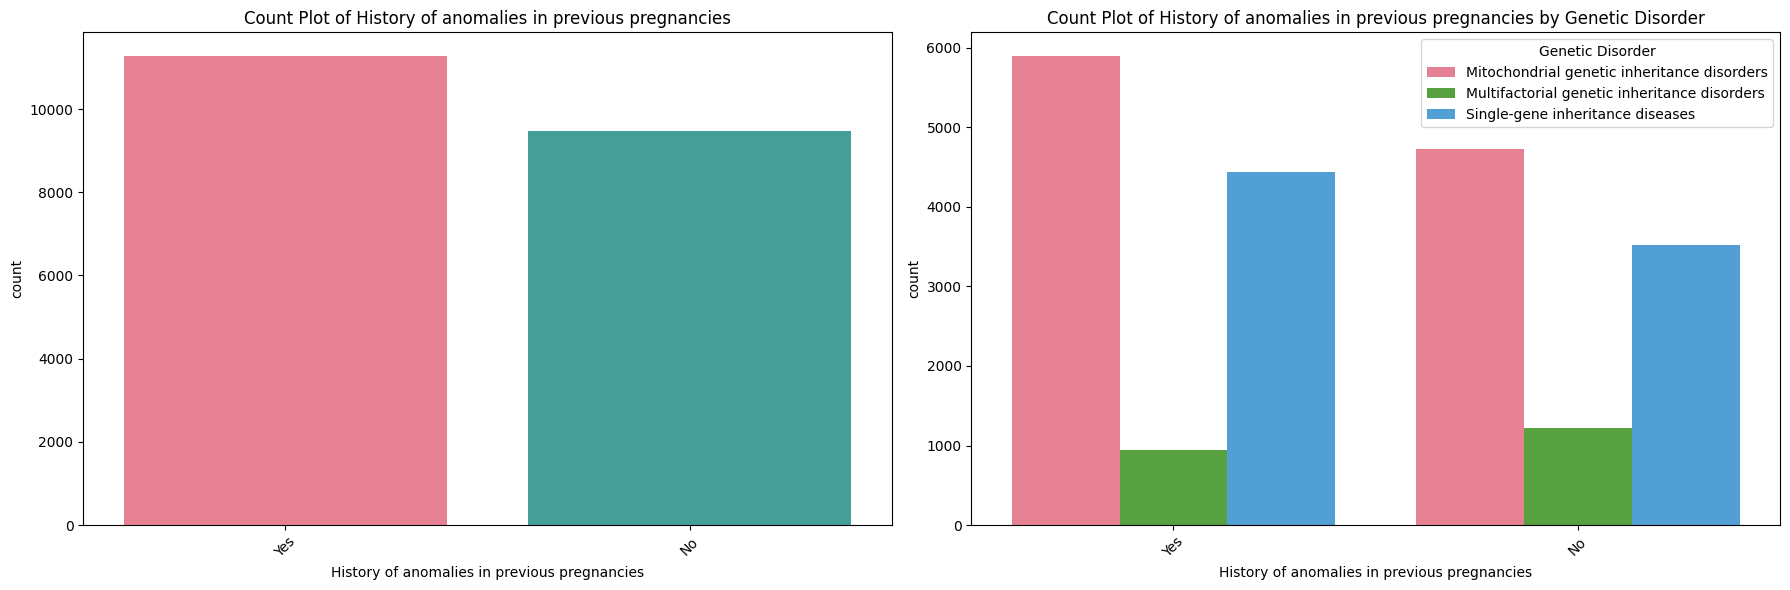

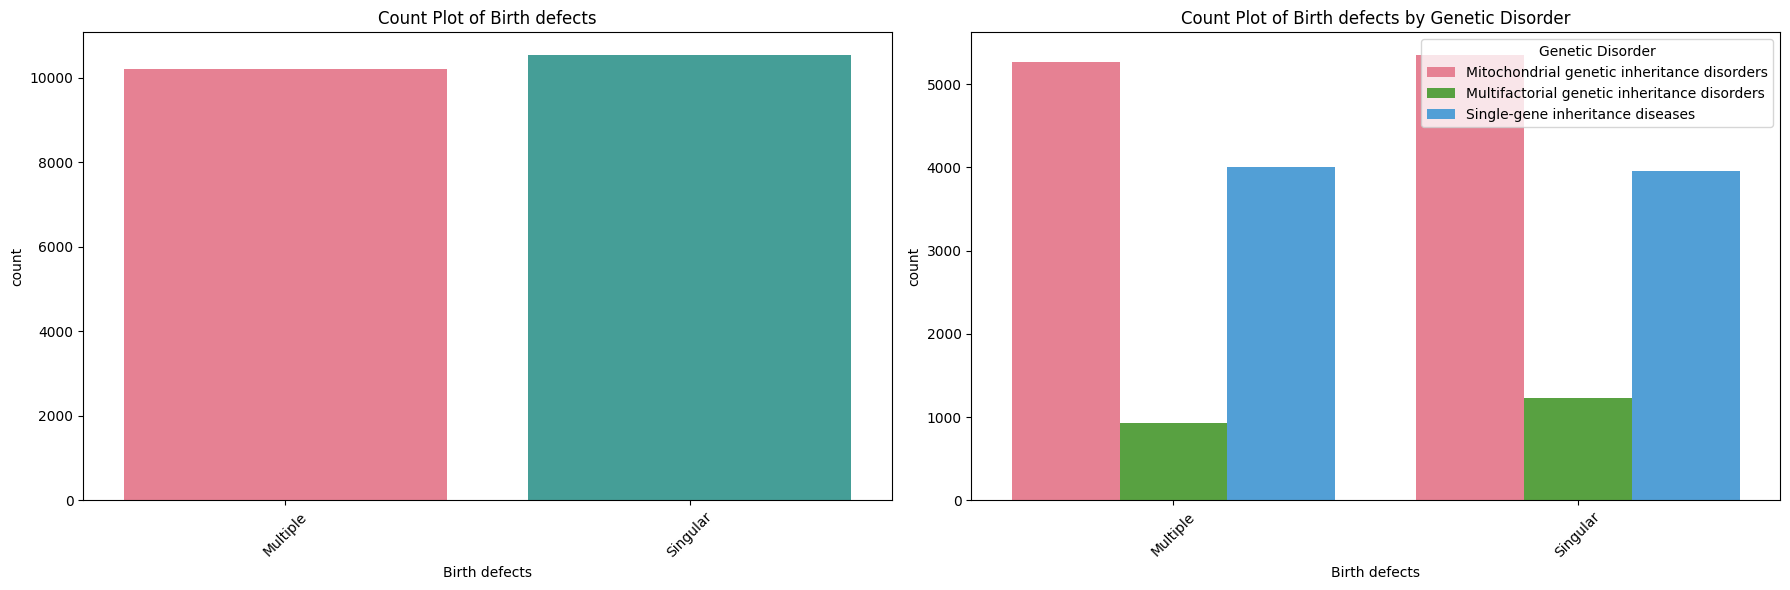

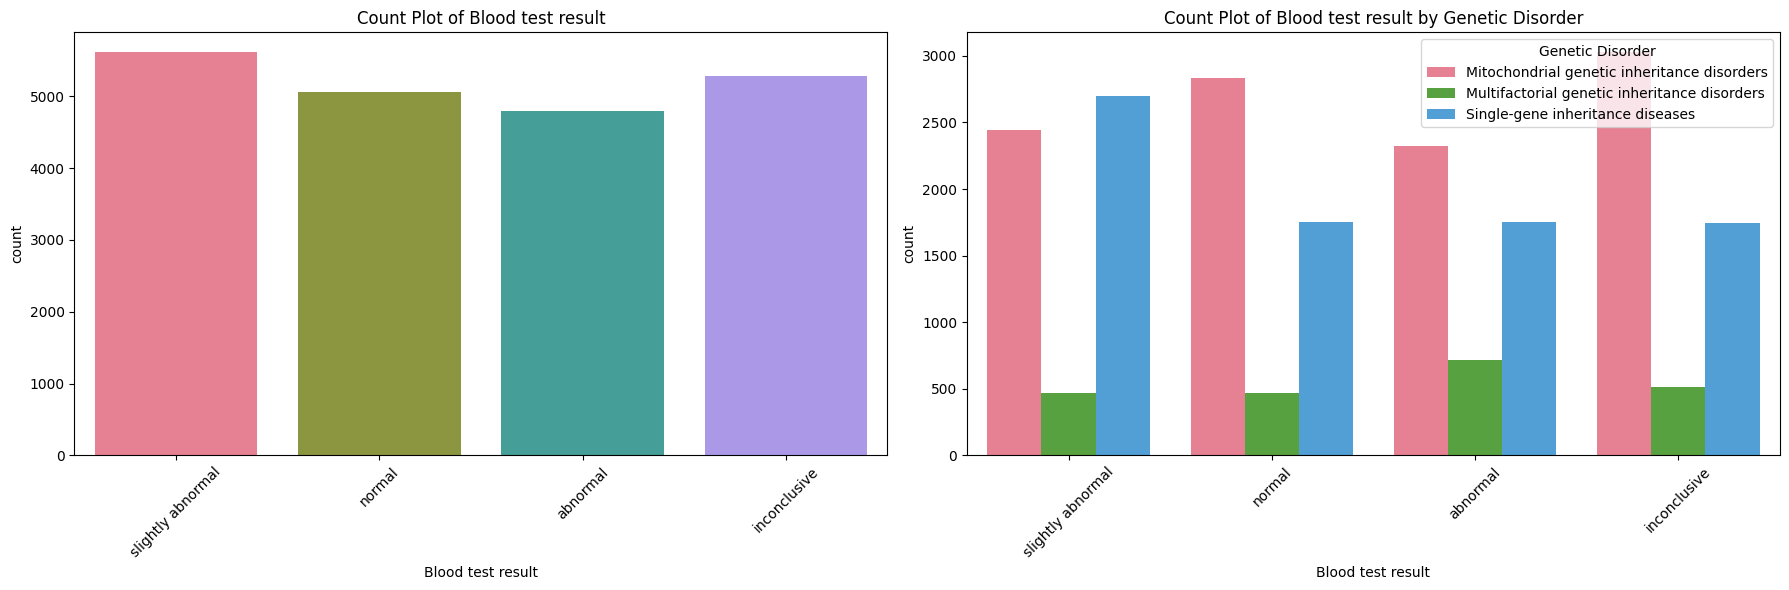

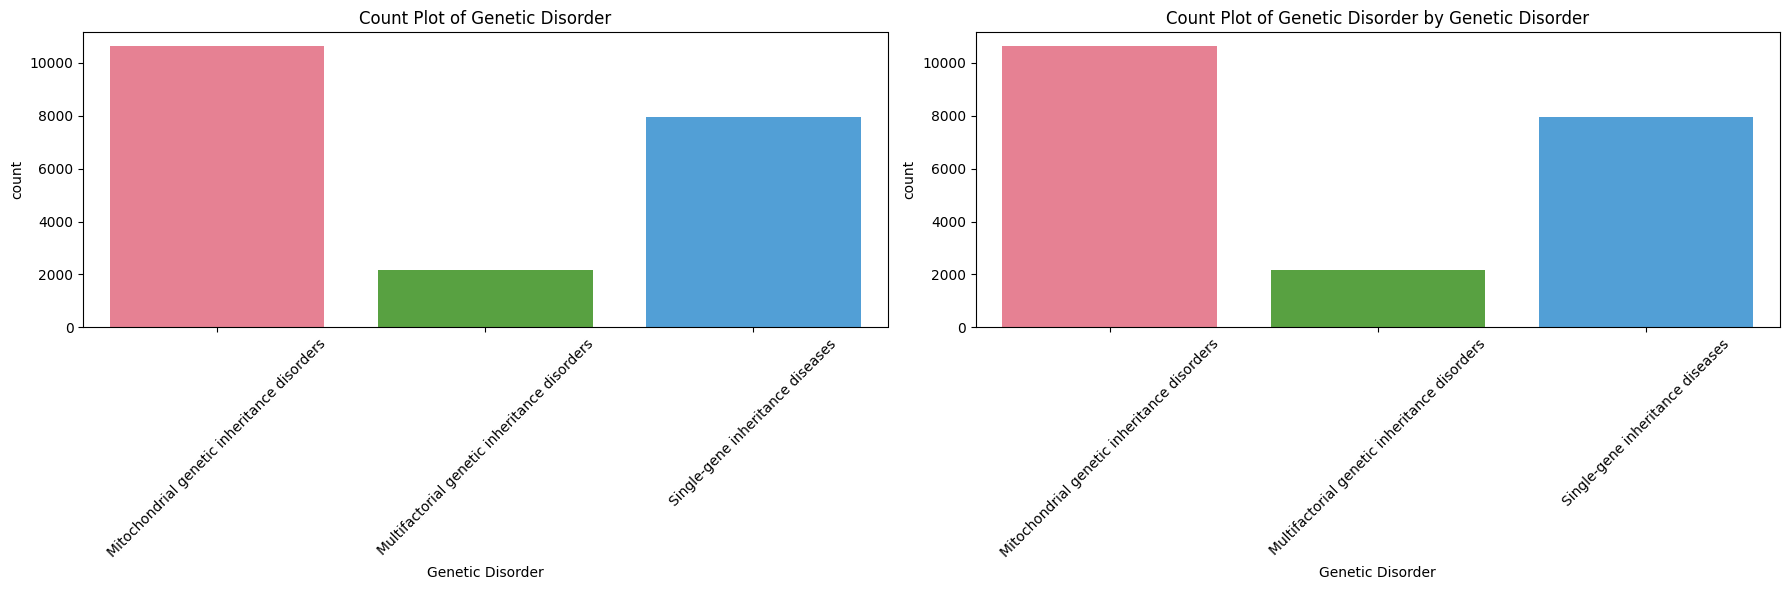

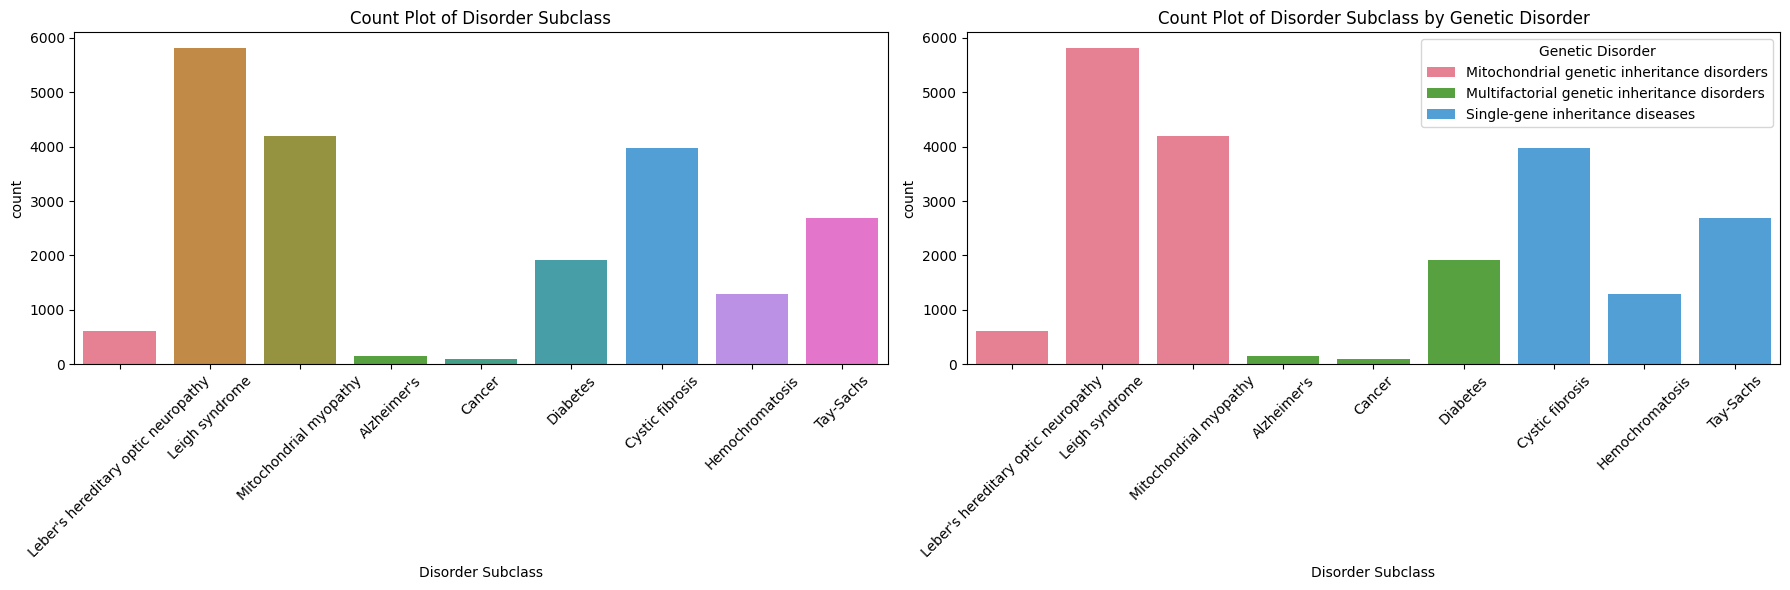

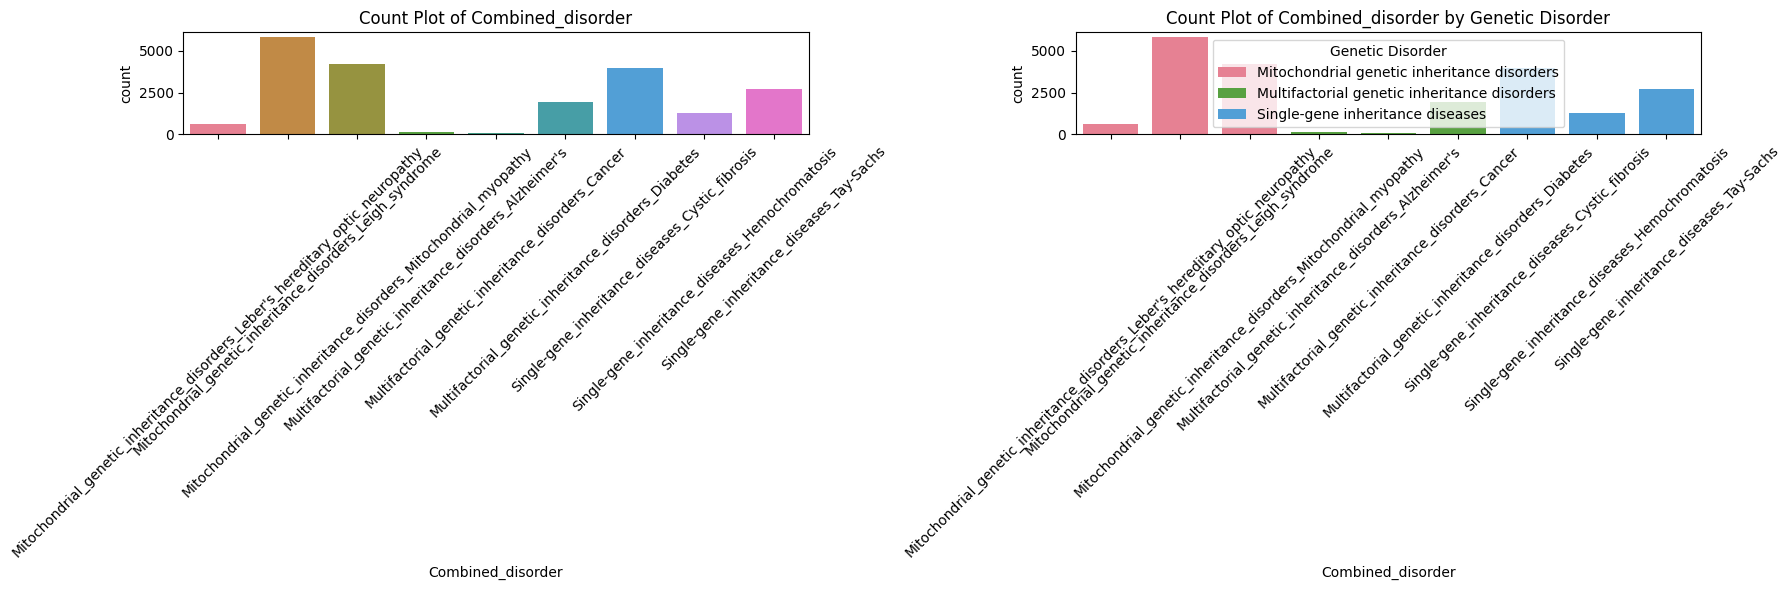

In [295]:
for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Genetic Disorder'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')

    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Genetic Disorder', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Genetic Disorder')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

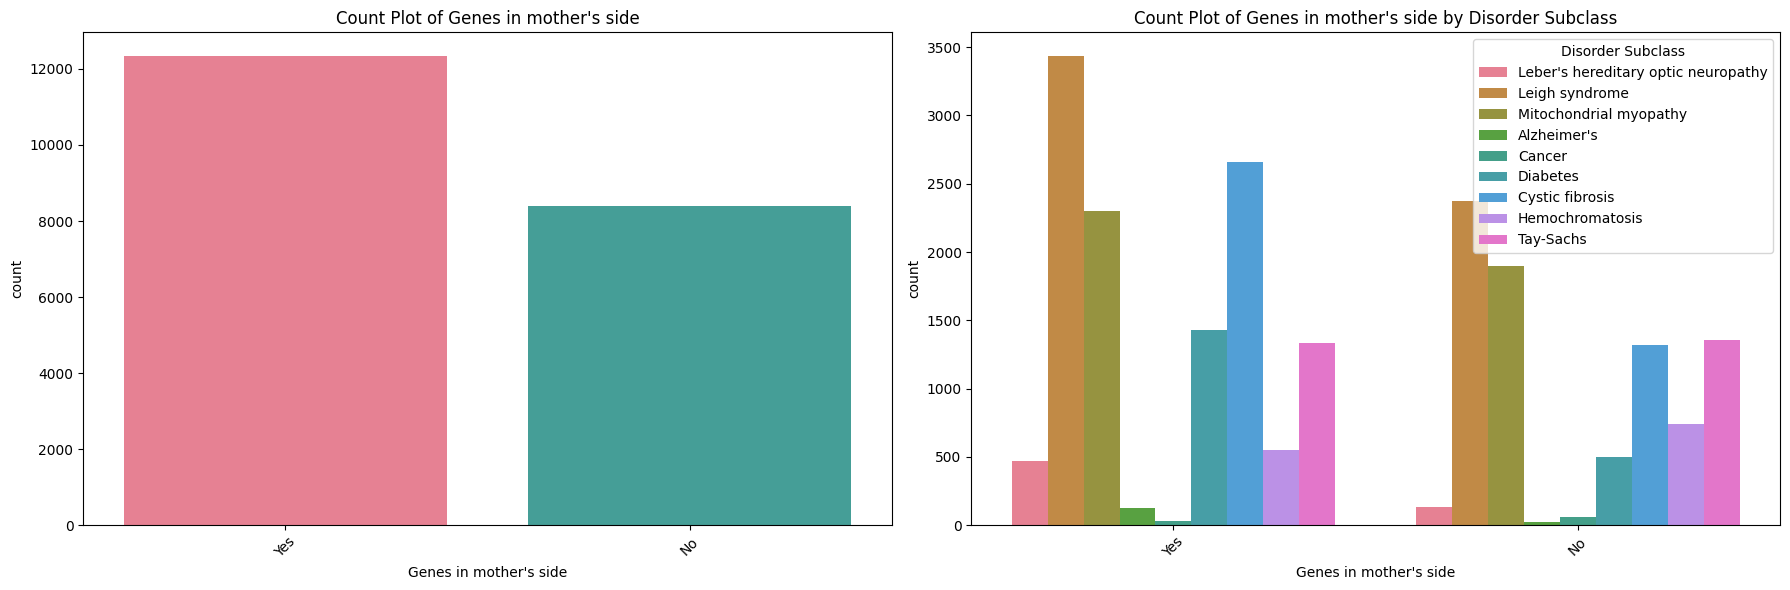

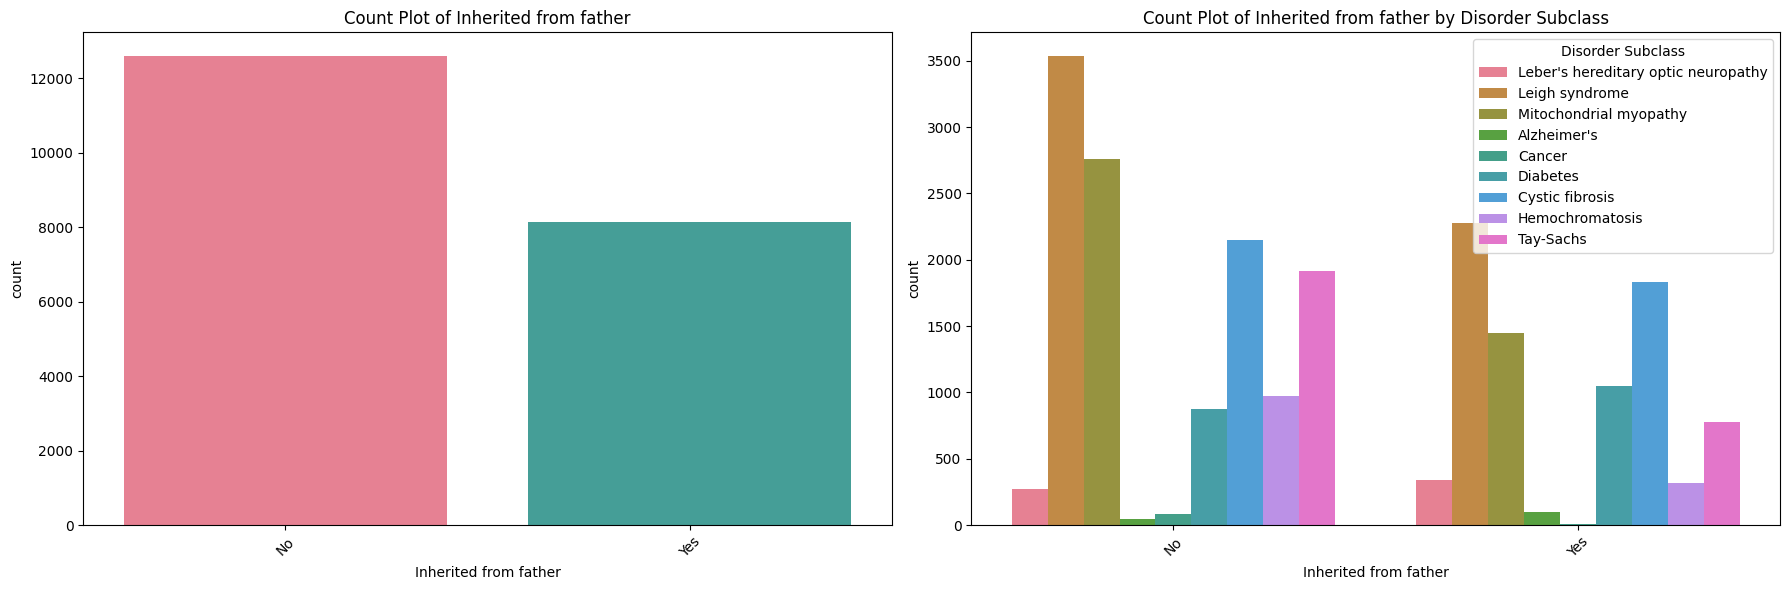

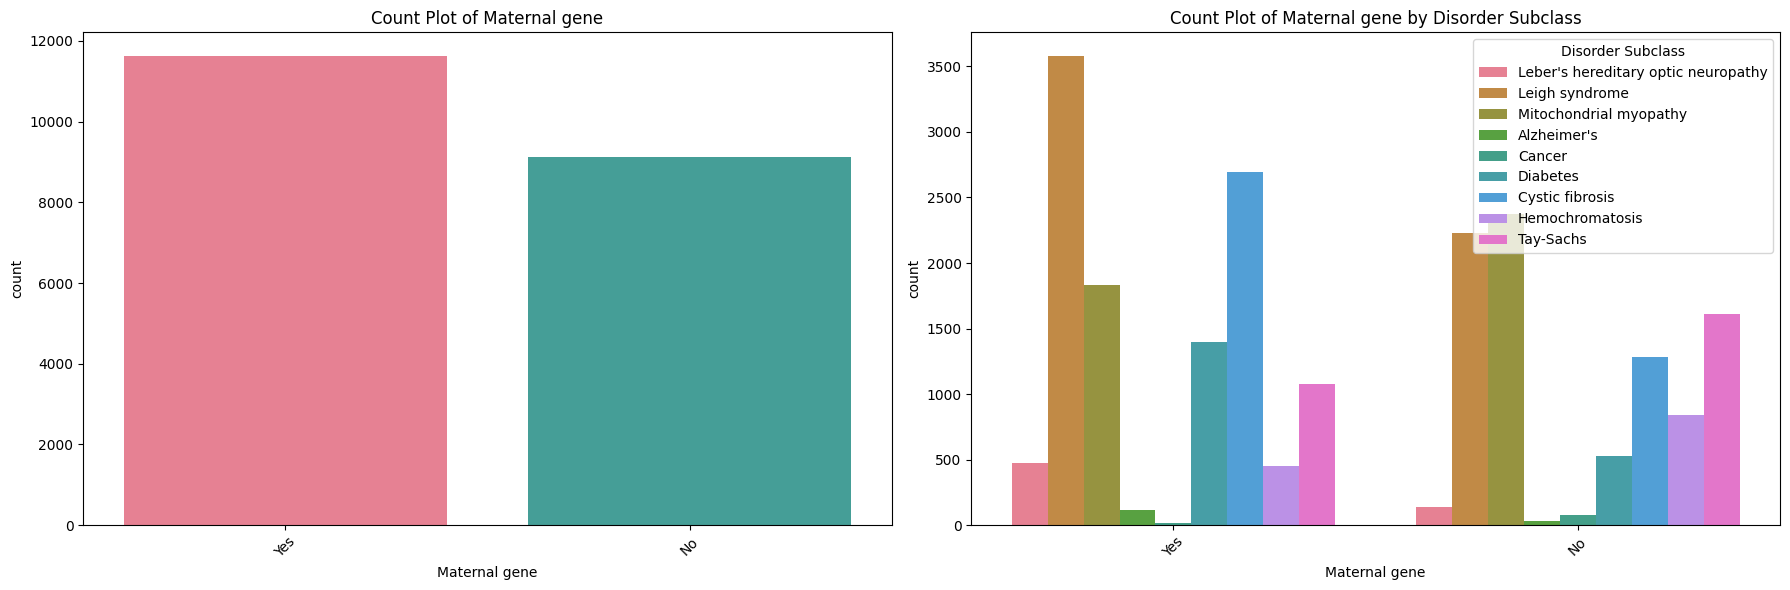

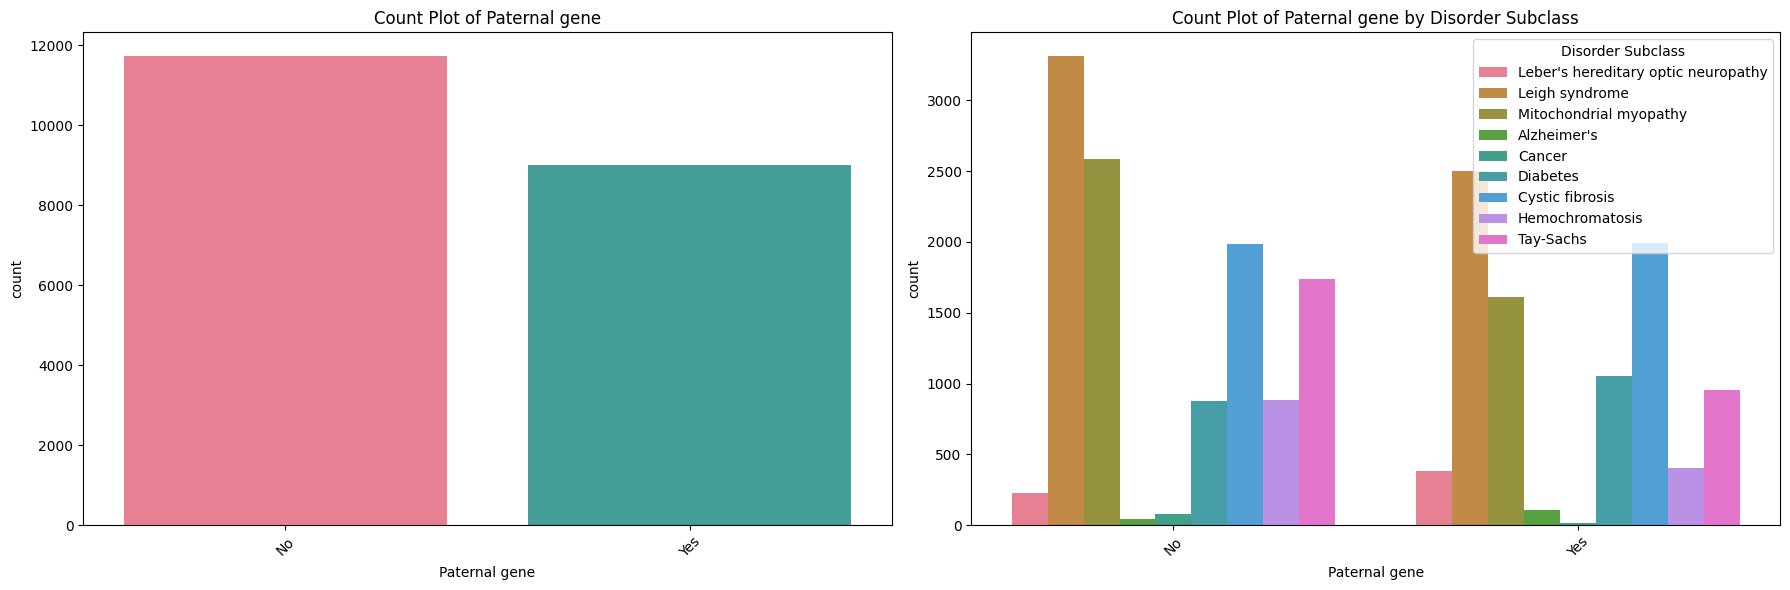

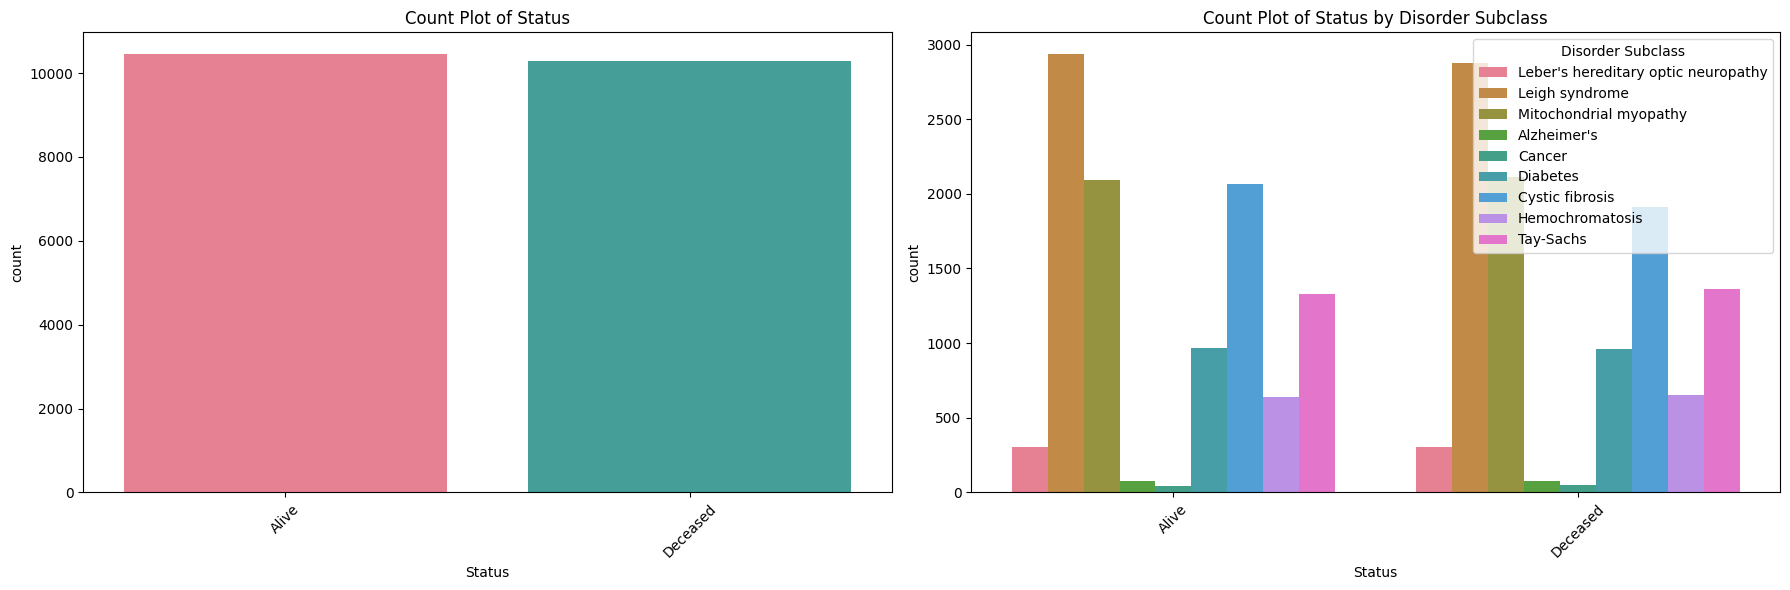

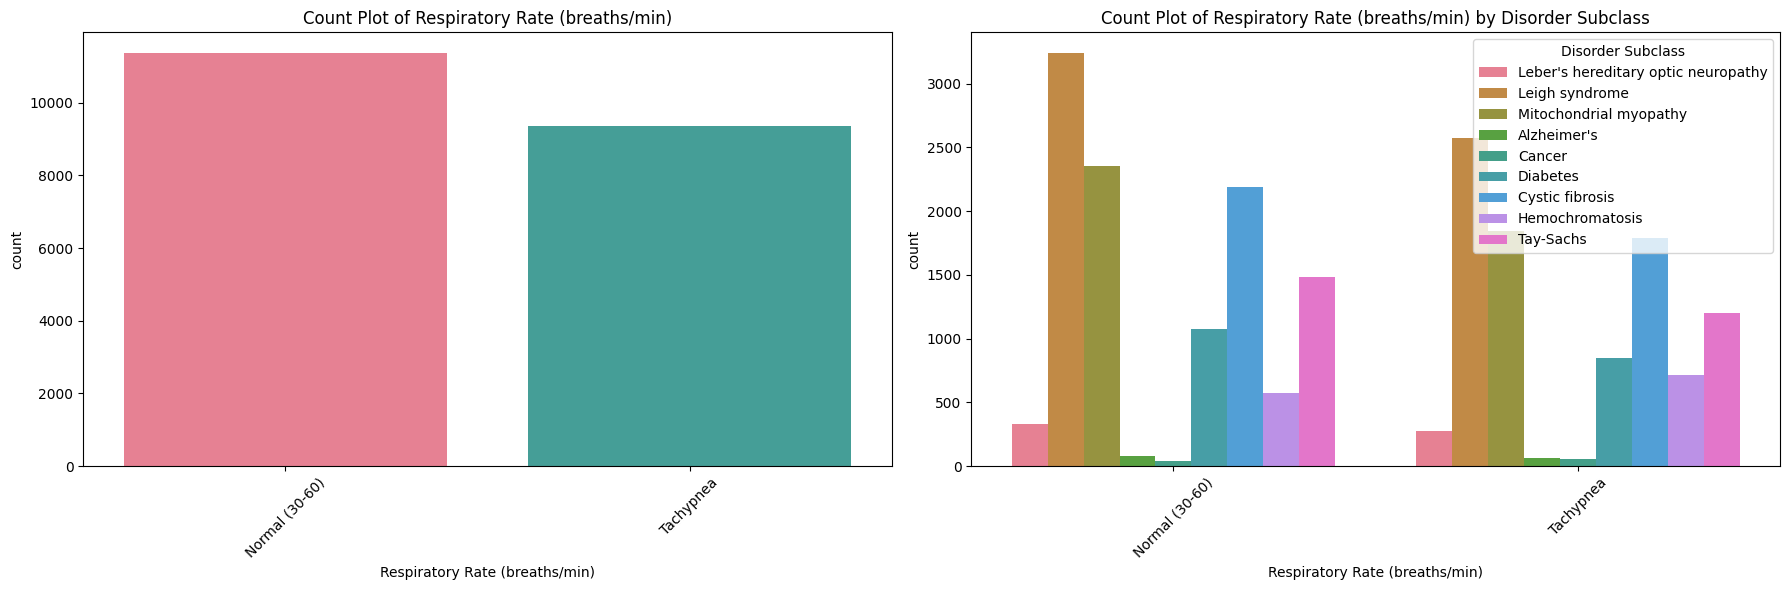

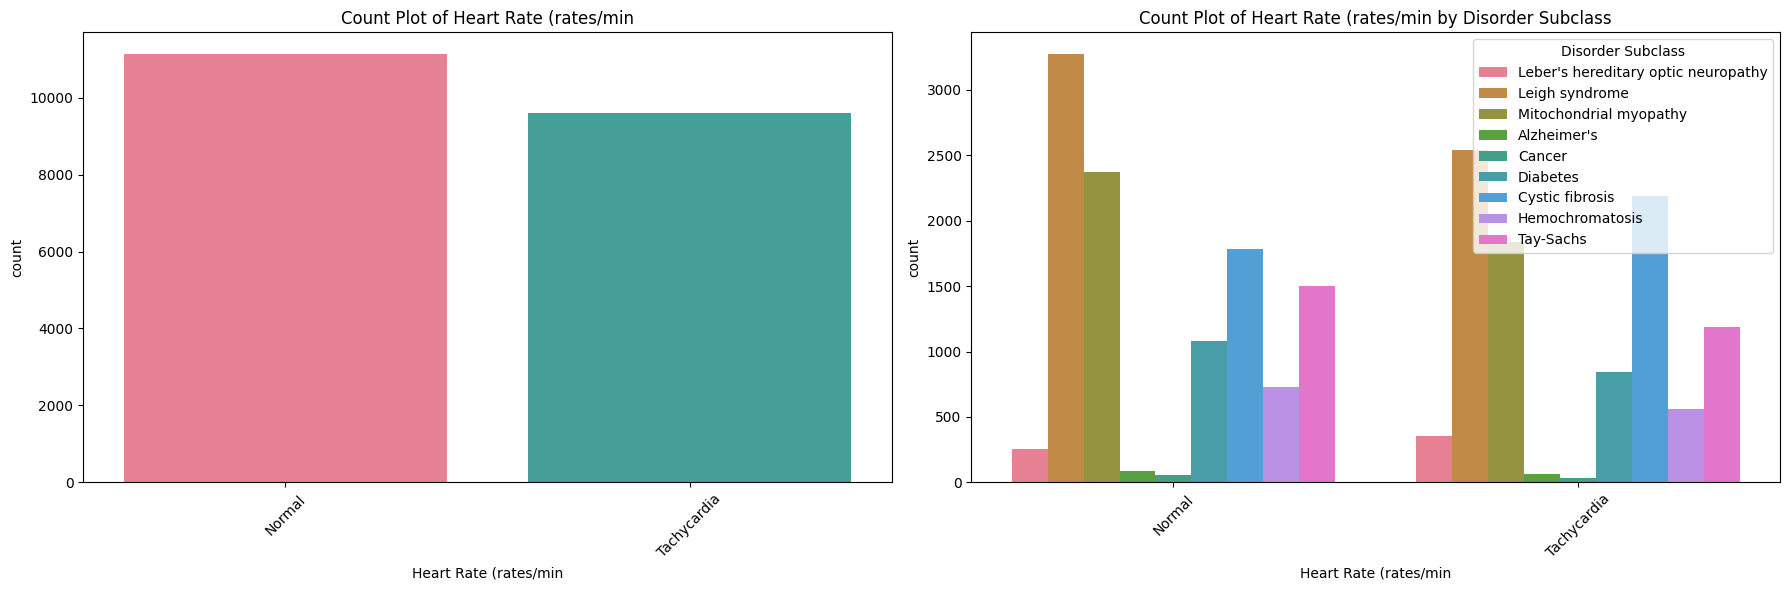

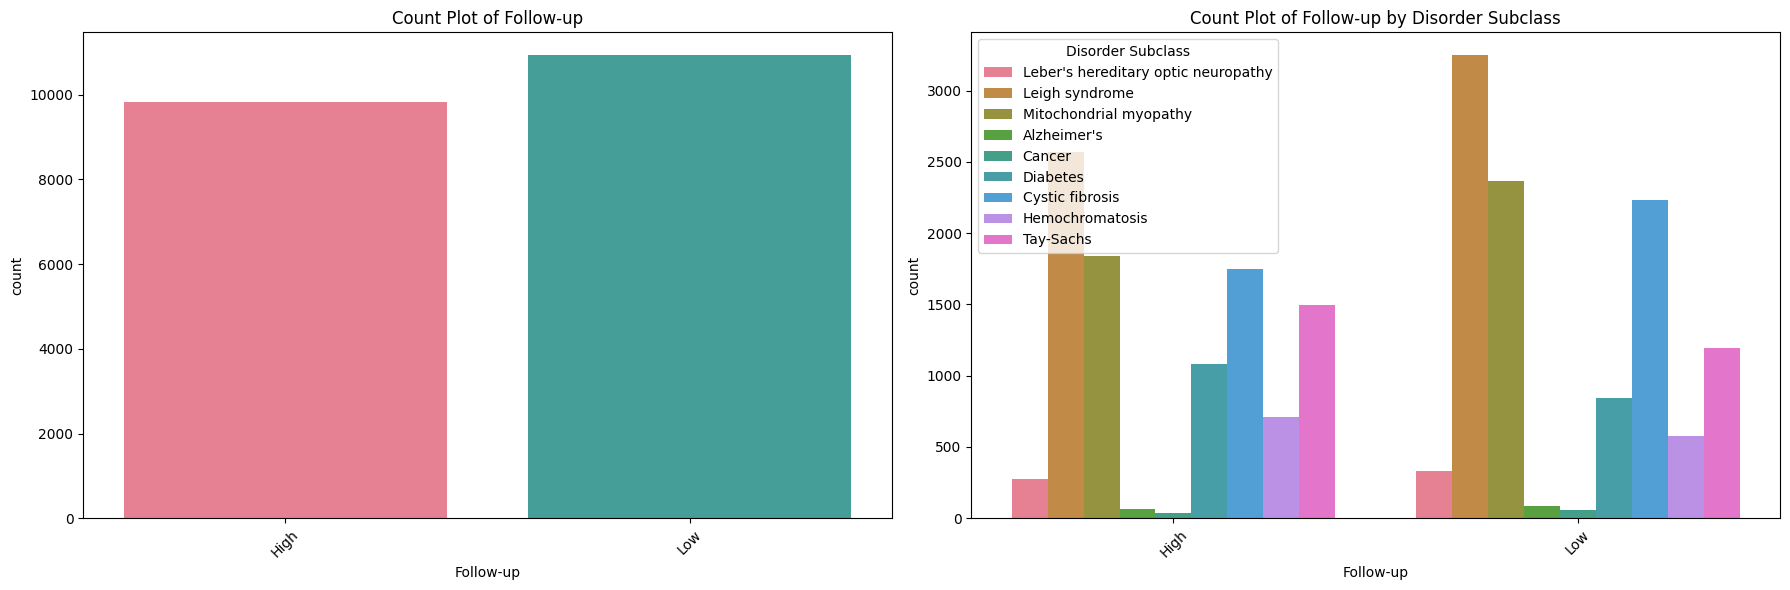

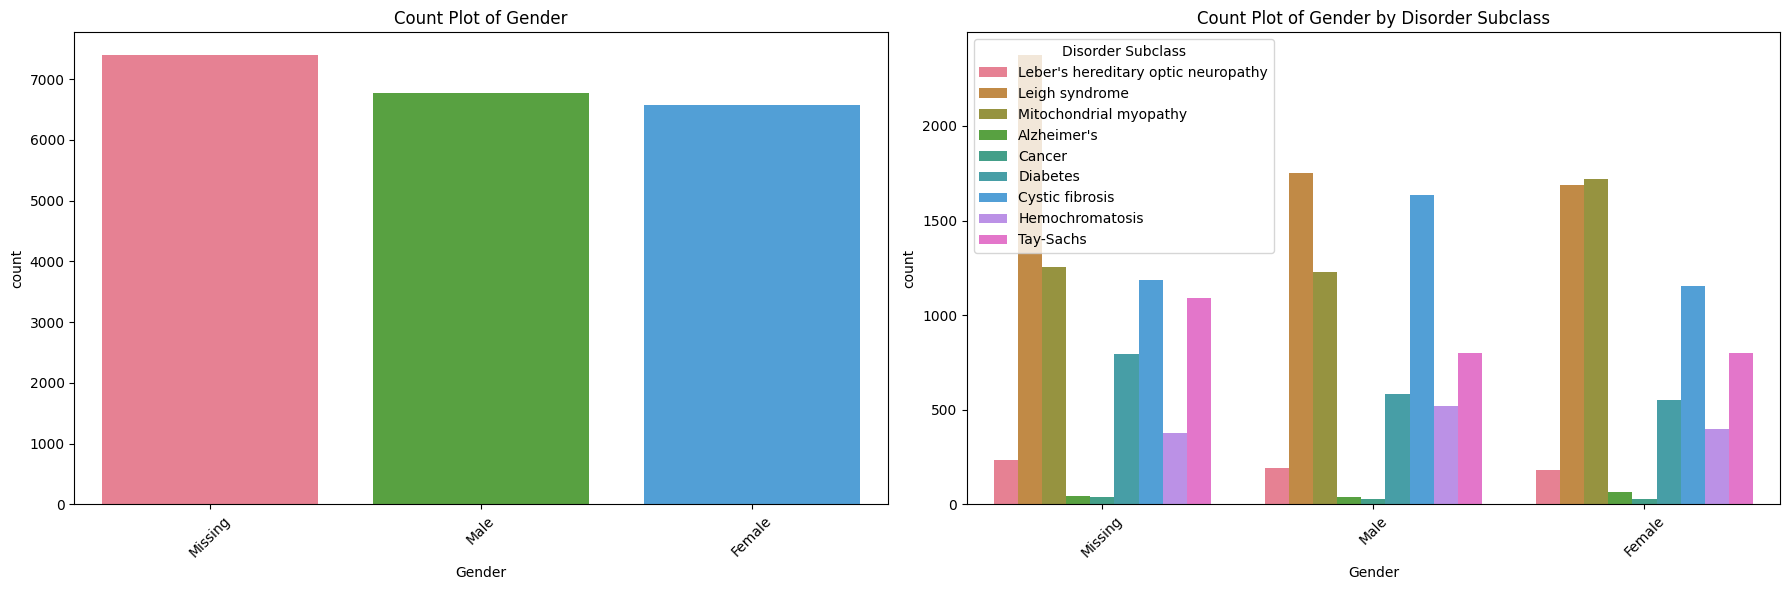

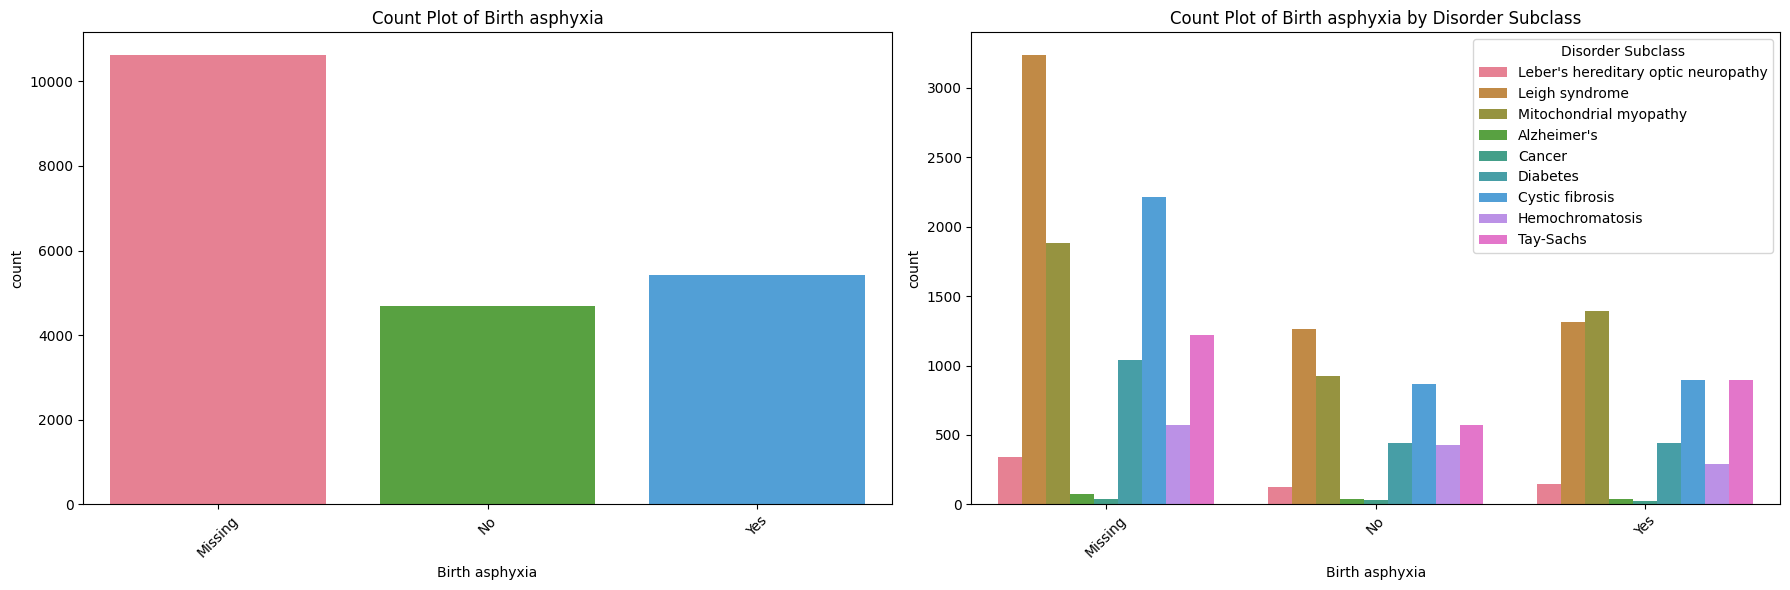

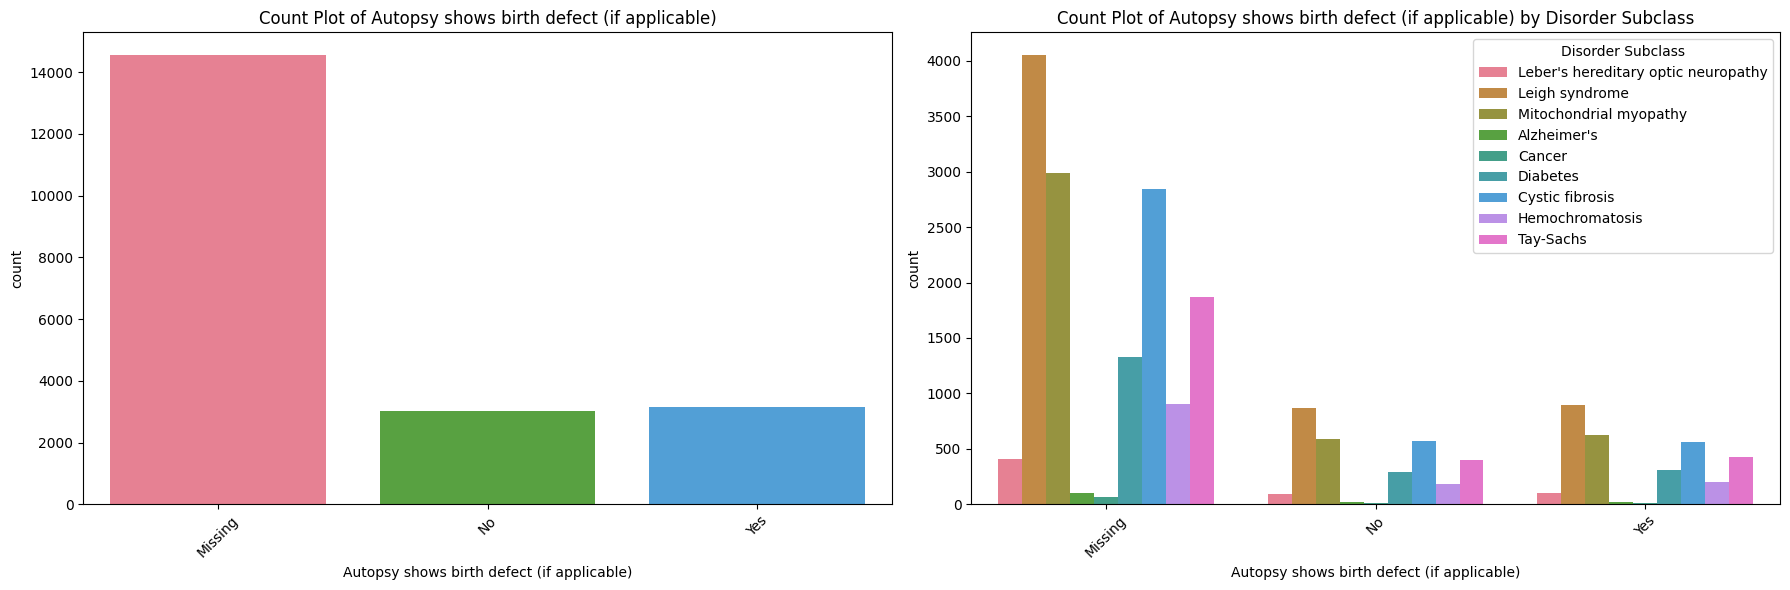

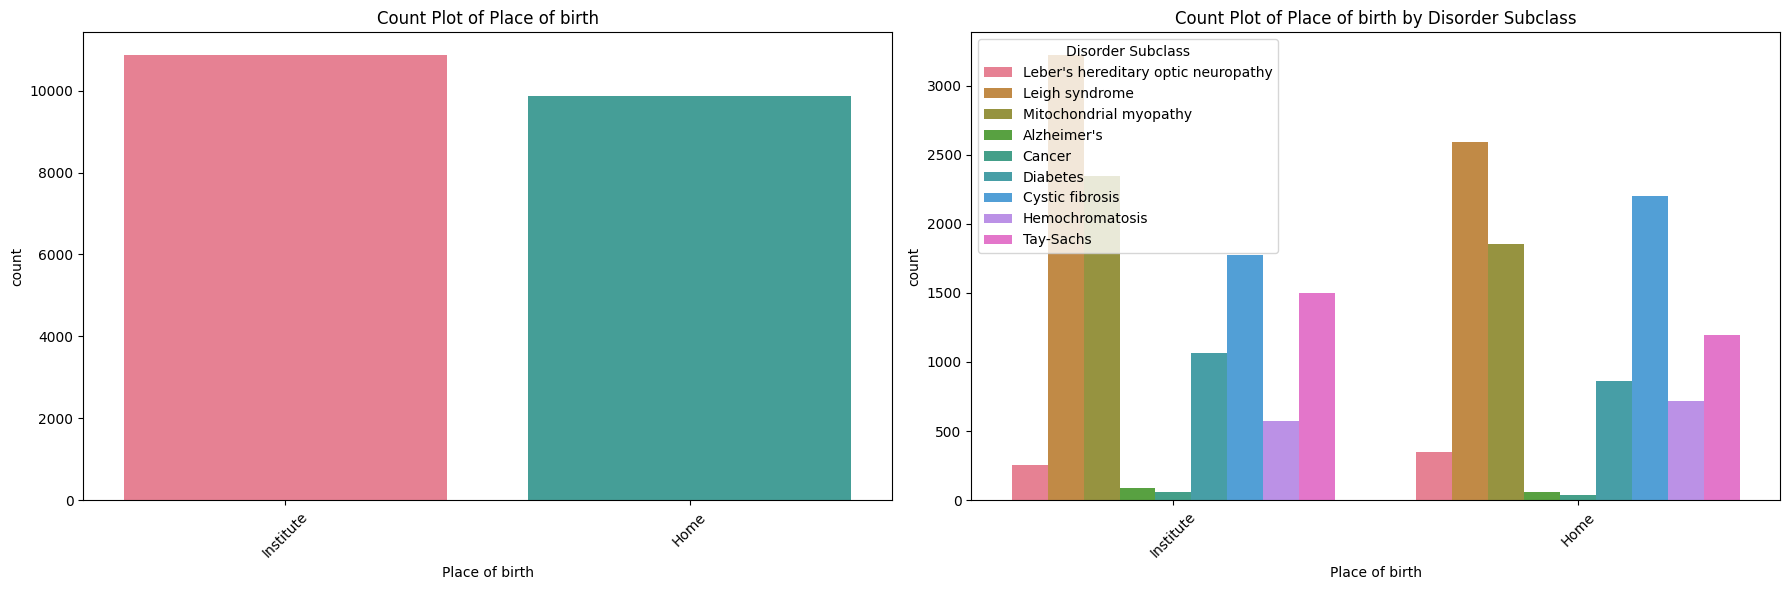

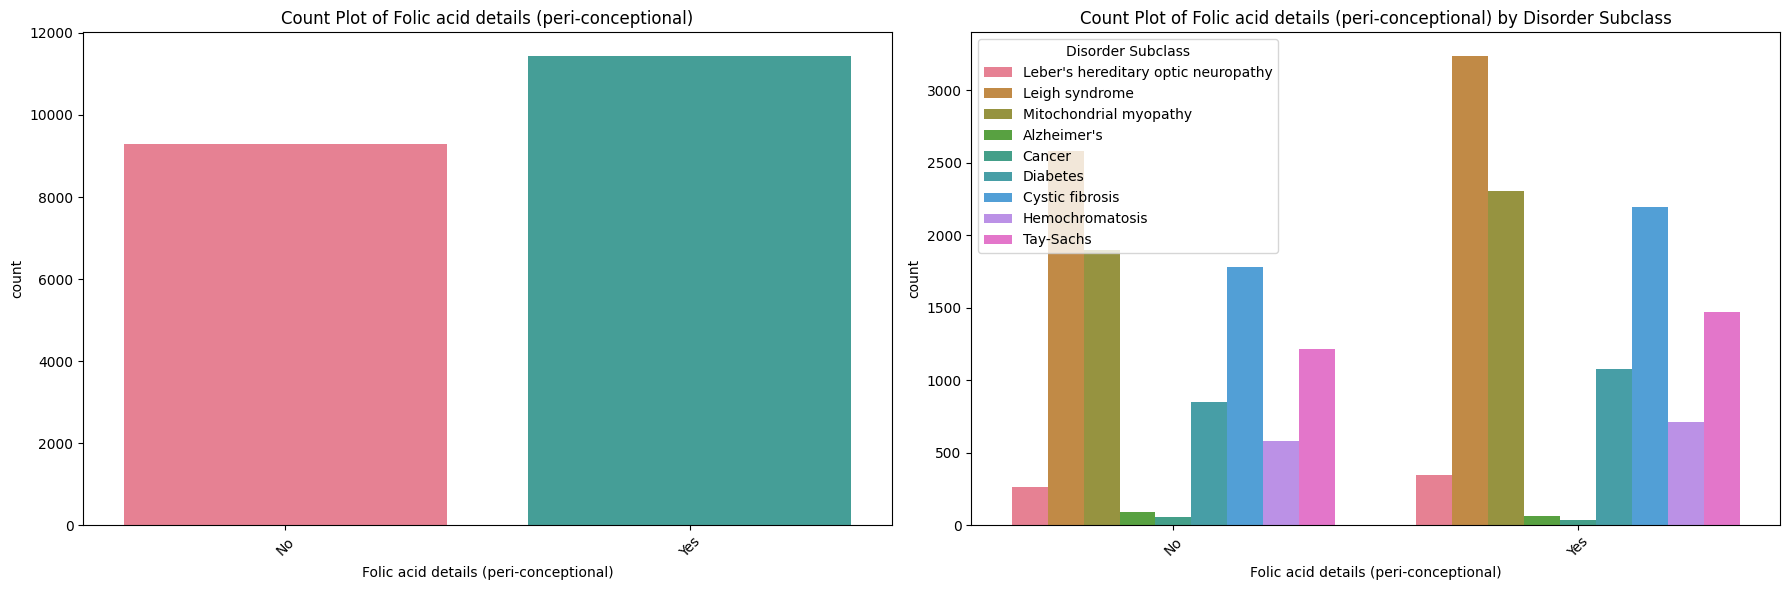

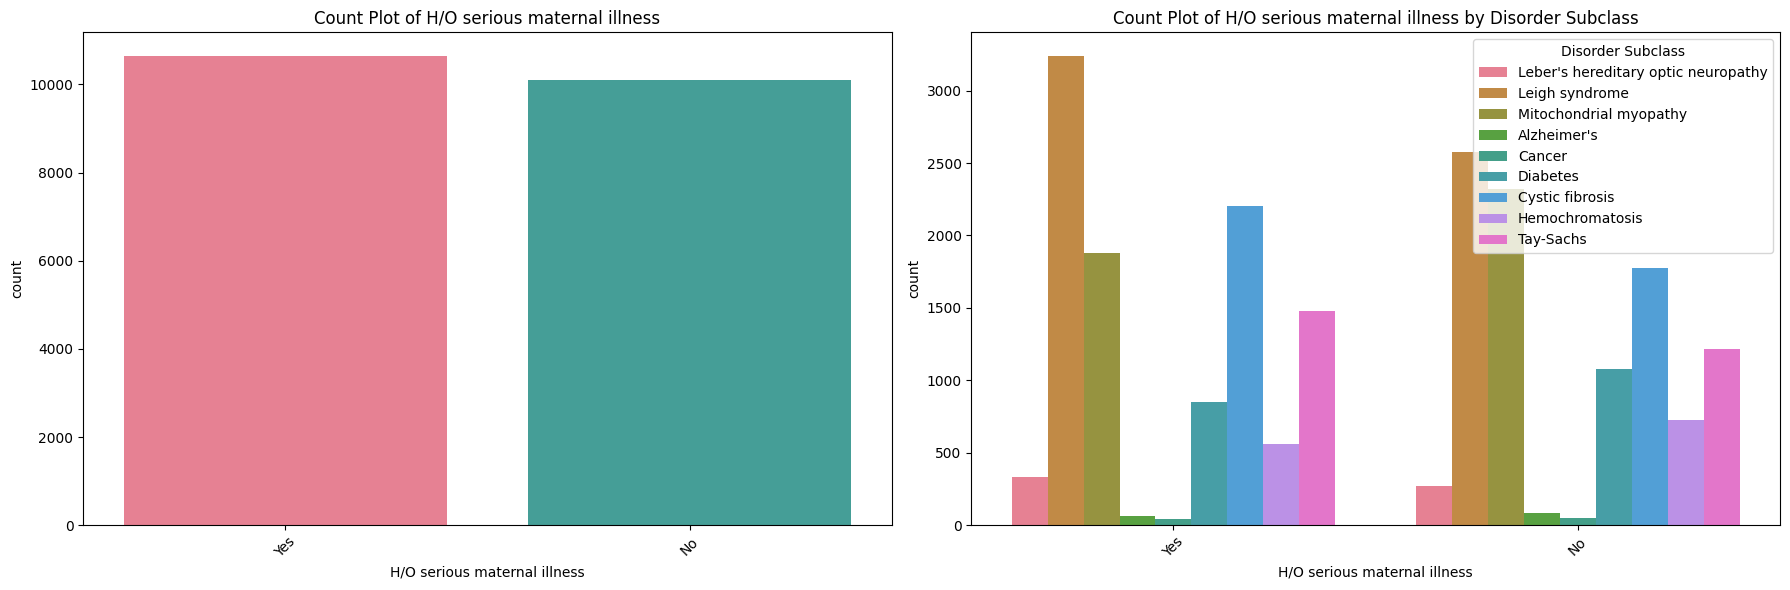

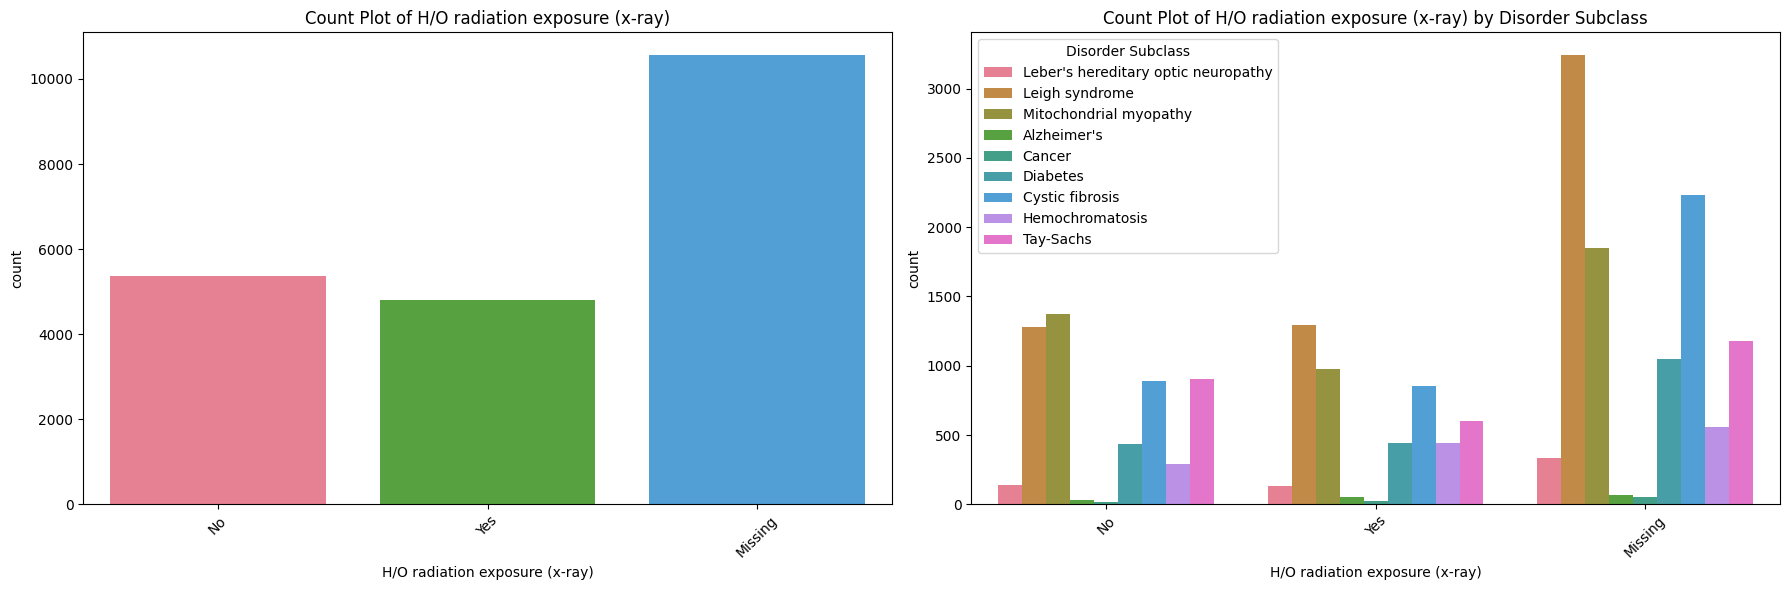

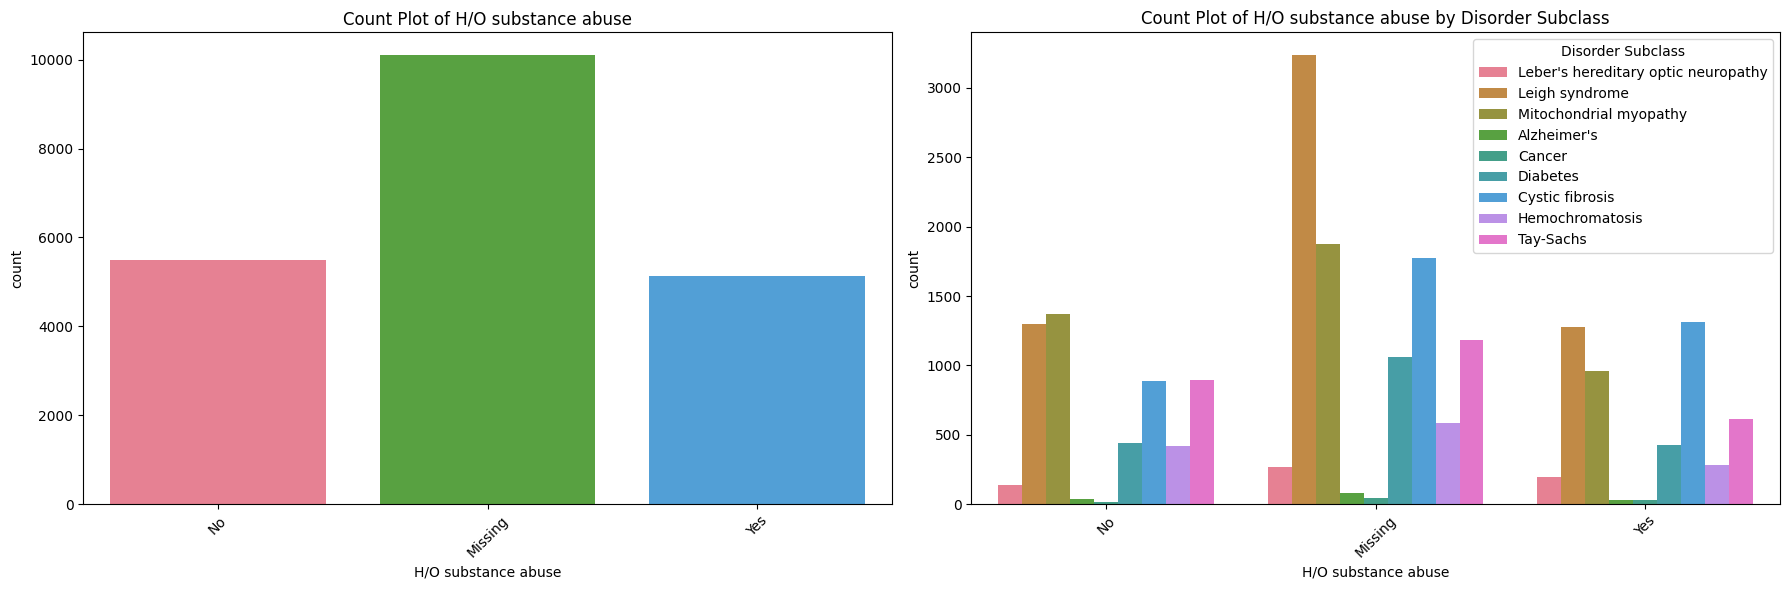

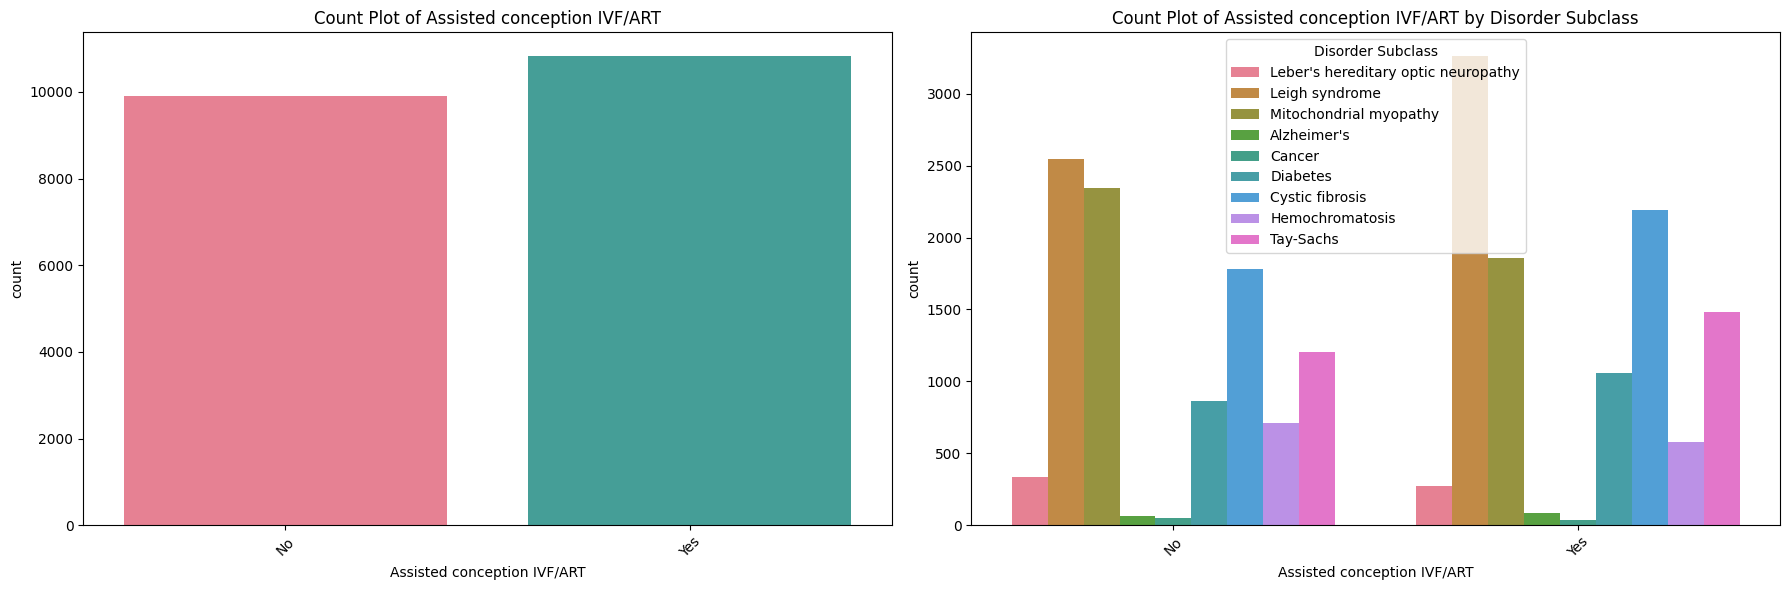

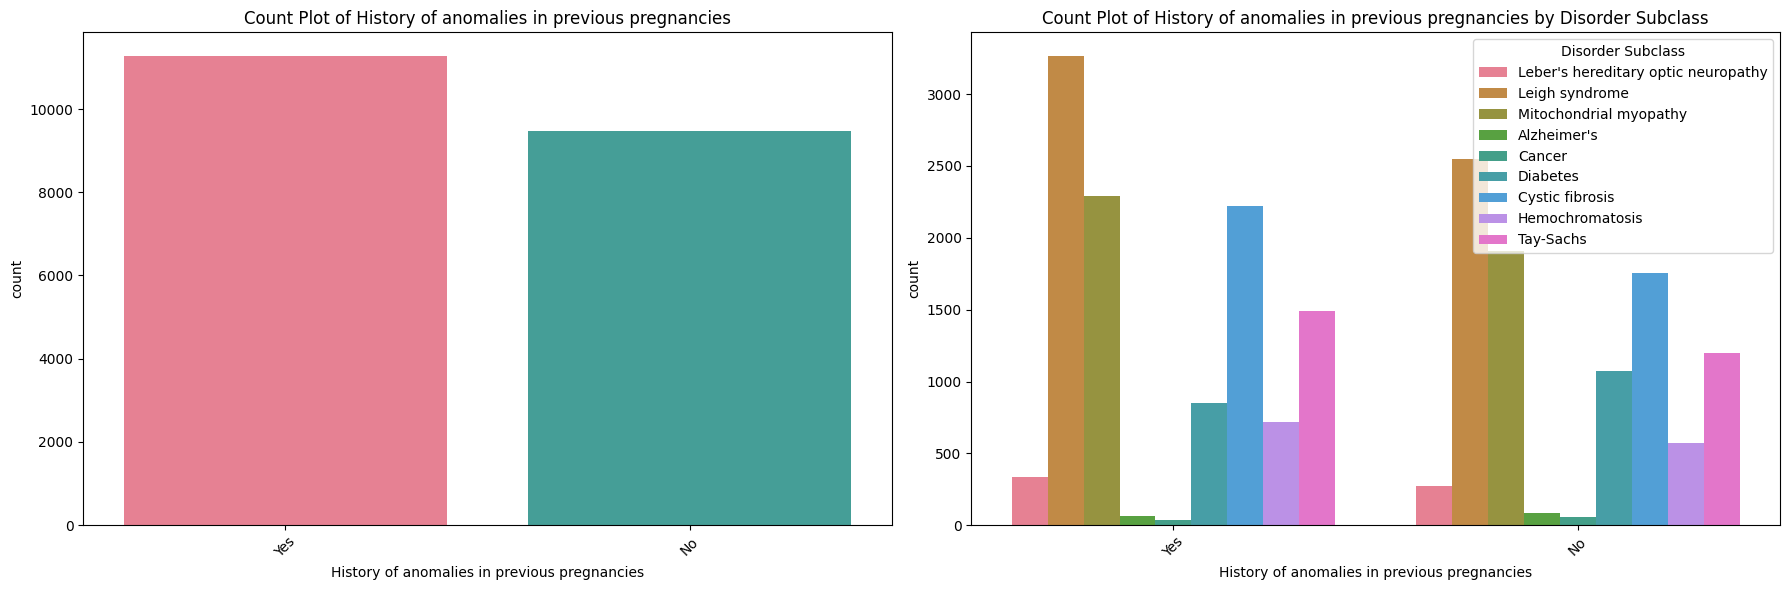

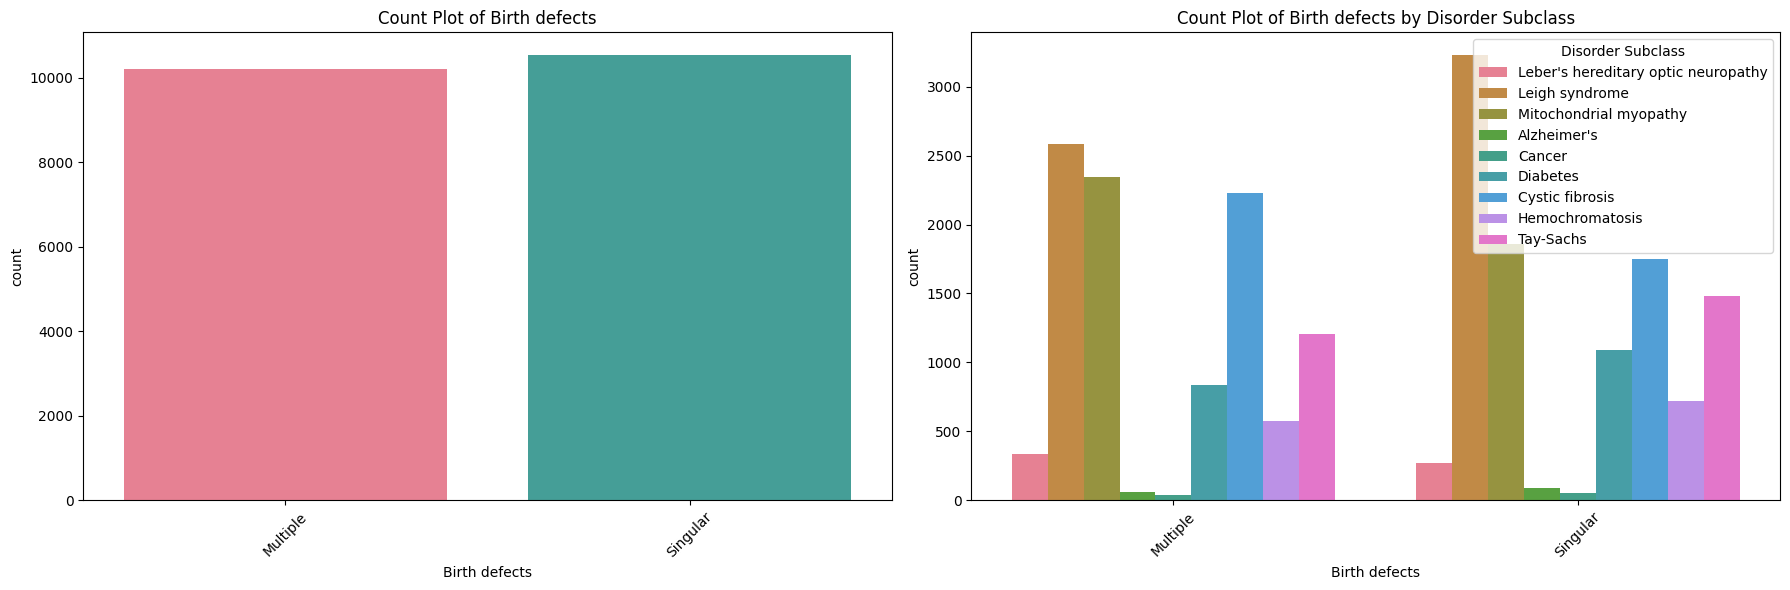

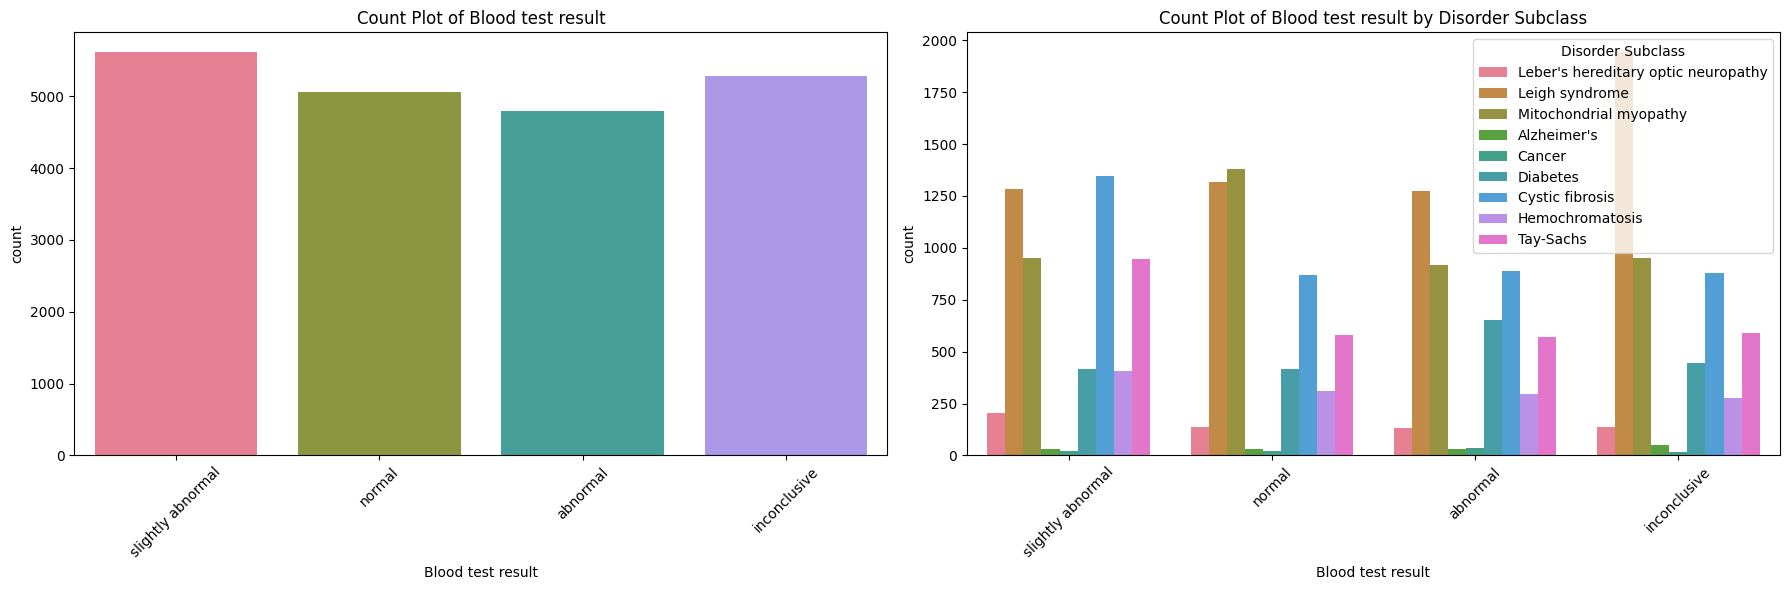

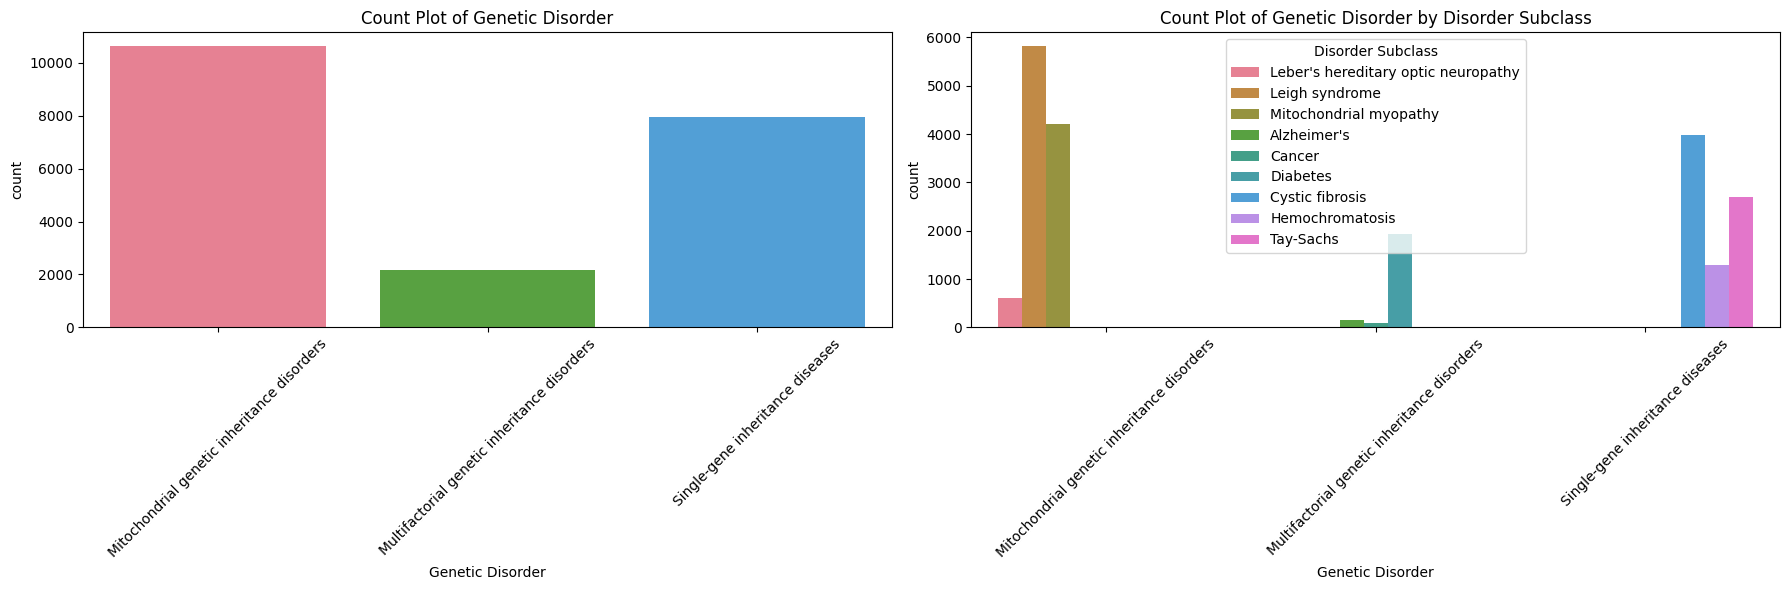

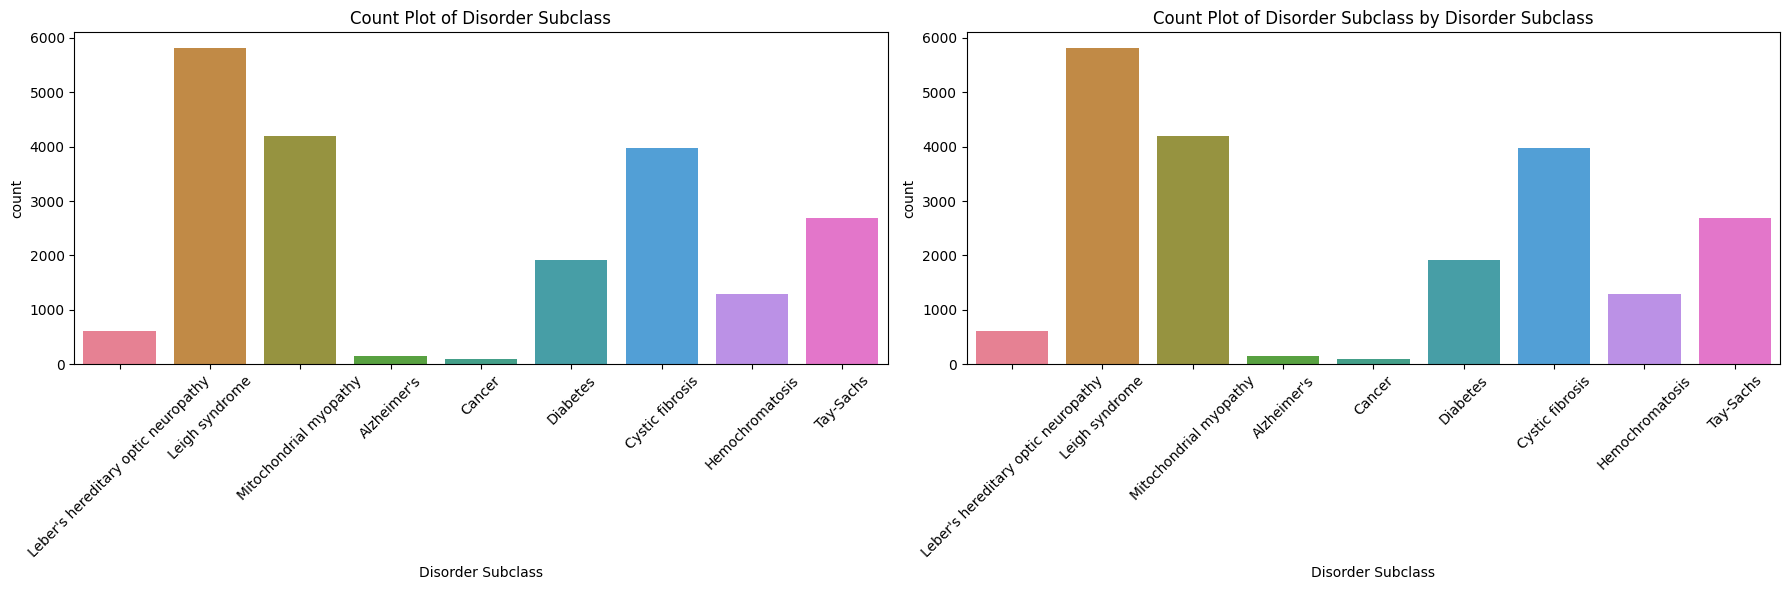

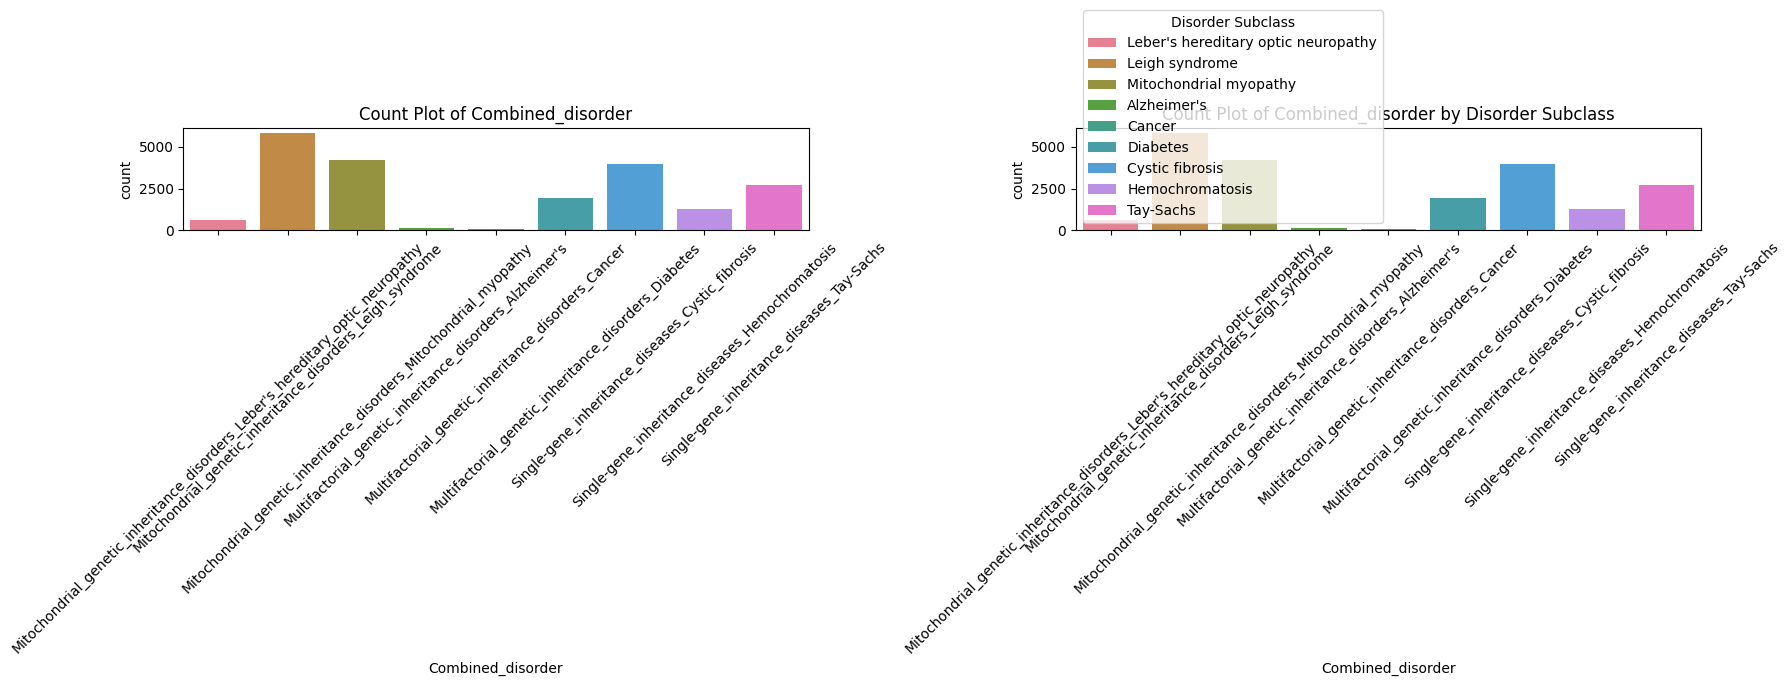

In [296]:
for feature in categorical_cols:

    # Determine the number of unique values in the hue feature
    num_unique_hue = df_train[feature].nunique()
    num_unique_target = df_train['Disorder Subclass'].nunique()

    custom_colors = sns.color_palette("husl", n_colors=num_unique_hue)  # Or any other palette with sufficient colors

    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature}')

    plt.xticks(rotation=45)
    custom_colors = sns.color_palette("husl", n_colors=num_unique_target)  # Or any other palette with sufficient colors

    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='Disorder Subclass', data=df_train, palette=custom_colors)
    plt.title(f'Count Plot of {feature} by Disorder Subclass')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

## Model Building

In [297]:
df_train.isnull().sum().head()

Patient Age               0
Genes in mother's side    0
Inherited from father     0
Maternal gene             0
Paternal gene             0
dtype: int64

In [298]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

### With 'Genetic Disorder' as a target column

In [299]:
n_vocab= df_train["Genetic Disorder"].unique()
n_vocab

array([0, 1, 2])

In [300]:
from sklearn.model_selection import train_test_split

X =df_train.drop(columns=['Genetic Disorder'])
Y = df_train[['Genetic Disorder']]

x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

In [301]:
x_train.shape

(16596, 26)

In [302]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [303]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [304]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1769
- Mean Absolute Error: 0.1395
- R2 Score: 0.9644
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1782
- Mean Absolute Error: 0.1395
- R2 Score: 0.9639


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4541
- Mean Absolute Error: 0.4148
- R2 Score: 0.7654
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4528
- Mean Absolute Error: 0.4133
- R2 Score: 0.7668


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1769
- Mean Absolute Error: 0.1395
- R2 Score: 0.9644
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1782
- Mean Absolute Error: 0.1395
- R2 Score: 0.9639


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1165
- Mean Absolute Error: 0.0386
- R2 Score: 0.9846
-----------------------

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
knn_model = KNeighborsRegressor()
knn_model = knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.62


In [307]:
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_train, 1)

In [308]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization


In [309]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(len(n_vocab), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [310]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6459 - loss: 0.7823
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9813 - loss: 0.0725
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9926 - loss: 0.0261
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9966 - loss: 0.0142
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9974 - loss: 0.0104
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9990 - loss: 0.0053
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9996 - loss: 0.0020
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9999 - loss: 0.0015
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0012


### With 'Disorder Subclass' as a target column

In [311]:
n_vocab= df_train["Disorder Subclass"].unique()
n_vocab

array([5, 6, 7, 0, 1, 3, 2, 4, 8])

In [312]:
from sklearn.model_selection import train_test_split

X =df_train.drop(columns=['Disorder Subclass'])
Y = df_train[['Disorder Subclass']]

x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

In [313]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [314]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [315]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.2207
- Mean Absolute Error: 0.9159
- R2 Score: 0.6779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2173
- Mean Absolute Error: 0.9114
- R2 Score: 0.6798


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.9229
- Mean Absolute Error: 1.6444
- R2 Score: 0.2007
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9217
- Mean Absolute Error: 1.6385
- R2 Score: 0.2019


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.2207
- Mean Absolute Error: 0.9159
- R2 Score: 0.6779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2173
- Mean Absolute Error: 0.9114
- R2 Score: 0.6798


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6741
- Mean Absolute Error: 0.3754
- R2 Score: 0.9018
-----------------------

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0149
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0298
- Mean Absolute Error: 0.0005
- R2 Score: 0.9998


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2631
- Mean Absolute Error: 0.1394
- R2 Score: 0.9850
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2629
- Mean Absolute Error: 0.1393
- R2 Score: 0.9851




In [317]:
ada_model = AdaBoostRegressor()
ada_model = ada_model.fit(x_train, y_train)
y_pred = ada_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the model is 98.50


In [318]:
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_train, 1)

In [319]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization

In [320]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(len(n_vocab), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [321]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3213 - loss: 1.8454
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7740 - loss: 0.7472
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8609 - loss: 0.3888
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9030 - loss: 0.2616
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9317 - loss: 0.1887
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9492 - loss: 0.1398
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9607 - loss: 0.1157
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9647 - loss: 0.0993
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9774 - loss: 0.0772
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9779 - loss: 0.0679


### With 'Combined Disorder' as a target column

In [322]:
n_vocab= df_train["Combined_disorder"].unique()
n_vocab

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [323]:
from sklearn.model_selection import train_test_split

X =df_train.drop(columns=['Combined_disorder'])
Y = df_train[['Combined_disorder']]

x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 7,stratify=Y)

In [324]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [325]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [326]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5512
- Mean Absolute Error: 0.4225
- R2 Score: 0.9582
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5518
- Mean Absolute Error: 0.4232
- R2 Score: 0.9581




Lasso
Model performance for Training set
- Root Mean Squared Error: 1.3045
- Mean Absolute Error: 1.0983
- R2 Score: 0.7658
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3043
- Mean Absolute Error: 1.0982
- R2 Score: 0.7659


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5512
- Mean Absolute Error: 0.4225
- R2 Score: 0.9582
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5518
- Mean Absolute Error: 0.4232
- R2 Score: 0.9581


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3485
- Mean Absolute Error: 0.1965
- R2 Score: 0.9833
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4289
- Mean Absolute Error: 0.2577
- R2 Score: 0.9747


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
---------------------------

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




In [328]:
knn_model = KNeighborsRegressor()
knn_model = knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.47


In [329]:
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_train, 1)

In [330]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization

In [331]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(len(n_vocab), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\RAJESH\Desktop\langchain projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [332]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3258 - loss: 1.8724
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8310 - loss: 0.6004
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9212 - loss: 0.2341
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9430 - loss: 0.1620
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9581 - loss: 0.1273
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9655 - loss: 0.1011
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9681 - loss: 0.0911
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9796 - loss: 0.0648
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9835 - loss: 0.0530
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9878 - loss: 0.0436


# Results
### For Genetic Disorder,

**K-Neighbors Regressor (KNN)** had the highest accuracy **(97.62%)** and the **LSTM Network** gave an accuracy of **99%**
 
### For Disorder Subclass, 

**AdaBoost Regressor** Regred the highest accuracy **(98.84%)** and the **LSTM Network** gave an accuracy of **98.28%**

### For Combined Disorder, 

**K-Neighbors Regressor (KNN)** Regred the highest accuracy **(97.47%)** and the **LSTM Network** gave an accuracy of **98.64%**